In [1]:
%cd ../

/home/zulqarnain/develop/htfatorch


In [2]:
import logging
import numpy as np
import htfa_torch.dtfa as DTFA
import htfa_torch.niidb as niidb
import htfa_torch.utils as utils
import htfa_torch.htfa as HTFA

/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/utils/deprecation.py

In [3]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [4]:
from scipy.spatial import distance
from scipy import stats
import nilearn.plotting as niplot
import statsmodels.stats.multitest as smt
from ordered_set import OrderedSet
from sklearn.svm import SVC
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import LeaveOneGroupOut, cross_val_score,StratifiedKFold
from sklearn.feature_selection import SelectPercentile, f_classif,SelectKBest
from sklearn.pipeline import Pipeline
from sklearn.metrics import plot_roc_curve

In [5]:
import matplotlib
import matplotlib.pyplot as pl
from matplotlib import cycler
from seaborn.apionly import color_palette
column_width = 3.3
page_width = 6.7
# colorblind-friendly colors 
# source: https://personal.sron.nl/~pault/
colors = {
    'bright': ['4477AA', 
               '66CCEE', 
               '228833', 
               'CCBB44', 
               'EE6677', 
               'AA3377', 
               'BBBBBB'],
    'high_contrast': ['FFFFFF', 
                      'DDAA33', 
                      'BB5566', 
                      '004488', 
                      '00000'],
    'vibrant': ['0077BB', 
                '33BBEE', 
                '0099BB',
                'EE7733',
                'CC3311',
                'EE3377',
                'BBBBBB'],
    'muted': ['332288',
              '88CCEE',
              '44AA99',
              '117733',
              '999933',
              'DDCC77',
              'CC6677',
              '882255',
              'AA4499']
}
pl.rc('legend', frameon=False)
pl.rc('figure', figsize=(column_width, 
                         0.66 * column_width),
                dpi=120)
pl.rc('savefig', dpi=300)
pl.rc('font', size=8)


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The examples.directory rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2. In the future, examples will be found relative to the 'datapath' directory.
  self[key] = other[key]
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
  self[key] = other[key]
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]
/home/zulqarnain

In [6]:
%matplotlib inline

In [7]:
logging.basicConfig(format='%(asctime)s %(message)s', datefmt='%m/%d/%Y %H:%M:%S',
                    level=logging.INFO)

In [8]:
lepping_db = niidb.FMriActivationsDb('data/sound_depression.db', mask='/home/zulqarnain/fmri_data/Sound_Depression_Final/mask/sound_depression_mask_MNI152.nii.gz')

In [9]:
dtfa = DTFA.DeepTFA([b for b in lepping_db.all() if 'response' not in b.task and 'tones' not in b.task],
                    mask='/home/zulqarnain/fmri_data/Sound_Depression_Final/mask/sound_depression_mask_MNI152.nii.gz',num_factors=100, embedding_dim=2)

05/30/2020 21:20:58 Loading Nifti image /home/zulqarnain/fmri_data/Sound_Depression_Final/nifti_files/sub-control01_run3_music_mc_MNI_masked.nii.gz with mask /home/zulqarnain/fmri_data/Sound_Depression_Final/mask/sound_depression_mask_MNI152.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
05/30/2020 21:20:59 Loading Nifti image /home/zulqarnain/fmri_data/Sound_Depression_Final/nifti_files/sub-control01_run2_music_mc_MNI_masked.nii.gz with mask /home/zulqarnain/fmri_data/Sound_Depression_Final/mask/sound_depression_mask_MNI152.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
05/30/2020 21:21:00 Loading Nifti image /home/zulqarnain/fmri_data/Sound_Depression_Final/nifti_files/sub-control01_run4_nonmusic_mc_MNI_masked.nii.gz with mask /home/zulqarnain/fmri_data/Sound_Depression_Final/mask/sound_depression_mask_MNI152.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
05/30/2020 21:21:01 Loading Nifti image /home/zulqarnain/fmri_data/Sound_Depression_Final/nifti_files/sub-control01

05/30/2020 21:21:33 Loading Nifti image /home/zulqarnain/fmri_data/Sound_Depression_Final/nifti_files/sub-control08_run3_music_mc_MNI_masked.nii.gz with mask /home/zulqarnain/fmri_data/Sound_Depression_Final/mask/sound_depression_mask_MNI152.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
05/30/2020 21:21:35 Loading Nifti image /home/zulqarnain/fmri_data/Sound_Depression_Final/nifti_files/sub-control08_run2_music_mc_MNI_masked.nii.gz with mask /home/zulqarnain/fmri_data/Sound_Depression_Final/mask/sound_depression_mask_MNI152.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
05/30/2020 21:21:36 Loading Nifti image /home/zulqarnain/fmri_data/Sound_Depression_Final/nifti_files/sub-control08_run4_nonmusic_mc_MNI_masked.nii.gz with mask /home/zulqarnain/fmri_data/Sound_Depression_Final/mask/sound_depression_mask_MNI152.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
05/30/2020 21:21:37 Loading Nifti image /home/zulqarnain/fmri_data/Sound_Depression_Final/nifti_files/sub-control08

05/30/2020 21:22:09 Loading Nifti image /home/zulqarnain/fmri_data/Sound_Depression_Final/nifti_files/sub-control15_run3_music_mc_MNI_masked.nii.gz with mask /home/zulqarnain/fmri_data/Sound_Depression_Final/mask/sound_depression_mask_MNI152.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
05/30/2020 21:22:10 Loading Nifti image /home/zulqarnain/fmri_data/Sound_Depression_Final/nifti_files/sub-control15_run2_music_mc_MNI_masked.nii.gz with mask /home/zulqarnain/fmri_data/Sound_Depression_Final/mask/sound_depression_mask_MNI152.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
05/30/2020 21:22:11 Loading Nifti image /home/zulqarnain/fmri_data/Sound_Depression_Final/nifti_files/sub-control15_run4_nonmusic_mc_MNI_masked.nii.gz with mask /home/zulqarnain/fmri_data/Sound_Depression_Final/mask/sound_depression_mask_MNI152.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
05/30/2020 21:22:13 Loading Nifti image /home/zulqarnain/fmri_data/Sound_Depression_Final/nifti_files/sub-control15

05/30/2020 21:22:45 Loading Nifti image /home/zulqarnain/fmri_data/Sound_Depression_Final/nifti_files/sub-mdd02_run1_nonmusic_mc_MNI_masked.nii.gz with mask /home/zulqarnain/fmri_data/Sound_Depression_Final/mask/sound_depression_mask_MNI152.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
05/30/2020 21:22:46 Loading Nifti image /home/zulqarnain/fmri_data/Sound_Depression_Final/nifti_files/sub-mdd02_run2_nonmusic_mc_MNI_masked.nii.gz with mask /home/zulqarnain/fmri_data/Sound_Depression_Final/mask/sound_depression_mask_MNI152.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
05/30/2020 21:22:47 Loading Nifti image /home/zulqarnain/fmri_data/Sound_Depression_Final/nifti_files/sub-mdd02_run5_music_mc_MNI_masked.nii.gz with mask /home/zulqarnain/fmri_data/Sound_Depression_Final/mask/sound_depression_mask_MNI152.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
05/30/2020 21:22:49 Loading Nifti image /home/zulqarnain/fmri_data/Sound_Depression_Final/nifti_files/sub-mdd02_run4_music_m

05/30/2020 21:23:22 Loading Nifti image /home/zulqarnain/fmri_data/Sound_Depression_Final/nifti_files/sub-mdd09_run5_music_mc_MNI_masked.nii.gz with mask /home/zulqarnain/fmri_data/Sound_Depression_Final/mask/sound_depression_mask_MNI152.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
05/30/2020 21:23:23 Loading Nifti image /home/zulqarnain/fmri_data/Sound_Depression_Final/nifti_files/sub-mdd09_run4_music_mc_MNI_masked.nii.gz with mask /home/zulqarnain/fmri_data/Sound_Depression_Final/mask/sound_depression_mask_MNI152.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
05/30/2020 21:23:24 Loading Nifti image /home/zulqarnain/fmri_data/Sound_Depression_Final/nifti_files/sub-mdd10_run3_music_mc_MNI_masked.nii.gz with mask /home/zulqarnain/fmri_data/Sound_Depression_Final/mask/sound_depression_mask_MNI152.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
05/30/2020 21:23:26 Loading Nifti image /home/zulqarnain/fmri_data/Sound_Depression_Final/nifti_files/sub-mdd10_run2_music_mc_MNI_

05/30/2020 21:23:59 Loading Nifti image /home/zulqarnain/fmri_data/Sound_Depression_Final/nifti_files/sub-mdd16_run4_music_mc_MNI_masked.nii.gz with mask /home/zulqarnain/fmri_data/Sound_Depression_Final/mask/sound_depression_mask_MNI152.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
05/30/2020 21:24:00 Loading Nifti image /home/zulqarnain/fmri_data/Sound_Depression_Final/nifti_files/sub-mdd17_run1_nonmusic_mc_MNI_masked.nii.gz with mask /home/zulqarnain/fmri_data/Sound_Depression_Final/mask/sound_depression_mask_MNI152.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
05/30/2020 21:24:01 Loading Nifti image /home/zulqarnain/fmri_data/Sound_Depression_Final/nifti_files/sub-mdd17_run2_nonmusic_mc_MNI_masked.nii.gz with mask /home/zulqarnain/fmri_data/Sound_Depression_Final/mask/sound_depression_mask_MNI152.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
05/30/2020 21:24:03 Loading Nifti image /home/zulqarnain/fmri_data/Sound_Depression_Final/nifti_files/sub-mdd17_run5_music_m

In [10]:
dtfa.load_state('data/lepping_2017_noresponse_trainval_k100_n1000_05302020_023539')

In [11]:
dtfa.num_voxels

62733

In [12]:
htfa = HTFA.HierarchicalTopographicFactorAnalysis([b for b in lepping_db.all() if b.task not in ['response', 'tones']], mask='/home/zulqarnain/fmri_data/Sound_Depression_Final/mask/sound_depression_mask_MNI152.nii.gz', num_factors=100)

05/30/2020 21:24:56 Loading Nifti image /home/zulqarnain/fmri_data/Sound_Depression_Final/nifti_files/sub-control01_run3_music_mc_MNI_masked.nii.gz with mask /home/zulqarnain/fmri_data/Sound_Depression_Final/mask/sound_depression_mask_MNI152.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
05/30/2020 21:24:58 Loading Nifti image /home/zulqarnain/fmri_data/Sound_Depression_Final/nifti_files/sub-control01_run2_music_mc_MNI_masked.nii.gz with mask /home/zulqarnain/fmri_data/Sound_Depression_Final/mask/sound_depression_mask_MNI152.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
05/30/2020 21:24:59 Loading Nifti image /home/zulqarnain/fmri_data/Sound_Depression_Final/nifti_files/sub-control01_run4_nonmusic_mc_MNI_masked.nii.gz with mask /home/zulqarnain/fmri_data/Sound_Depression_Final/mask/sound_depression_mask_MNI152.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
05/30/2020 21:25:00 Loading Nifti image /home/zulqarnain/fmri_data/Sound_Depression_Final/nifti_files/sub-control01

05/30/2020 21:25:32 Loading Nifti image /home/zulqarnain/fmri_data/Sound_Depression_Final/nifti_files/sub-control08_run3_music_mc_MNI_masked.nii.gz with mask /home/zulqarnain/fmri_data/Sound_Depression_Final/mask/sound_depression_mask_MNI152.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
05/30/2020 21:25:33 Loading Nifti image /home/zulqarnain/fmri_data/Sound_Depression_Final/nifti_files/sub-control08_run2_music_mc_MNI_masked.nii.gz with mask /home/zulqarnain/fmri_data/Sound_Depression_Final/mask/sound_depression_mask_MNI152.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
05/30/2020 21:25:35 Loading Nifti image /home/zulqarnain/fmri_data/Sound_Depression_Final/nifti_files/sub-control08_run4_nonmusic_mc_MNI_masked.nii.gz with mask /home/zulqarnain/fmri_data/Sound_Depression_Final/mask/sound_depression_mask_MNI152.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
05/30/2020 21:25:36 Loading Nifti image /home/zulqarnain/fmri_data/Sound_Depression_Final/nifti_files/sub-control08

05/30/2020 21:26:07 Loading Nifti image /home/zulqarnain/fmri_data/Sound_Depression_Final/nifti_files/sub-control15_run3_music_mc_MNI_masked.nii.gz with mask /home/zulqarnain/fmri_data/Sound_Depression_Final/mask/sound_depression_mask_MNI152.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
05/30/2020 21:26:08 Loading Nifti image /home/zulqarnain/fmri_data/Sound_Depression_Final/nifti_files/sub-control15_run2_music_mc_MNI_masked.nii.gz with mask /home/zulqarnain/fmri_data/Sound_Depression_Final/mask/sound_depression_mask_MNI152.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
05/30/2020 21:26:10 Loading Nifti image /home/zulqarnain/fmri_data/Sound_Depression_Final/nifti_files/sub-control15_run4_nonmusic_mc_MNI_masked.nii.gz with mask /home/zulqarnain/fmri_data/Sound_Depression_Final/mask/sound_depression_mask_MNI152.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
05/30/2020 21:26:11 Loading Nifti image /home/zulqarnain/fmri_data/Sound_Depression_Final/nifti_files/sub-control15

05/30/2020 21:26:42 Loading Nifti image /home/zulqarnain/fmri_data/Sound_Depression_Final/nifti_files/sub-mdd02_run1_nonmusic_mc_MNI_masked.nii.gz with mask /home/zulqarnain/fmri_data/Sound_Depression_Final/mask/sound_depression_mask_MNI152.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
05/30/2020 21:26:44 Loading Nifti image /home/zulqarnain/fmri_data/Sound_Depression_Final/nifti_files/sub-mdd02_run2_nonmusic_mc_MNI_masked.nii.gz with mask /home/zulqarnain/fmri_data/Sound_Depression_Final/mask/sound_depression_mask_MNI152.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
05/30/2020 21:26:45 Loading Nifti image /home/zulqarnain/fmri_data/Sound_Depression_Final/nifti_files/sub-mdd02_run5_music_mc_MNI_masked.nii.gz with mask /home/zulqarnain/fmri_data/Sound_Depression_Final/mask/sound_depression_mask_MNI152.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
05/30/2020 21:26:46 Loading Nifti image /home/zulqarnain/fmri_data/Sound_Depression_Final/nifti_files/sub-mdd02_run4_music_m

05/30/2020 21:27:19 Loading Nifti image /home/zulqarnain/fmri_data/Sound_Depression_Final/nifti_files/sub-mdd09_run5_music_mc_MNI_masked.nii.gz with mask /home/zulqarnain/fmri_data/Sound_Depression_Final/mask/sound_depression_mask_MNI152.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
05/30/2020 21:27:20 Loading Nifti image /home/zulqarnain/fmri_data/Sound_Depression_Final/nifti_files/sub-mdd09_run4_music_mc_MNI_masked.nii.gz with mask /home/zulqarnain/fmri_data/Sound_Depression_Final/mask/sound_depression_mask_MNI152.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
05/30/2020 21:27:21 Loading Nifti image /home/zulqarnain/fmri_data/Sound_Depression_Final/nifti_files/sub-mdd10_run3_music_mc_MNI_masked.nii.gz with mask /home/zulqarnain/fmri_data/Sound_Depression_Final/mask/sound_depression_mask_MNI152.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
05/30/2020 21:27:23 Loading Nifti image /home/zulqarnain/fmri_data/Sound_Depression_Final/nifti_files/sub-mdd10_run2_music_mc_MNI_

05/30/2020 21:27:55 Loading Nifti image /home/zulqarnain/fmri_data/Sound_Depression_Final/nifti_files/sub-mdd16_run4_music_mc_MNI_masked.nii.gz with mask /home/zulqarnain/fmri_data/Sound_Depression_Final/mask/sound_depression_mask_MNI152.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
05/30/2020 21:27:57 Loading Nifti image /home/zulqarnain/fmri_data/Sound_Depression_Final/nifti_files/sub-mdd17_run1_nonmusic_mc_MNI_masked.nii.gz with mask /home/zulqarnain/fmri_data/Sound_Depression_Final/mask/sound_depression_mask_MNI152.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
05/30/2020 21:27:58 Loading Nifti image /home/zulqarnain/fmri_data/Sound_Depression_Final/nifti_files/sub-mdd17_run2_nonmusic_mc_MNI_masked.nii.gz with mask /home/zulqarnain/fmri_data/Sound_Depression_Final/mask/sound_depression_mask_MNI152.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
05/30/2020 21:27:59 Loading Nifti image /home/zulqarnain/fmri_data/Sound_Depression_Final/nifti_files/sub-mdd17_run5_music_m

In [13]:
htfa.load_state('data/lepping_noresponse_k100_n2000_05302020_202853')

In [14]:
validation_filter = lepping_db.inference_filter(training=False)
validation_blocks = [b for (b, block) in enumerate(dtfa._blocks) if validation_filter(block)]

In [15]:
def task_labeler(task):
    if task == 'negative_music':
        task = 'negative_music'
    elif task == 'positive_music':
        task = 'positive_music'
    elif task == 'negative_nonmusic':
        task = 'negative_sounds'
    elif task == 'positive_nonmusic':
        task = 'positive_sounds'
    else:
        task = task.capitalize()
    return task

def music_sound_labeler(task):
    if 'music' in task_labeler(task):
        return 'music'
    elif 'sounds' in task_labeler(task):
        return 'sounds'
    
def positive_negative_labeler(task):
    if 'negative' in task_labeler(task):
        return 'negative'
    elif 'positive' in task_labeler(task):
        return 'positive'
    
def block_task_labeler(block):
    return task_labeler(block.task)

def block_music_sound_labeler(block):
    return music_sound_labeler(block.task)

def block_positive_negative_labeler(block):
    return positive_negative_labeler(block.task)

In [16]:
def subject_labeler(subject):
    return subject

def block_subject_labeler(block):
    return 'Subject %d' % block.subject

def subject_condition_labeler(subject):
    subject_regex = re.compile("([A-Za-z]+)([0-9]{1,2})")
    m = subject_regex.search(subject)
    condition, sub_num = m.groups()
    if condition == 'mdd':
        condition = 'Major Depressive'
    elif condition == 'control':
        condition = 'Control'
    return '%s Participant %d' % (condition, int(sub_num))

In [17]:
def classification_pipeline(data,targets,session_labels,cv=LeaveOneGroupOut(),
                                 scoring="roc_auc",feature_select=False,
                            feature_selection=SelectPercentile(f_classif, percentile=5),print_all=True):
    categories = np.unique(targets)
    overall_result = []
    overall_result_chance = []
    category_result = {key:None for key in categories}
    for category in categories:
        print("Processing %s" % (category))
        dummy_classifier = DummyClassifier()
        classification_target = [t==category for t in targets]
        svc = SVC(C=1., kernel="linear",probability=True,random_state=42)
        if feature_select:
            classification_target = np.array(classification_target)
            result = []
            result_chance = []
            for train_ind, test_ind in cv.split(data,classification_target,groups=session_labels):
#                 print("TRAIN:", train_ind, "TEST:", test_ind)
                train_ind = np.array(train_ind).astype(int)
                test_ind = np.array(test_ind).astype(int)
                training_labels = classification_target[train_ind]
                testing_labels = classification_target[test_ind]
                train_feature_classif = feature_selection.fit(data[train_ind],training_labels)
                training_data = train_feature_classif.transform(data[train_ind])
                testing_data = train_feature_classif.transform(data[test_ind])

                train_svc = svc.fit(training_data,training_labels)
                train_dummy = dummy_classifier.fit(training_data,training_labels)
                viz = plot_roc_curve(train_svc,testing_data,testing_labels)
                result.append(viz.roc_auc)
                pl.close()
                viz = plot_roc_curve(train_dummy,testing_data,testing_labels)
                result_chance.append(viz.roc_auc)
                pl.close()
        else:
            classifier = svc
            result = cross_val_score(
                classifier,
                data,
                classification_target,
                cv=cv,
                groups=session_labels,
                scoring="roc_auc",
            )

            result_chance = cross_val_score(
                dummy_classifier,
                data,
                classification_target,
                cv=cv,
                groups=session_labels,
                scoring="roc_auc",
            )
        result = np.array(result)
        result_chance = np.array(result_chance)
        category_result[category] = result
        overall_result.extend(result)
        overall_result_chance.extend(result_chance)
        if print_all:
            print("Scores: %1.4f +- %1.4f" % (
                result.mean(),
                result.std()))

            print("Chance Scores: %1.4f +- %1.4f" % (
                result_chance.mean(),
                result_chance.std()))
    
    if print_all:
        print ('...')
        print("Overall Score: %1.4f +- %1.4f" % (
        np.array(overall_result).mean(),
        np.array(overall_result).std()))

        print("Overall Dummy Score: %1.4f +- %1.4f" % (
        np.array(overall_result_chance).mean(),
        np.array(overall_result_chance).std()))

        print ("\n")
    return overall_result,overall_result_chance,category_result

In [18]:
dtfa_hyperparams = dtfa.variational.hyperparams.state_vardict()
all_weights_dtfa = dtfa_hyperparams['weights']['mu'].data.numpy()
all_weights_htfa = htfa.enc.hyperparams.block__weights__mu.data.numpy()
confidence = 0.95

In [19]:
### task classification using 5Fold CV on NTFA music vs sounds###
cv = StratifiedKFold(n_splits=5,shuffle=True,random_state=42)
summary_result = []
summary_result_chance = []
summary_result_category = []
summary_subject_means = []
summary_subject_chance_means = []
for s in dtfa.subjects():
    if s == 'mdd05':
        print ("Skipping Subject, not enough runs")
    else:
        print("Processing Subject %s" % (s))
        session_labels = []
        data = []
        targets = []
        for i in range(dtfa.num_blocks):
            #if i not in validation_blocks:
            block = dtfa._blocks[i]
            if block.subject == s:
                session_labels.append(block.run)
                data.append(all_weights_dtfa[i,:,:].mean(0))
                targets.append(music_sound_labeler(block.task))
        data = np.array(data)
        overall_result,overall_result_chance,category_result = classification_pipeline(data=data,
                                                                       targets=targets,
                                                                       session_labels=None, cv=cv,
                                                                       scoring="roc_auc",
                                                                       print_all=True)
        summary_result_category.append(category_result)
        summary_result.extend(overall_result)
        summary_result_chance.extend(overall_result_chance)
        summary_subject_means.append(np.array(overall_result).mean())
        summary_subject_chance_means.append(np.array(overall_result_chance).mean())

print ('...')
category_result = {key:[] for key in ['music','sounds']}
for c in ['music','sounds']:
    for s in summary_result_category:
        if c in s.keys():
            category_result[c].extend(s[c])
    print("NTFA Summary Score Across Subjects, For Category %s : %1.4f +- %1.4f" % (c,
np.array(category_result[c]).mean(),
np.array(category_result[c]).std()))
    
print ('...')
print("NTFA Summary Score Across Subjects, Across Tasks: %1.4f +- %1.4f" % (
np.array(summary_result).mean(),
np.array(summary_result).std()))

print("Overall Dummy Score: %1.4f +- %1.4f" % (
np.array(summary_result_chance).mean(),
np.array(summary_result_chance).std()))

print ('...')
print("NTFA Summary Mean/SE, Across Tasks: %1.4f +- %1.4f" % (
np.array(summary_subject_means).mean(),
stats.sem(summary_subject_means) 
    * stats.t.ppf((1 + confidence) / 2, len(summary_subject_means) - 1)))

print("Overall Dummy Mean/SE Score: %1.4f +- %1.4f" % (
np.array(summary_subject_chance_means).mean(),
stats.sem(summary_subject_chance_means) 
    * stats.t.ppf((1 + confidence) / 2, len(summary_subject_chance_means) - 1)))

ntfa_summary_result = summary_result
dummy_summary_result = summary_result_chance
ntfa_summary_means = summary_subject_means
dummy_summary_means = summary_subject_chance_means

ntfa_mus_sounds_summary_means = ntfa_summary_means
dummy_mus_sounds_summary_means = dummy_summary_means

Processing Subject control01
Processing music
Scores: 1.0000 +- 0.0000
Chance Scores: 0.4000 +- 0.1225
Processing sounds
Scores: 1.0000 +- 0.0000
Chance Scores: 0.6000 +- 0.1225
...
Overall Score: 1.0000 +- 0.0000
Overall Dummy Score: 0.5000 +- 0.1581


Processing Subject control02
Processing music
Scores: 0.9000 +- 0.2000
Chance Scores: 0.4500 +- 0.1000
Processing sounds
Scores: 0.9000 +- 0.2000
Chance Scores: 0.5500 +- 0.4000
...
Overall Score: 0.9000 +- 0.2000
Overall Dummy Score: 0.5000 +- 0.2958


Processing Subject control03
Processing music
Scores: 1.0000 +- 0.0000
Chance Scores: 0.9000 +- 0.1225
Processing sounds
Scores: 1.0000 +- 0.0000
Chance Scores: 0.4500 +- 0.2915
...
Overall Score: 1.0000 +- 0.0000
Overall Dummy Score: 0.6750 +- 0.3172


Processing Subject control04
Processing music
Scores: 0.8500 +- 0.2000
Chance Scores: 0.5500 +- 0.2915
Processing sounds
Scores: 0.8500 +- 0.2000
Chance Scores: 0.6500 +- 0.2550
...
Overall Score: 0.8500 +- 0.2000
Overall Dummy Score: 0.6

Scores: 1.0000 +- 0.0000
Chance Scores: 0.4000 +- 0.1225
...
Overall Score: 1.0000 +- 0.0000
Overall Dummy Score: 0.4750 +- 0.1750


Processing Subject mdd18
Processing music
Scores: 0.8000 +- 0.4000
Chance Scores: 0.5000 +- 0.3162
Processing sounds
Scores: 0.8000 +- 0.4000
Chance Scores: 0.3500 +- 0.2000
...
Overall Score: 0.8000 +- 0.4000
Overall Dummy Score: 0.4250 +- 0.2750


Processing Subject mdd19
Processing music
Scores: 0.9000 +- 0.2000
Chance Scores: 0.4500 +- 0.1871
Processing sounds
Scores: 0.9000 +- 0.2000
Chance Scores: 0.4000 +- 0.3391
...
Overall Score: 0.9000 +- 0.2000
Overall Dummy Score: 0.4250 +- 0.2750


...
NTFA Summary Score Across Subjects, For Category music : 0.9487 +- 0.1652
NTFA Summary Score Across Subjects, For Category sounds : 0.9487 +- 0.1652
...
NTFA Summary Score Across Subjects, Across Tasks: 0.9487 +- 0.1652
Overall Dummy Score: 0.4914 +- 0.2864
...
NTFA Summary Mean/SE, Across Tasks: 0.9487 +- 0.0240
Overall Dummy Mean/SE Score: 0.4914 +- 0.0381


In [20]:
### task classification using 5Fold CV on HTFA music vs sounds###
cv = StratifiedKFold(n_splits=5,shuffle=True,random_state=42)
summary_result = []
summary_result_chance = []
summary_result_category = []
summary_subject_means = []
summary_subject_chance_means = []
subjects = OrderedSet([b.subject for b in htfa._blocks])
for s in dtfa.subjects():
    if s == 'mdd05':
        print ("Skipping Subject, not enough runs")
    else:
        print("Processing Subject %s" % (s))
        session_labels = []
        data = []
        targets = []
        for i in range(dtfa.num_blocks):
#             if i not in validation_blocks:
            block = dtfa._blocks[i]
            if block.subject == s:
                session_labels.append(block.run)
                data.append(all_weights_htfa[i,:,:].mean(0))
                targets.append(block_music_sound_labeler(block))
        data = np.array(data)
        overall_result,overall_result_chance,category_result = classification_pipeline(data=data,
                                                                       targets=targets,
                                                                       session_labels=None, cv=cv,
                                                                       scoring="roc_auc",
                                                                       print_all=True)
        summary_result_category.append(category_result)
        summary_result.extend(overall_result)
        summary_result_chance.extend(overall_result_chance)
        summary_subject_means.append(np.array(overall_result).mean())

print ('...')
category_result = {key:[] for key in ['music','sounds']}
for c in ['music','sounds']:
    for s in summary_result_category:
        if c in s.keys():
            category_result[c].extend(s[c])
    print("HTFA Summary Score Across Subjects, For Category %s : %1.4f +- %1.4f" % (c,
np.array(category_result[c]).mean(),
np.array(category_result[c]).std()))
    
print ('...')
print("HTFA Summary Score Across Subjects, Across Tasks: %1.4f +- %1.4f" % (
np.array(summary_result).mean(),
np.array(summary_result).std()))

print("Overall Dummy Score: %1.2f +- %1.2f" % (
np.array(summary_result_chance).mean(),
np.array(summary_result_chance).std()))

print ('...')
print("HTFA Summary Mean/SE, Across Tasks: %1.4f +- %1.4f" % (
np.array(summary_subject_means).mean(),
stats.sem(summary_subject_means) 
    * stats.t.ppf((1 + confidence) / 2, len(summary_subject_means) - 1)))

htfa_summary_result = summary_result
htfa_summary_means = summary_subject_means
htfa_mus_sounds_summary_means = htfa_summary_means

Processing Subject control01
Processing music
Scores: 0.9500 +- 0.1000
Chance Scores: 0.2500 +- 0.3162
Processing sounds
Scores: 0.9500 +- 0.1000
Chance Scores: 0.5000 +- 0.3536
...
Overall Score: 0.9500 +- 0.1000
Overall Dummy Score: 0.3750 +- 0.3579


Processing Subject control02
Processing music
Scores: 0.9000 +- 0.2000
Chance Scores: 0.4500 +- 0.1871
Processing sounds
Scores: 0.9000 +- 0.2000
Chance Scores: 0.5500 +- 0.1871
...
Overall Score: 0.9000 +- 0.2000
Overall Dummy Score: 0.5000 +- 0.1936


Processing Subject control03
Processing music
Scores: 0.9000 +- 0.2000
Chance Scores: 0.5000 +- 0.1581
Processing sounds
Scores: 0.9000 +- 0.2000
Chance Scores: 0.6500 +- 0.2000
...
Overall Score: 0.9000 +- 0.2000
Overall Dummy Score: 0.5750 +- 0.1953


Processing Subject control04
Processing music
Scores: 0.8500 +- 0.2000
Chance Scores: 0.6000 +- 0.1225
Processing sounds
Scores: 0.8500 +- 0.2000
Chance Scores: 0.4500 +- 0.3317
...
Overall Score: 0.8500 +- 0.2000
Overall Dummy Score: 0.5

Scores: 0.8000 +- 0.4000
Chance Scores: 0.5500 +- 0.2915
Processing sounds
Scores: 0.8000 +- 0.4000
Chance Scores: 0.5000 +- 0.2739
...
Overall Score: 0.8000 +- 0.4000
Overall Dummy Score: 0.5250 +- 0.2839


Processing Subject mdd16
Processing music
Scores: 1.0000 +- 0.0000
Chance Scores: 0.5000 +- 0.3536
Processing sounds
Scores: 1.0000 +- 0.0000
Chance Scores: 0.5500 +- 0.3317
...
Overall Score: 1.0000 +- 0.0000
Overall Dummy Score: 0.5250 +- 0.3437


Processing Subject mdd17
Processing music
Scores: 0.9000 +- 0.2000
Chance Scores: 0.4500 +- 0.3317
Processing sounds
Scores: 0.9000 +- 0.2000
Chance Scores: 0.5500 +- 0.2449
...
Overall Score: 0.9000 +- 0.2000
Overall Dummy Score: 0.5000 +- 0.2958


Processing Subject mdd18
Processing music
Scores: 0.7000 +- 0.4000
Chance Scores: 0.5500 +- 0.3317
Processing sounds
Scores: 0.7000 +- 0.4000
Chance Scores: 0.8000 +- 0.1871
...
Overall Score: 0.7000 +- 0.4000
Overall Dummy Score: 0.6750 +- 0.2969


Processing Subject mdd19
Processing music


In [21]:
### task classification using 5Fold CV on input data music vs sounds###
cv = StratifiedKFold(n_splits=5,shuffle=True,random_state=42)
summary_result = []
summary_result_chance = []
summary_result_category = []
summary_subject_means = []
feature_selection = SelectPercentile(f_classif, percentile=5)
for s in dtfa.subjects():
    if s == 'mdd05':
        print ("Skipping Subject, not enough runs")
    else:
        print("Processing Subject %s" % (s))
        session_labels = []
        data = []
        targets = []
        for i in range(dtfa.num_blocks):
            block = dtfa._blocks[i]
#             if i not in validation_blocks:
            if block.subject == s:
                session_labels.append(block.run)
                data.append(dtfa.voxel_activations[i].data.numpy().mean(0))
                targets.append(music_sound_labeler(block.task))
        print(targets)
        data = np.array(data)
        overall_result,overall_result_chance,category_result = classification_pipeline(data=data,
                                                                       targets=targets,
                                                                     session_labels=None,
                                                                        cv=cv,
                                                                       scoring="roc_auc",
                                                                       feature_select=True,
                                                                       print_all=True)

        summary_result_category.append(category_result)
        summary_result.extend(overall_result)
        summary_result_chance.extend(overall_result_chance)
        summary_subject_means.append(np.array(overall_result).mean())

print ('...')
category_result = {key:[] for key in ['music','sounds']}
for c in ['music','sounds']:
    for s in summary_result_category:
        if c in s.keys():
            category_result[c].extend(s[c])
    print("Voxel Summary Score Across Subjects, For Category %s : %1.4f +- %1.4f" % (c,
np.array(category_result[c]).mean(),
np.array(category_result[c]).std()))
    
print ('...')
print("Voxel Summary Score Across Subjects, Across Tasks: %1.4f +- %1.4f" % (
np.array(summary_result).mean(),
np.array(summary_result).std()))

print("Overall Dummy Score: %1.2f +- %1.2f" % (
np.array(summary_result_chance).mean(),
np.array(summary_result_chance).std()))

print ('...')
print("Voxel Summary Mean/SE, Across Tasks: %1.4f +- %1.4f" % (
np.array(summary_subject_means).mean(),
stats.sem(summary_subject_means) 
    * stats.t.ppf((1 + confidence) / 2, len(summary_subject_means) - 1)))

voxel_summary_result = summary_result
voxel_summary_means = summary_subject_means
voxel_mus_sounds_summary_means = voxel_summary_means

Processing Subject control01
['music', 'music', 'music', 'music', 'music', 'music', 'music', 'music', 'sounds', 'sounds', 'sounds', 'sounds', 'sounds', 'sounds', 'sounds', 'sounds']
Processing music
Scores: 0.9500 +- 0.1000
Chance Scores: 0.7000 +- 0.2915
Processing sounds
Scores: 0.9500 +- 0.1000
Chance Scores: 0.4500 +- 0.1871
...
Overall Score: 0.9500 +- 0.1000
Overall Dummy Score: 0.5750 +- 0.2750


Processing Subject control02
['music', 'music', 'music', 'music', 'music', 'music', 'music', 'music', 'sounds', 'sounds', 'sounds', 'sounds', 'sounds', 'sounds', 'sounds', 'sounds']
Processing music
Scores: 0.9000 +- 0.2000
Chance Scores: 0.6000 +- 0.2550
Processing sounds
Scores: 0.9000 +- 0.2000
Chance Scores: 0.6000 +- 0.1225
...
Overall Score: 0.9000 +- 0.2000
Overall Dummy Score: 0.6000 +- 0.2000


Processing Subject control03
['sounds', 'sounds', 'sounds', 'sounds', 'sounds', 'sounds', 'sounds', 'sounds', 'music', 'music', 'music', 'music', 'music', 'music', 'music', 'music']
Proc

Scores: 1.0000 +- 0.0000
Chance Scores: 0.3000 +- 0.1871
Processing sounds
Scores: 1.0000 +- 0.0000
Chance Scores: 0.7000 +- 0.2449
...
Overall Score: 1.0000 +- 0.0000
Overall Dummy Score: 0.5000 +- 0.2958


Processing Subject mdd02
['sounds', 'sounds', 'sounds', 'sounds', 'sounds', 'sounds', 'sounds', 'sounds', 'music', 'music', 'music', 'music', 'music', 'music', 'music', 'music']
Processing music
Scores: 0.9500 +- 0.1000
Chance Scores: 0.4500 +- 0.1871
Processing sounds
Scores: 0.9500 +- 0.1000
Chance Scores: 0.5500 +- 0.2915
...
Overall Score: 0.9500 +- 0.1000
Overall Dummy Score: 0.5000 +- 0.2500


Processing Subject mdd03
['music', 'music', 'music', 'music', 'music', 'music', 'music', 'music', 'sounds', 'sounds', 'sounds', 'sounds', 'sounds', 'sounds', 'sounds']
Processing music
Scores: 0.8000 +- 0.4000
Chance Scores: 0.5500 +- 0.1000
Processing sounds
Scores: 0.8000 +- 0.4000
Chance Scores: 0.5500 +- 0.1871
...
Overall Score: 0.8000 +- 0.4000
Overall Dummy Score: 0.5500 +- 0.150

In [22]:
### task classification using 5Fold CV on input data music vs sounds###
cv = StratifiedKFold(n_splits=5,shuffle=True,random_state=42)
summary_result = []
summary_result_chance = []
summary_result_category = []
summary_subject_means = []
feature_selection = SelectKBest(f_classif, k=500)
for s in dtfa.subjects():
    if s == 'mdd05':
        print ("Skipping Subject, not enough runs")
    else:
        print("Processing Subject %s" % (s))
        session_labels = []
        data = []
        targets = []
        for i in range(dtfa.num_blocks):
            block = dtfa._blocks[i]
#             if i not in validation_blocks:
            if block.subject == s:
                session_labels.append(block.run)
                data.append(dtfa.voxel_activations[i].data.numpy().mean(0))
                targets.append(music_sound_labeler(block.task))
        print(targets)
        data = np.array(data)
        overall_result,overall_result_chance,category_result = classification_pipeline(data=data,
                                                                       targets=targets,
                                                                     session_labels=None,
                                                                        cv=cv,
                                                                       scoring="roc_auc",
                                                                       feature_select=True,
                                                                    feature_selection=feature_selection,
                                                                       print_all=True)

        summary_result_category.append(category_result)
        summary_result.extend(overall_result)
        summary_result_chance.extend(overall_result_chance)
        summary_subject_means.append(np.array(overall_result).mean())

print ('...')
category_result = {key:[] for key in ['music','sounds']}
for c in ['music','sounds']:
    for s in summary_result_category:
        if c in s.keys():
            category_result[c].extend(s[c])
    print("Voxel Summary Score Across Subjects, For Category %s : %1.4f +- %1.4f" % (c,
np.array(category_result[c]).mean(),
np.array(category_result[c]).std()))
    
print ('...')
print("Voxel Summary Score Across Subjects, Across Tasks: %1.4f +- %1.4f" % (
np.array(summary_result).mean(),
np.array(summary_result).std()))

print("Overall Dummy Score: %1.2f +- %1.2f" % (
np.array(summary_result_chance).mean(),
np.array(summary_result_chance).std()))

print ('...')
print("Voxel Summary Mean/SE, Across Tasks: %1.4f +- %1.4f" % (
np.array(summary_subject_means).mean(),
stats.sem(summary_subject_means) 
    * stats.t.ppf((1 + confidence) / 2, len(summary_subject_means) - 1)))

voxel_summary_result = summary_result
voxel_summary_means = summary_subject_means
voxel_mus_sounds_summary_means = voxel_summary_means

Processing Subject control01
['music', 'music', 'music', 'music', 'music', 'music', 'music', 'music', 'sounds', 'sounds', 'sounds', 'sounds', 'sounds', 'sounds', 'sounds', 'sounds']
Processing music
Scores: 0.8500 +- 0.3000
Chance Scores: 0.5500 +- 0.2449
Processing sounds
Scores: 0.8500 +- 0.3000
Chance Scores: 0.5500 +- 0.2915
...
Overall Score: 0.8500 +- 0.3000
Overall Dummy Score: 0.5500 +- 0.2693


Processing Subject control02
['music', 'music', 'music', 'music', 'music', 'music', 'music', 'music', 'sounds', 'sounds', 'sounds', 'sounds', 'sounds', 'sounds', 'sounds', 'sounds']
Processing music
Scores: 0.9000 +- 0.2000
Chance Scores: 0.5000 +- 0.3162
Processing sounds
Scores: 0.9000 +- 0.2000
Chance Scores: 0.5000 +- 0.1581
...
Overall Score: 0.9000 +- 0.2000
Overall Dummy Score: 0.5000 +- 0.2500


Processing Subject control03
['sounds', 'sounds', 'sounds', 'sounds', 'sounds', 'sounds', 'sounds', 'sounds', 'music', 'music', 'music', 'music', 'music', 'music', 'music', 'music']
Proc

Scores: 1.0000 +- 0.0000
Chance Scores: 0.5000 +- 0.3536
Processing sounds
Scores: 1.0000 +- 0.0000
Chance Scores: 0.3500 +- 0.2550
...
Overall Score: 1.0000 +- 0.0000
Overall Dummy Score: 0.4250 +- 0.3172


Processing Subject mdd02
['sounds', 'sounds', 'sounds', 'sounds', 'sounds', 'sounds', 'sounds', 'sounds', 'music', 'music', 'music', 'music', 'music', 'music', 'music', 'music']
Processing music
Scores: 0.9500 +- 0.1000
Chance Scores: 0.3500 +- 0.3742
Processing sounds
Scores: 0.9500 +- 0.1000
Chance Scores: 0.6000 +- 0.3391
...
Overall Score: 0.9500 +- 0.1000
Overall Dummy Score: 0.4750 +- 0.3783


Processing Subject mdd03
['music', 'music', 'music', 'music', 'music', 'music', 'music', 'music', 'sounds', 'sounds', 'sounds', 'sounds', 'sounds', 'sounds', 'sounds']
Processing music
Scores: 0.8000 +- 0.4000
Chance Scores: 0.3000 +- 0.1000
Processing sounds
Scores: 0.8000 +- 0.4000
Chance Scores: 0.2500 +- 0.1581
...
Overall Score: 0.8000 +- 0.4000
Overall Dummy Score: 0.2750 +- 0.134

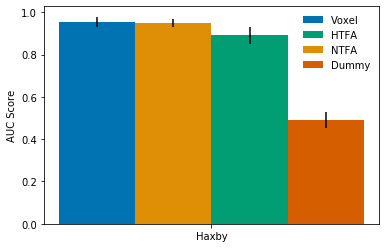

In [23]:
confidence = 0.95
voxel_accuracies = np.mean(voxel_summary_means)
voxel_errs = stats.sem(voxel_summary_means) * stats.t.ppf((1 + confidence) / 2, len(voxel_summary_means) - 1)
htfa_accuracies = np.mean(htfa_summary_means)
htfa_errs = stats.sem(htfa_summary_means) * stats.t.ppf((1 + confidence) / 2, len(htfa_summary_means) - 1)
ntfa_accuracies = np.mean(ntfa_summary_means)
ntfa_errs = stats.sem(ntfa_summary_result) * stats.t.ppf((1 + confidence) / 2, len(ntfa_summary_means) - 1)
dummy_accuracies = np.mean(dummy_summary_means)
dummy_errs = stats.sem(dummy_summary_means) * stats.t.ppf((1 + confidence) / 2, len(dummy_summary_means) - 1)

datasets = ['Haxby'] #, 'Word', 'Rest']

xs = np.arange(len(datasets))

colorblind_cycler = cycler(color=color_palette('colorblind'))
colorblind_colors = [c['color'] for c in colorblind_cycler]
muted_cycler = cycler(color=color_palette('bright'))
muted_colors = [c['color'] for c in muted_cycler]

bar_width = 0.2

fig = pl.figure()
voxel_bar = pl.bar(xs, height=voxel_accuracies, color=colorblind_colors[0], width=bar_width, yerr=voxel_errs)
ntfa_bar = pl.bar(xs + bar_width, height=ntfa_accuracies, color=colorblind_colors[1], width=bar_width, yerr=ntfa_errs)
htfa_bar = pl.bar(xs + 2*bar_width, height=htfa_accuracies, color=colorblind_colors[2], width=bar_width, yerr=htfa_errs)
dummy_bar = pl.bar(xs + 3*bar_width, height=dummy_accuracies, color=colorblind_colors[3], width=bar_width, yerr=dummy_errs)
pl.xticks(xs+1.5*bar_width, datasets)
pl.legend((voxel_bar[0], htfa_bar[0], ntfa_bar[0],dummy_bar[0]), ('Voxel', 'HTFA', 'NTFA','Dummy'))
pl.ylabel('AUC Score')
pl.ylim(bottom=0,)
fig.savefig('affvids_svm_accuracies_ci.pdf')

In [24]:
stats.ttest_ind(ntfa_summary_means,dummy_summary_means)

Ttest_indResult(statistic=20.579976698434848, pvalue=2.3928532160131375e-32)

In [25]:
### task classification using 5Fold CV on NTFA positive vs negative###
cv = StratifiedKFold(n_splits=5,shuffle=True,random_state=42)
summary_result = []
summary_result_chance = []
summary_result_category = []
summary_subject_means = []
summary_subject_chance_means = []
for s in dtfa.subjects():
    if s == 'mdd05':
        print ("Skipping Subject, not enough runs")
    else:
        print("Processing Subject %s" % (s))
        session_labels = []
        data = []
        targets = []
        for i in range(dtfa.num_blocks):
#             if i not in validation_blocks:
            block = dtfa._blocks[i]
            if block.subject == s:
                session_labels.append(block.run)
                data.append(all_weights_dtfa[i,:,:].mean(0))
                targets.append(positive_negative_labeler(block.task))
        data = np.array(data)
        overall_result,overall_result_chance,category_result = classification_pipeline(data=data,
                                                                       targets=targets,
                                                                       session_labels=None, cv=cv,
                                                                       scoring="roc_auc",
                                                                       print_all=True)
        summary_result_category.append(category_result)
        summary_result.extend(overall_result)
        summary_result_chance.extend(overall_result_chance)
        summary_subject_means.append(np.array(overall_result).mean())
        summary_subject_chance_means.append(np.array(overall_result_chance).mean())

print ('...')
category_result = {key:[] for key in ['positive','negative']}
for c in ['positive','negative']:
    for s in summary_result_category:
        if c in s.keys():
            category_result[c].extend(s[c])
    print("NTFA Summary Score Across Subjects, For Category %s : %1.4f +- %1.4f" % (c,
np.array(category_result[c]).mean(),
np.array(category_result[c]).std()))
    
print ('...')
print("NTFA Summary Score Across Subjects, Across Tasks: %1.4f +- %1.4f" % (
np.array(summary_result).mean(),
np.array(summary_result).std()))

print("Overall Dummy Score: %1.4f +- %1.4f" % (
np.array(summary_result_chance).mean(),
np.array(summary_result_chance).std()))

print ('...')
print("NTFA Summary Mean/SE, Across Tasks: %1.4f +- %1.4f" % (
np.array(summary_subject_means).mean(),
stats.sem(summary_subject_means) 
    * stats.t.ppf((1 + confidence) / 2, len(summary_subject_means) - 1)))

print("Overall Dummy Mean/SE Score: %1.4f +- %1.4f" % (
np.array(summary_subject_chance_means).mean(),
stats.sem(summary_subject_chance_means) 
    * stats.t.ppf((1 + confidence) / 2, len(summary_subject_chance_means) - 1)))

ntfa_summary_result = summary_result
dummy_summary_result = summary_result_chance
ntfa_summary_means = summary_subject_means
dummy_summary_means = summary_subject_chance_means
ntfa_pos_neg_summary_means = ntfa_summary_means
dummy_pos_neg_summary_means = dummy_summary_means

Processing Subject control01
Processing negative
Scores: 0.4000 +- 0.3742
Chance Scores: 0.5500 +- 0.1871
Processing positive
Scores: 0.4000 +- 0.3742
Chance Scores: 0.4000 +- 0.3742
...
Overall Score: 0.4000 +- 0.3742
Overall Dummy Score: 0.4750 +- 0.3052


Processing Subject control02
Processing negative
Scores: 0.5000 +- 0.3162
Chance Scores: 0.3500 +- 0.3391
Processing positive
Scores: 0.5000 +- 0.3162
Chance Scores: 0.3500 +- 0.3000
...
Overall Score: 0.5000 +- 0.3162
Overall Dummy Score: 0.3500 +- 0.3202


Processing Subject control03
Processing negative
Scores: 0.8500 +- 0.2000
Chance Scores: 0.6000 +- 0.2550
Processing positive
Scores: 0.8500 +- 0.2000
Chance Scores: 0.5000 +- 0.2236
...
Overall Score: 0.8500 +- 0.2000
Overall Dummy Score: 0.5500 +- 0.2449


Processing Subject control04
Processing negative
Scores: 0.5500 +- 0.4000
Chance Scores: 0.4500 +- 0.3317
Processing positive
Scores: 0.5500 +- 0.4000
Chance Scores: 0.3000 +- 0.2449
...
Overall Score: 0.5500 +- 0.4000
Over

Scores: 0.7000 +- 0.2449
Chance Scores: 0.4000 +- 0.3391
...
Overall Score: 0.7000 +- 0.2449
Overall Dummy Score: 0.5000 +- 0.3162


Processing Subject mdd18
Processing negative
Scores: 0.8000 +- 0.2449
Chance Scores: 0.6000 +- 0.2550
Processing positive
Scores: 0.8000 +- 0.2449
Chance Scores: 0.5000 +- 0.3536
...
Overall Score: 0.8000 +- 0.2449
Overall Dummy Score: 0.5500 +- 0.3122


Processing Subject mdd19
Processing negative
Scores: 0.2500 +- 0.3873
Chance Scores: 0.6000 +- 0.1225
Processing positive
Scores: 0.2500 +- 0.3873
Chance Scores: 0.4500 +- 0.1871
...
Overall Score: 0.2500 +- 0.3873
Overall Dummy Score: 0.5250 +- 0.1750


...
NTFA Summary Score Across Subjects, For Category positive : 0.5513 +- 0.3911
NTFA Summary Score Across Subjects, For Category negative : 0.5513 +- 0.3911
...
NTFA Summary Score Across Subjects, Across Tasks: 0.5513 +- 0.3911
Overall Dummy Score: 0.4796 +- 0.2788
...
NTFA Summary Mean/SE, Across Tasks: 0.5513 +- 0.0619
Overall Dummy Mean/SE Score: 0.47

In [26]:
### task classification using 5Fold CV on HTFA positive vs negative###
cv = StratifiedKFold(n_splits=5,shuffle=True,random_state=42)
summary_result = []
summary_result_chance = []
summary_result_category = []
summary_subject_means = []
summary_subject_chance_means = []
subjects = OrderedSet([b.subject for b in htfa._blocks])
for s in dtfa.subjects():
    if s == 'mdd05':
        print ("Skipping Subject, not enough runs")
    else:
        print("Processing Subject %s" % (s))
        session_labels = []
        data = []
        targets = []
        for i in range(dtfa.num_blocks):
#             if i not in validation_blocks:
            block = dtfa._blocks[i]
            if block.subject == s:
                session_labels.append(block.run)
                data.append(all_weights_htfa[i,:,:].mean(0))
                targets.append(block_positive_negative_labeler(block))
        data = np.array(data)
        overall_result,overall_result_chance,category_result = classification_pipeline(data=data,
                                                                       targets=targets,
                                                                       session_labels=None, cv=cv,
                                                                       scoring="roc_auc",
                                                                       print_all=True)
        summary_result_category.append(category_result)
        summary_result.extend(overall_result)
        summary_result_chance.extend(overall_result_chance)
        summary_subject_means.append(np.array(overall_result).mean())

print ('...')
category_result = {key:[] for key in ['positive','negative']}
for c in ['positive','negative']:
    for s in summary_result_category:
        if c in s.keys():
            category_result[c].extend(s[c])
    print("HTFA Summary Score Across Subjects, For Category %s : %1.4f +- %1.4f" % (c,
np.array(category_result[c]).mean(),
np.array(category_result[c]).std()))
    
print ('...')
print("HTFA Summary Score Across Subjects, Across Tasks: %1.4f +- %1.4f" % (
np.array(summary_result).mean(),
np.array(summary_result).std()))

print("Overall Dummy Score: %1.2f +- %1.2f" % (
np.array(summary_result_chance).mean(),
np.array(summary_result_chance).std()))

print ('...')
print("HTFA Summary Mean/SE, Across Tasks: %1.4f +- %1.4f" % (
np.array(summary_subject_means).mean(),
stats.sem(summary_subject_means) 
    * stats.t.ppf((1 + confidence) / 2, len(summary_subject_means) - 1)))

htfa_summary_result = summary_result
htfa_summary_means = summary_subject_means
htfa_pos_neg_summary_means = htfa_summary_means


Processing Subject control01
Processing negative
Scores: 0.7000 +- 0.4000
Chance Scores: 0.1500 +- 0.1225
Processing positive
Scores: 0.7000 +- 0.4000
Chance Scores: 0.3000 +- 0.1871
...
Overall Score: 0.7000 +- 0.4000
Overall Dummy Score: 0.2250 +- 0.1750


Processing Subject control02
Processing negative
Scores: 0.9500 +- 0.1000
Chance Scores: 0.5500 +- 0.3674
Processing positive
Scores: 0.9500 +- 0.1000
Chance Scores: 0.6000 +- 0.2550
...
Overall Score: 0.9500 +- 0.1000
Overall Dummy Score: 0.5750 +- 0.3172


Processing Subject control03
Processing negative
Scores: 0.6500 +- 0.3000
Chance Scores: 0.5000 +- 0.2739
Processing positive
Scores: 0.6500 +- 0.3000
Chance Scores: 0.4000 +- 0.3391
...
Overall Score: 0.6500 +- 0.3000
Overall Dummy Score: 0.4500 +- 0.3122


Processing Subject control04
Processing negative
Scores: 0.4000 +- 0.3742
Chance Scores: 0.4500 +- 0.1871
Processing positive
Scores: 0.4000 +- 0.3742
Chance Scores: 0.5000 +- 0.2739
...
Overall Score: 0.4000 +- 0.3742
Over

Scores: 0.4000 +- 0.4899
Chance Scores: 0.5500 +- 0.2915
Processing positive
Scores: 0.4000 +- 0.4899
Chance Scores: 0.5500 +- 0.2915
...
Overall Score: 0.4000 +- 0.4899
Overall Dummy Score: 0.5500 +- 0.2915


Processing Subject mdd16
Processing negative
Scores: 0.3000 +- 0.4000
Chance Scores: 0.6000 +- 0.3391
Processing positive
Scores: 0.3000 +- 0.4000
Chance Scores: 0.3500 +- 0.1225
...
Overall Score: 0.3000 +- 0.4000
Overall Dummy Score: 0.4750 +- 0.2839


Processing Subject mdd17
Processing negative
Scores: 0.7500 +- 0.2236
Chance Scores: 0.7000 +- 0.1871
Processing positive
Scores: 0.7500 +- 0.2236
Chance Scores: 0.4000 +- 0.2550
...
Overall Score: 0.7500 +- 0.2236
Overall Dummy Score: 0.5500 +- 0.2693


Processing Subject mdd18
Processing negative
Scores: 0.6000 +- 0.3742
Chance Scores: 0.5500 +- 0.2915
Processing positive
Scores: 0.6000 +- 0.3742
Chance Scores: 0.3500 +- 0.2550
...
Overall Score: 0.6000 +- 0.3742
Overall Dummy Score: 0.4500 +- 0.2915


Processing Subject mdd19


In [27]:
### task classification using 5Fold CV on input data positive vs negative###
cv = StratifiedKFold(n_splits=5,shuffle=True,random_state=42)
summary_result = []
summary_result_chance = []
summary_result_category = []
summary_subject_means = []

for s in dtfa.subjects():
    if s == 'mdd05':
        print ("Skipping Subject, not enough runs")
    else:
        print("Processing Subject %s" % (s))
        session_labels = []
        data = []
        targets = []
        for i in range(dtfa.num_blocks):
            block = dtfa._blocks[i]
#             if i not in validation_blocks:
            if block.subject == s:
                session_labels.append(block.run)
                data.append(dtfa.voxel_activations[i].data.numpy().mean(0))
                targets.append(positive_negative_labeler(block.task))
        data = np.array(data)
        overall_result,overall_result_chance,category_result = classification_pipeline(data=data,
                                                                       targets=targets,
                                                                     session_labels=None,
                                                                        cv=cv,
                                                                       scoring="roc_auc",
                                                                       feature_select=True,
                                                                       print_all=True)

        summary_result_category.append(category_result)
        summary_result.extend(overall_result)
        summary_result_chance.extend(overall_result_chance)
        summary_subject_means.append(np.array(overall_result).mean())

print ('...')
category_result = {key:[] for key in ['positive','negative']}
for c in ['positive','negative']:
    for s in summary_result_category:
        if c in s.keys():
            category_result[c].extend(s[c])
    print("Voxel Summary Score Across Subjects, For Category %s : %1.4f +- %1.4f" % (c,
np.array(category_result[c]).mean(),
np.array(category_result[c]).std()))
    
print ('...')
print("Voxel Summary Score Across Subjects, Across Tasks: %1.4f +- %1.4f" % (
np.array(summary_result).mean(),
np.array(summary_result).std()))

print("Overall Dummy Score: %1.2f +- %1.2f" % (
np.array(summary_result_chance).mean(),
np.array(summary_result_chance).std()))

print ('...')
print("Voxel Summary Mean/SE, Across Tasks: %1.4f +- %1.4f" % (
np.array(summary_subject_means).mean(),
stats.sem(summary_subject_means) 
    * stats.t.ppf((1 + confidence) / 2, len(summary_subject_means) - 1)))

voxel_summary_result = summary_result
voxel_summary_means = summary_subject_means
voxel_pos_neg_summary_means = voxel_summary_means


Processing Subject control01
Processing negative
Scores: 0.6000 +- 0.3742
Chance Scores: 0.5500 +- 0.1871
Processing positive
Scores: 0.6000 +- 0.3742
Chance Scores: 0.7000 +- 0.1000
...
Overall Score: 0.6000 +- 0.3742
Overall Dummy Score: 0.6250 +- 0.1677


Processing Subject control02
Processing negative
Scores: 0.5000 +- 0.3162
Chance Scores: 0.5000 +- 0.1581
Processing positive
Scores: 0.5000 +- 0.3162
Chance Scores: 0.5500 +- 0.1000
...
Overall Score: 0.5000 +- 0.3162
Overall Dummy Score: 0.5250 +- 0.1346


Processing Subject control03
Processing negative
Scores: 0.6000 +- 0.2000
Chance Scores: 0.6000 +- 0.2000
Processing positive
Scores: 0.6000 +- 0.2000
Chance Scores: 0.1500 +- 0.2000
...
Overall Score: 0.6000 +- 0.2000
Overall Dummy Score: 0.3750 +- 0.3010


Processing Subject control04
Processing negative
Scores: 0.7000 +- 0.4000
Chance Scores: 0.3500 +- 0.3000
Processing positive
Scores: 0.7000 +- 0.4000
Chance Scores: 0.7000 +- 0.1871
...
Overall Score: 0.7000 +- 0.4000
Over

Scores: 0.3000 +- 0.4000
Chance Scores: 0.4500 +- 0.2915
Processing positive
Scores: 0.3000 +- 0.4000
Chance Scores: 0.5000 +- 0.3162
...
Overall Score: 0.3000 +- 0.4000
Overall Dummy Score: 0.4750 +- 0.3052


Processing Subject mdd15
Processing negative
Scores: 0.2000 +- 0.4000
Chance Scores: 0.8000 +- 0.1871
Processing positive
Scores: 0.2000 +- 0.4000
Chance Scores: 0.7000 +- 0.2915
...
Overall Score: 0.2000 +- 0.4000
Overall Dummy Score: 0.7500 +- 0.2500


Processing Subject mdd16
Processing negative
Scores: 0.2500 +- 0.3873
Chance Scores: 0.2000 +- 0.1871
Processing positive
Scores: 0.2500 +- 0.3873
Chance Scores: 0.5500 +- 0.3317
...
Overall Score: 0.2500 +- 0.3873
Overall Dummy Score: 0.3750 +- 0.3211


Processing Subject mdd17
Processing negative
Scores: 0.5500 +- 0.1000
Chance Scores: 0.6000 +- 0.2550
Processing positive
Scores: 0.5500 +- 0.1000
Chance Scores: 0.4000 +- 0.1225
...
Overall Score: 0.5500 +- 0.1000
Overall Dummy Score: 0.5000 +- 0.2236


Processing Subject mdd18


In [28]:
### task classification using 5Fold CV on input data positive vs negative###
cv = StratifiedKFold(n_splits=5,shuffle=True,random_state=42)
summary_result = []
summary_result_chance = []
summary_result_category = []
summary_subject_means = []
feature_selection = SelectKBest(f_classif, k=500)

for s in dtfa.subjects():
    if s == 'mdd05':
        print ("Skipping Subject, not enough runs")
    else:
        print("Processing Subject %s" % (s))
        session_labels = []
        data = []
        targets = []
        for i in range(dtfa.num_blocks):
            block = dtfa._blocks[i]
#             if i not in validation_blocks:
            if block.subject == s:
                session_labels.append(block.run)
                data.append(dtfa.voxel_activations[i].data.numpy().mean(0))
                targets.append(positive_negative_labeler(block.task))
        data = np.array(data)
        overall_result,overall_result_chance,category_result = classification_pipeline(data=data,
                                                                       targets=targets,
                                                                     session_labels=None,
                                                                        cv=cv,
                                                                       scoring="roc_auc",
                                                                       feature_select=True,
                                                                       feature_selection=feature_selection,
                                                                       print_all=True)

        summary_result_category.append(category_result)
        summary_result.extend(overall_result)
        summary_result_chance.extend(overall_result_chance)
        summary_subject_means.append(np.array(overall_result).mean())

print ('...')
category_result = {key:[] for key in ['positive','negative']}
for c in ['positive','negative']:
    for s in summary_result_category:
        if c in s.keys():
            category_result[c].extend(s[c])
    print("Voxel Summary Score Across Subjects, For Category %s : %1.4f +- %1.4f" % (c,
np.array(category_result[c]).mean(),
np.array(category_result[c]).std()))
    
print ('...')
print("Voxel Summary Score Across Subjects, Across Tasks: %1.4f +- %1.4f" % (
np.array(summary_result).mean(),
np.array(summary_result).std()))

print("Overall Dummy Score: %1.2f +- %1.2f" % (
np.array(summary_result_chance).mean(),
np.array(summary_result_chance).std()))

print ('...')
print("Voxel Summary Mean/SE, Across Tasks: %1.4f +- %1.4f" % (
np.array(summary_subject_means).mean(),
stats.sem(summary_subject_means) 
    * stats.t.ppf((1 + confidence) / 2, len(summary_subject_means) - 1)))

voxel_summary_result = summary_result
voxel_summary_means = summary_subject_means
voxel_pos_neg_summary_means = voxel_summary_means


Processing Subject control01
Processing negative
Scores: 0.4500 +- 0.3317
Chance Scores: 0.5500 +- 0.1871
Processing positive
Scores: 0.4500 +- 0.3317
Chance Scores: 0.5000 +- 0.1581
...
Overall Score: 0.4500 +- 0.3317
Overall Dummy Score: 0.5250 +- 0.1750


Processing Subject control02
Processing negative
Scores: 0.5000 +- 0.3162
Chance Scores: 0.6000 +- 0.2550
Processing positive
Scores: 0.5000 +- 0.3162
Chance Scores: 0.6000 +- 0.3391
...
Overall Score: 0.5000 +- 0.3162
Overall Dummy Score: 0.6000 +- 0.3000


Processing Subject control03
Processing negative
Scores: 0.6000 +- 0.3742
Chance Scores: 0.5000 +- 0.4472
Processing positive
Scores: 0.6000 +- 0.3742
Chance Scores: 0.4000 +- 0.3391
...
Overall Score: 0.6000 +- 0.3742
Overall Dummy Score: 0.4500 +- 0.4000


Processing Subject control04
Processing negative
Scores: 0.8500 +- 0.2000
Chance Scores: 0.4500 +- 0.2915
Processing positive
Scores: 0.8500 +- 0.2000
Chance Scores: 0.6000 +- 0.2000
...
Overall Score: 0.8500 +- 0.2000
Over

Scores: 0.3000 +- 0.4000
Chance Scores: 0.5500 +- 0.2915
Processing positive
Scores: 0.3000 +- 0.4000
Chance Scores: 0.3500 +- 0.2000
...
Overall Score: 0.3000 +- 0.4000
Overall Dummy Score: 0.4500 +- 0.2693


Processing Subject mdd15
Processing negative
Scores: 0.5000 +- 0.3162
Chance Scores: 0.6000 +- 0.3391
Processing positive
Scores: 0.5000 +- 0.3162
Chance Scores: 0.6000 +- 0.2550
...
Overall Score: 0.5000 +- 0.3162
Overall Dummy Score: 0.6000 +- 0.3000


Processing Subject mdd16
Processing negative
Scores: 0.2000 +- 0.4000
Chance Scores: 0.3000 +- 0.2449
Processing positive
Scores: 0.2000 +- 0.4000
Chance Scores: 0.6500 +- 0.3000
...
Overall Score: 0.2000 +- 0.4000
Overall Dummy Score: 0.4750 +- 0.3250


Processing Subject mdd17
Processing negative
Scores: 0.4750 +- 0.2784
Chance Scores: 0.4000 +- 0.2550
Processing positive
Scores: 0.4250 +- 0.2179
Chance Scores: 0.5500 +- 0.1871
...
Overall Score: 0.4500 +- 0.2512
Overall Dummy Score: 0.4750 +- 0.2358


Processing Subject mdd18


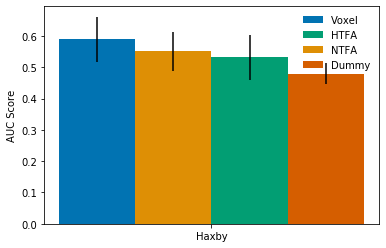

In [29]:
confidence = 0.95
voxel_accuracies = np.mean(voxel_summary_means)
voxel_errs = stats.sem(voxel_summary_means) * stats.t.ppf((1 + confidence) / 2, len(voxel_summary_means) - 1)
htfa_accuracies = np.mean(htfa_summary_means)
htfa_errs = stats.sem(htfa_summary_means) * stats.t.ppf((1 + confidence) / 2, len(htfa_summary_means) - 1)
ntfa_accuracies = np.mean(ntfa_summary_means)
ntfa_errs = stats.sem(ntfa_summary_means) * stats.t.ppf((1 + confidence) / 2, len(ntfa_summary_means) - 1)
dummy_accuracies = np.mean(dummy_summary_means)
dummy_errs = stats.sem(dummy_summary_means) * stats.t.ppf((1 + confidence) / 2, len(dummy_summary_means) - 1)

datasets = ['Haxby'] #, 'Word', 'Rest']

xs = np.arange(len(datasets))

colorblind_cycler = cycler(color=color_palette('colorblind'))
colorblind_colors = [c['color'] for c in colorblind_cycler]
muted_cycler = cycler(color=color_palette('bright'))
muted_colors = [c['color'] for c in muted_cycler]

bar_width = 0.2

fig = pl.figure()
voxel_bar = pl.bar(xs, height=voxel_accuracies, color=colorblind_colors[0], width=bar_width, yerr=voxel_errs)
ntfa_bar = pl.bar(xs + bar_width, height=ntfa_accuracies, color=colorblind_colors[1], width=bar_width, yerr=ntfa_errs)
htfa_bar = pl.bar(xs + 2*bar_width, height=htfa_accuracies, color=colorblind_colors[2], width=bar_width, yerr=htfa_errs)
dummy_bar = pl.bar(xs + 3*bar_width, height=dummy_accuracies, color=colorblind_colors[3], width=bar_width, yerr=dummy_errs)
pl.xticks(xs+1.5*bar_width, datasets)
pl.legend((voxel_bar[0], htfa_bar[0], ntfa_bar[0],dummy_bar[0]), ('Voxel', 'HTFA', 'NTFA','Dummy'))

pl.ylabel('AUC Score')
pl.ylim(bottom=0,)
fig.savefig('affvids_svm_accuracies_ci.pdf')

In [30]:
stats.ttest_ind(ntfa_summary_means,dummy_summary_means)

Ttest_indResult(statistic=2.073916604325874, pvalue=0.04156685832093435)

In [31]:
### task classification using 3Fold CV on NTFA all tasks###
cv = StratifiedKFold(n_splits=3,shuffle=True,random_state=42)
summary_result = []
summary_result_chance = []
summary_result_category = []
summary_subject_means = []
summary_subject_chance_means = []
for s in dtfa.subjects():
    if s == 'mdd05':
        print ("Skipping Subject, not enough runs")
    else:
        print("Processing Subject %s" % (s))
        session_labels = []
        data = []
        targets = []
        for i in range(dtfa.num_blocks):
#             if i not in validation_blocks:
            block = dtfa._blocks[i]
            if block.subject == s:
                session_labels.append(block.run)
                data.append(all_weights_dtfa[i,:,:].mean(0))
                targets.append(task_labeler(block.task))
        data = np.array(data)
        overall_result,overall_result_chance,category_result = classification_pipeline(data=data,
                                                                       targets=targets,
                                                                       session_labels=None, cv=cv,
                                                                       scoring="roc_auc",
                                                                       print_all=True)
        summary_result_category.append(category_result)
        summary_result.extend(overall_result)
        summary_result_chance.extend(overall_result_chance)
        summary_subject_means.append(np.array(overall_result).mean())
        summary_subject_chance_means.append(np.array(overall_result_chance).mean())

print ('...')
category_result = {key:[] for key in ['negative_music','positive_music','positive_sounds','negative_sounds']}
for c in ['negative_music','positive_music','positive_sounds','negative_sounds']:
    for s in summary_result_category:
        if c in s.keys():
            category_result[c].extend(s[c])
    print("NTFA Summary Score Across Subjects, For Category %s : %1.4f +- %1.4f" % (c,
np.array(category_result[c]).mean(),
np.array(category_result[c]).std()))
    
print ('...')
print("NTFA Summary Score Across Subjects, Across Tasks: %1.4f +- %1.4f" % (
np.array(summary_result).mean(),
np.array(summary_result).std()))

print("Overall Dummy Score: %1.4f +- %1.4f" % (
np.array(summary_result_chance).mean(),
np.array(summary_result_chance).std()))

print ('...')
print("NTFA Summary Mean/SE, Across Tasks: %1.4f +- %1.4f" % (
np.array(summary_subject_means).mean(),
stats.sem(summary_subject_means) 
    * stats.t.ppf((1 + confidence) / 2, len(summary_subject_means) - 1)))

print("Overall Dummy Mean/SE Score: %1.4f +- %1.4f" % (
np.array(summary_subject_chance_means).mean(),
stats.sem(summary_subject_chance_means) 
    * stats.t.ppf((1 + confidence) / 2, len(summary_subject_chance_means) - 1)))

ntfa_summary_result = summary_result
dummy_summary_result = summary_result_chance
ntfa_summary_means = summary_subject_means
dummy_summary_means = summary_subject_chance_means

Processing Subject control01
Processing negative_music
Scores: 0.7500 +- 0.2041
Chance Scores: 0.7083 +- 0.2357
Processing negative_sounds
Scores: 0.2500 +- 0.0000
Chance Scores: 0.5417 +- 0.0589
Processing positive_music
Scores: 0.9167 +- 0.1179
Chance Scores: 0.5417 +- 0.2357
Processing positive_sounds
Scores: 0.5417 +- 0.3584
Chance Scores: 0.5000 +- 0.0000
...
Overall Score: 0.6146 +- 0.3286
Overall Dummy Score: 0.5729 +- 0.1872


Processing Subject control02
Processing negative_music
Scores: 0.6250 +- 0.4449
Chance Scores: 0.7500 +- 0.1768
Processing negative_sounds
Scores: 0.9583 +- 0.0589
Chance Scores: 0.4583 +- 0.0589
Processing positive_music
Scores: 0.7083 +- 0.2125
Chance Scores: 0.6667 +- 0.2125
Processing positive_sounds
Scores: 0.7917 +- 0.2125
Chance Scores: 0.3750 +- 0.0000
...
Overall Score: 0.7708 +- 0.2968
Overall Dummy Score: 0.5625 +- 0.2073


Processing Subject control03
Processing negative_music
Scores: 0.5833 +- 0.1179
Chance Scores: 0.6667 +- 0.1559
Processing

Scores: 0.1250 +- 0.1021
Chance Scores: 0.3750 +- 0.2041
...
Overall Score: 0.5729 +- 0.3081
Overall Dummy Score: 0.4896 +- 0.1940


Processing Subject mdd02
Processing negative_music
Scores: 0.5000 +- 0.2041
Chance Scores: 0.7500 +- 0.2041
Processing negative_sounds
Scores: 0.1667 +- 0.1179
Chance Scores: 0.6250 +- 0.2041
Processing positive_music
Scores: 0.7500 +- 0.2041
Chance Scores: 0.5000 +- 0.1768
Processing positive_sounds
Scores: 0.6667 +- 0.3118
Chance Scores: 0.5417 +- 0.3281
...
Overall Score: 0.5208 +- 0.3139
Overall Dummy Score: 0.6042 +- 0.2543


Processing Subject mdd03
Processing negative_music
Scores: 0.4444 +- 0.3425
Chance Scores: 0.4583 +- 0.0589
Processing negative_sounds
Scores: 0.8611 +- 0.1039
Chance Scores: 0.3611 +- 0.1039
Processing positive_music
Scores: 0.5000 +- 0.4082
Chance Scores: 0.2083 +- 0.2125
Processing positive_sounds
Scores: 0.4167 +- 0.4249
Chance Scores: 0.4583 +- 0.0589
...
Overall Score: 0.5556 +- 0.3884
Overall Dummy Score: 0.3715 +- 0.1618

In [32]:
### task classification using 3Fold CV on HTFA all tasks###
cv = StratifiedKFold(n_splits=3,shuffle=True,random_state=42)
summary_result = []
summary_result_chance = []
summary_result_category = []
summary_subject_means = []
summary_subject_chance_means = []
subjects = OrderedSet([b.subject for b in htfa._blocks])
for s in dtfa.subjects():
    if s == 'mdd05':
        print ("Skipping Subject, not enough runs")
    else:
        print("Processing Subject %s" % (s))
        session_labels = []
        data = []
        targets = []
        for i in range(dtfa.num_blocks):
#             if i not in validation_blocks:
            block = dtfa._blocks[i]
            if block.subject == s:
                session_labels.append(block.run)
                data.append(all_weights_htfa[i,:,:].mean(0))
                targets.append(block_task_labeler(block))
        data = np.array(data)
        overall_result,overall_result_chance,category_result = classification_pipeline(data=data,
                                                                       targets=targets,
                                                                       session_labels=None, cv=cv,
                                                                       scoring="roc_auc",
                                                                       print_all=True)
        summary_result_category.append(category_result)
        summary_result.extend(overall_result)
        summary_result_chance.extend(overall_result_chance)
        summary_subject_means.append(np.array(overall_result).mean())

print ('...')
category_result = {key:[] for key in ['negative_music','positive_music','positive_sounds','negative_sounds']}
for c in ['negative_music','positive_music','positive_sounds','negative_sounds']:
    for s in summary_result_category:
        if c in s.keys():
            category_result[c].extend(s[c])
    print("HTFA Summary Score Across Subjects, For Category %s : %1.4f +- %1.4f" % (c,
np.array(category_result[c]).mean(),
np.array(category_result[c]).std()))
    
print ('...')
print("HTFA Summary Score Across Subjects, Across Tasks: %1.4f +- %1.4f" % (
np.array(summary_result).mean(),
np.array(summary_result).std()))

print("Overall Dummy Score: %1.2f +- %1.2f" % (
np.array(summary_result_chance).mean(),
np.array(summary_result_chance).std()))

print ('...')
print("HTFA Summary Mean/SE, Across Tasks: %1.4f +- %1.4f" % (
np.array(summary_subject_means).mean(),
stats.sem(summary_subject_means) 
    * stats.t.ppf((1 + confidence) / 2, len(summary_subject_means) - 1)))

htfa_summary_result = summary_result
htfa_summary_means = summary_subject_means

Processing Subject control01
Processing negative_music
Scores: 0.5833 +- 0.4249
Chance Scores: 0.5000 +- 0.0000
Processing negative_sounds
Scores: 0.6667 +- 0.2357
Chance Scores: 0.3750 +- 0.1021
Processing positive_music
Scores: 0.7917 +- 0.1559
Chance Scores: 0.4167 +- 0.1179
Processing positive_sounds
Scores: 0.6667 +- 0.3118
Chance Scores: 0.8333 +- 0.2357
...
Overall Score: 0.6771 +- 0.3081
Overall Dummy Score: 0.5312 +- 0.2289


Processing Subject control02
Processing negative_music
Scores: 0.8750 +- 0.1021
Chance Scores: 0.4583 +- 0.2125
Processing negative_sounds
Scores: 0.9167 +- 0.1179
Chance Scores: 0.6667 +- 0.3118
Processing positive_music
Scores: 0.5417 +- 0.4125
Chance Scores: 0.5417 +- 0.0589
Processing positive_sounds
Scores: 0.6667 +- 0.1179
Chance Scores: 0.4167 +- 0.1179
...
Overall Score: 0.7500 +- 0.2748
Overall Dummy Score: 0.5208 +- 0.2215


Processing Subject control03
Processing negative_music
Scores: 0.8333 +- 0.1179
Chance Scores: 0.4583 +- 0.2946
Processing

Scores: 0.9167 +- 0.1179
Chance Scores: 0.2917 +- 0.1559
Processing positive_music
Scores: 0.7500 +- 0.0000
Chance Scores: 0.6250 +- 0.1768
Processing positive_sounds
Scores: 0.3333 +- 0.2357
Chance Scores: 0.6250 +- 0.1768
...
Overall Score: 0.7188 +- 0.2706
Overall Dummy Score: 0.5104 +- 0.2251


Processing Subject mdd02
Processing negative_music
Scores: 0.3750 +- 0.2700
Chance Scores: 0.2917 +- 0.0589
Processing negative_sounds
Scores: 0.1667 +- 0.1179
Chance Scores: 0.3750 +- 0.0000
Processing positive_music
Scores: 0.7083 +- 0.4125
Chance Scores: 0.5000 +- 0.0000
Processing positive_sounds
Scores: 0.7917 +- 0.2125
Chance Scores: 0.6667 +- 0.2569
...
Overall Score: 0.5104 +- 0.3731
Overall Dummy Score: 0.4583 +- 0.1932


Processing Subject mdd03
Processing negative_music
Scores: 0.2778 +- 0.2079
Chance Scores: 0.6250 +- 0.2700
Processing negative_sounds
Scores: 0.8889 +- 0.1571
Chance Scores: 0.5833 +- 0.2125
Processing positive_music
Scores: 0.2222 +- 0.2079
Chance Scores: 0.5694 

In [33]:
### task classification using 3Fold CV on input data all tasks###
cv = StratifiedKFold(n_splits=3,shuffle=True,random_state=42)
summary_result = []
summary_result_chance = []
summary_result_category = []
summary_subject_means = []
summary_subject_chance_means = []
for s in dtfa.subjects():
    if s == 'mdd05':
        print ("Skipping Subject, not enough runs")
    else:
        print("Processing Subject %s" % (s))
        session_labels = []
        data = []
        targets = []
        for i in range(dtfa.num_blocks):
            block = dtfa._blocks[i]
#             if i not in validation_blocks:
            if block.subject == s:
                session_labels.append(block.run)
                data.append(dtfa.voxel_activations[i].data.numpy().mean(0))
                targets.append(task_labeler(block.task))
        data = np.array(data)
        overall_result,overall_result_chance,category_result = classification_pipeline(data=data,
                                                                       targets=targets,
                                                                     session_labels=None,
                                                                        cv=cv,
                                                                       scoring="roc_auc",
                                                                       feature_select=True,
                                                                       print_all=True)

        summary_result_category.append(category_result)
        summary_result.extend(overall_result)
        summary_result_chance.extend(overall_result_chance)
        summary_subject_means.append(np.array(overall_result).mean())

print ('...')
category_result = {key:[] for key in ['negative_music','positive_music','positive_sounds','negative_sounds']}
for c in ['negative_music','positive_music','positive_sounds','negative_sounds']:
    for s in summary_result_category:
        if c in s.keys():
            category_result[c].extend(s[c])
    print("Voxel Summary Score Across Subjects, For Category %s : %1.4f +- %1.4f" % (c,
np.array(category_result[c]).mean(),
np.array(category_result[c]).std()))
    
print ('...')
print("Voxel Summary Score Across Subjects, Across Tasks: %1.4f +- %1.4f" % (
np.array(summary_result).mean(),
np.array(summary_result).std()))

print("Overall Dummy Score: %1.2f +- %1.2f" % (
np.array(summary_result_chance).mean(),
np.array(summary_result_chance).std()))

print ('...')
print("Voxel Summary Mean/SE, Across Tasks: %1.4f +- %1.4f" % (
np.array(summary_subject_means).mean(),
stats.sem(summary_subject_means) 
    * stats.t.ppf((1 + confidence) / 2, len(summary_subject_means) - 1)))

voxel_summary_result = summary_result
voxel_summary_means = summary_subject_means

Processing Subject control01
Processing negative_music
Scores: 0.7500 +- 0.2041
Chance Scores: 0.6250 +- 0.1768
Processing negative_sounds
Scores: 0.5000 +- 0.4082
Chance Scores: 0.7083 +- 0.1559
Processing positive_music
Scores: 0.6250 +- 0.2700
Chance Scores: 0.5833 +- 0.2125
Processing positive_sounds
Scores: 0.7083 +- 0.2569
Chance Scores: 0.3750 +- 0.1021
...
Overall Score: 0.6458 +- 0.3097
Overall Dummy Score: 0.5729 +- 0.2070


Processing Subject control02
Processing negative_music
Scores: 0.7083 +- 0.1559
Chance Scores: 0.5417 +- 0.1559
Processing negative_sounds
Scores: 0.9583 +- 0.0589
Chance Scores: 0.3333 +- 0.1179
Processing positive_music
Scores: 0.9167 +- 0.1179
Chance Scores: 0.5833 +- 0.2569
Processing positive_sounds
Scores: 0.3333 +- 0.1179
Chance Scores: 0.4583 +- 0.0589
...
Overall Score: 0.7292 +- 0.2740
Overall Dummy Score: 0.4792 +- 0.1898


Processing Subject control03
Processing negative_music
Scores: 0.2083 +- 0.2125
Chance Scores: 0.2500 +- 0.1021
Processing

Scores: 0.9167 +- 0.1179
Chance Scores: 0.3333 +- 0.1179
...
Overall Score: 0.8125 +- 0.2577
Overall Dummy Score: 0.5104 +- 0.2674


Processing Subject control20
Processing negative_music
Scores: 0.8750 +- 0.1768
Chance Scores: 0.4167 +- 0.1179
Processing negative_sounds
Scores: 0.9167 +- 0.1179
Chance Scores: 0.5833 +- 0.2125
Processing positive_music
Scores: 0.5000 +- 0.3536
Chance Scores: 0.5417 +- 0.2569
Processing positive_sounds
Scores: 0.5833 +- 0.1179
Chance Scores: 0.7083 +- 0.2569
...
Overall Score: 0.7188 +- 0.2801
Overall Dummy Score: 0.5625 +- 0.2421


Processing Subject mdd01
Processing negative_music
Scores: 0.6667 +- 0.3118
Chance Scores: 0.4583 +- 0.1179
Processing negative_sounds
Scores: 0.7500 +- 0.2041
Chance Scores: 0.5000 +- 0.1021
Processing positive_music
Scores: 0.8333 +- 0.1179
Chance Scores: 0.3750 +- 0.2700
Processing positive_sounds
Scores: 0.0000 +- 0.0000
Chance Scores: 0.3750 +- 0.1021
...
Overall Score: 0.5625 +- 0.3836
Overall Dummy Score: 0.4271 +- 0.

Scores: 0.9167 +- 0.1179
Chance Scores: 0.3333 +- 0.0589
...
Overall Score: 0.7083 +- 0.2517
Overall Dummy Score: 0.4375 +- 0.2366


...
Voxel Summary Score Across Subjects, For Category negative_music : 0.7332 +- 0.2889
Voxel Summary Score Across Subjects, For Category positive_music : 0.6630 +- 0.2698
Voxel Summary Score Across Subjects, For Category positive_sounds : 0.6524 +- 0.2914
Voxel Summary Score Across Subjects, For Category negative_sounds : 0.7116 +- 0.2864
...
Voxel Summary Score Across Subjects, Across Tasks: 0.6901 +- 0.2862
Overall Dummy Score: 0.49 +- 0.23
...
Voxel Summary Mean/SE, Across Tasks: 0.6901 +- 0.0302


In [34]:
### task classification using 3Fold CV on input data all tasks###
cv = StratifiedKFold(n_splits=3,shuffle=True,random_state=42)
summary_result = []
summary_result_chance = []
summary_result_category = []
summary_subject_means = []
summary_subject_chance_means = []
feature_selection = SelectKBest(f_classif, k=500)

for s in dtfa.subjects():
    if s == 'mdd05':
        print ("Skipping Subject, not enough runs")
    else:
        print("Processing Subject %s" % (s))
        session_labels = []
        data = []
        targets = []
        for i in range(dtfa.num_blocks):
            block = dtfa._blocks[i]
#             if i not in validation_blocks:
            if block.subject == s:
                session_labels.append(block.run)
                data.append(dtfa.voxel_activations[i].data.numpy().mean(0))
                targets.append(task_labeler(block.task))
        data = np.array(data)
        overall_result,overall_result_chance,category_result = classification_pipeline(data=data,
                                                                       targets=targets,
                                                                     session_labels=None,
                                                                        cv=cv,
                                                                       scoring="roc_auc",
                                                                       feature_select=True,
                                                                       feature_selection=feature_selection,
                                                                       print_all=True)

        summary_result_category.append(category_result)
        summary_result.extend(overall_result)
        summary_result_chance.extend(overall_result_chance)
        summary_subject_means.append(np.array(overall_result).mean())

print ('...')
category_result = {key:[] for key in ['negative_music','positive_music','positive_sounds','negative_sounds']}
for c in ['negative_music','positive_music','positive_sounds','negative_sounds']:
    for s in summary_result_category:
        if c in s.keys():
            category_result[c].extend(s[c])
    print("Voxel Summary Score Across Subjects, For Category %s : %1.4f +- %1.4f" % (c,
np.array(category_result[c]).mean(),
np.array(category_result[c]).std()))
    
print ('...')
print("Voxel Summary Score Across Subjects, Across Tasks: %1.4f +- %1.4f" % (
np.array(summary_result).mean(),
np.array(summary_result).std()))

print("Overall Dummy Score: %1.2f +- %1.2f" % (
np.array(summary_result_chance).mean(),
np.array(summary_result_chance).std()))

print ('...')
print("Voxel Summary Mean/SE, Across Tasks: %1.4f +- %1.4f" % (
np.array(summary_subject_means).mean(),
stats.sem(summary_subject_means) 
    * stats.t.ppf((1 + confidence) / 2, len(summary_subject_means) - 1)))

voxel_summary_result = summary_result
voxel_summary_means = summary_subject_means

Processing Subject control01
Processing negative_music
Scores: 0.7500 +- 0.2041
Chance Scores: 0.5417 +- 0.2357
Processing negative_sounds
Scores: 0.4167 +- 0.4249
Chance Scores: 0.7083 +- 0.0589
Processing positive_music
Scores: 0.5833 +- 0.2357
Chance Scores: 0.7083 +- 0.1559
Processing positive_sounds
Scores: 0.7917 +- 0.2946
Chance Scores: 0.6250 +- 0.1021
...
Overall Score: 0.6354 +- 0.3364
Overall Dummy Score: 0.6458 +- 0.1680


Processing Subject control02
Processing negative_music
Scores: 0.6250 +- 0.2700
Chance Scores: 0.4583 +- 0.0589
Processing negative_sounds
Scores: 0.9167 +- 0.1179
Chance Scores: 0.5000 +- 0.2041
Processing positive_music
Scores: 0.9167 +- 0.1179
Chance Scores: 0.4167 +- 0.1559
Processing positive_sounds
Scores: 0.5417 +- 0.0589
Chance Scores: 0.4167 +- 0.1179
...
Overall Score: 0.7500 +- 0.2339
Overall Dummy Score: 0.4479 +- 0.1484


Processing Subject control03
Processing negative_music
Scores: 0.1250 +- 0.1021
Chance Scores: 0.4583 +- 0.0589
Processing

Scores: 0.8333 +- 0.2357
Chance Scores: 0.4167 +- 0.0589
Processing negative_sounds
Scores: 0.8333 +- 0.1179
Chance Scores: 0.3333 +- 0.0589
Processing positive_music
Scores: 0.5417 +- 0.3281
Chance Scores: 0.2917 +- 0.1179
Processing positive_sounds
Scores: 0.5000 +- 0.0000
Chance Scores: 0.4167 +- 0.1179
...
Overall Score: 0.6771 +- 0.2625
Overall Dummy Score: 0.3646 +- 0.1078


Processing Subject mdd01
Processing negative_music
Scores: 0.5417 +- 0.3584
Chance Scores: 0.3333 +- 0.0589
Processing negative_sounds
Scores: 0.7500 +- 0.2041
Chance Scores: 0.5000 +- 0.2041
Processing positive_music
Scores: 0.8333 +- 0.1179
Chance Scores: 0.5000 +- 0.3536
Processing positive_sounds
Scores: 0.0833 +- 0.1179
Chance Scores: 0.5000 +- 0.1768
...
Overall Score: 0.5521 +- 0.3661
Overall Dummy Score: 0.4583 +- 0.2357


Processing Subject mdd02
Processing negative_music
Scores: 0.6667 +- 0.2357
Chance Scores: 0.4583 +- 0.2125
Processing negative_sounds
Scores: 0.2500 +- 0.0000
Chance Scores: 0.4167

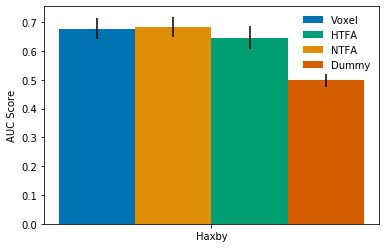

In [35]:
confidence = 0.95
voxel_accuracies = np.mean(voxel_summary_means)
voxel_errs = stats.sem(voxel_summary_means) * stats.t.ppf((1 + confidence) / 2, len(voxel_summary_means) - 1)
htfa_accuracies = np.mean(htfa_summary_means)
htfa_errs = stats.sem(htfa_summary_means) * stats.t.ppf((1 + confidence) / 2, len(htfa_summary_means) - 1)
ntfa_accuracies = np.mean(ntfa_summary_means)
ntfa_errs = stats.sem(ntfa_summary_means) * stats.t.ppf((1 + confidence) / 2, len(ntfa_summary_means) - 1)
dummy_accuracies = np.mean(dummy_summary_means)
dummy_errs = stats.sem(dummy_summary_means) * stats.t.ppf((1 + confidence) / 2, len(dummy_summary_means) - 1)

datasets = ['Haxby'] #, 'Word', 'Rest']

xs = np.arange(len(datasets))

colorblind_cycler = cycler(color=color_palette('colorblind'))
colorblind_colors = [c['color'] for c in colorblind_cycler]
muted_cycler = cycler(color=color_palette('bright'))
muted_colors = [c['color'] for c in muted_cycler]

bar_width = 0.2

fig = pl.figure()
voxel_bar = pl.bar(xs, height=voxel_accuracies, color=colorblind_colors[0], width=bar_width, yerr=voxel_errs)
ntfa_bar = pl.bar(xs + bar_width, height=ntfa_accuracies, color=colorblind_colors[1], width=bar_width, yerr=ntfa_errs)
htfa_bar = pl.bar(xs + 2*bar_width, height=htfa_accuracies, color=colorblind_colors[2], width=bar_width, yerr=htfa_errs)
dummy_bar = pl.bar(xs + 3*bar_width, height=dummy_accuracies, color=colorblind_colors[3], width=bar_width, yerr=dummy_errs)
pl.xticks(xs+1.5*bar_width, datasets)
pl.legend((voxel_bar[0], htfa_bar[0], ntfa_bar[0],dummy_bar[0]), ('Voxel', 'HTFA', 'NTFA','Dummy'))

pl.ylabel('AUC Score')
pl.ylim(bottom=0,)
fig.savefig('affvids_svm_accuracies_ci.pdf')

In [36]:
### task classification using 3Fold CV on NTFA music, negative vs positive###
cv = StratifiedKFold(n_splits=3,shuffle=True,random_state=42)
summary_result = []
summary_result_chance = []
summary_result_category = []
summary_subject_means = []
summary_subject_chance_means = []
for s in dtfa.subjects():
    if s == 'mdd05':
        print ("Skipping Subject, not enough runs")
    else:
        print("Processing Subject %s" % (s))
        session_labels = []
        data = []
        targets = []
        for i in range(dtfa.num_blocks):
            block = dtfa._blocks[i]
            if (block.subject == s) and ('music' in music_sound_labeler(block.task)):
                session_labels.append(block.run)
                data.append(all_weights_dtfa[i,:,:].mean(0))
                targets.append(task_labeler(block.task))
        data = np.array(data)
        overall_result,overall_result_chance,category_result = classification_pipeline(data=data,
                                                                       targets=targets,
                                                                       session_labels=None, cv=cv,
                                                                       scoring="roc_auc",
                                                                       print_all=True)
        summary_result_category.append(category_result)
        summary_result.extend(overall_result)
        summary_result_chance.extend(overall_result_chance)
        summary_subject_means.append(np.array(overall_result).mean())
        summary_subject_chance_means.append(np.array(overall_result_chance).mean())

print ('...')
category_result = {key:[] for key in ['negative_music','positive_music']}
for c in ['negative_music','positive_music']:
    for s in summary_result_category:
        if c in s.keys():
            category_result[c].extend(s[c])
    print("NTFA Summary Score Across Subjects, For Category %s : %1.4f +- %1.4f" % (c,
np.array(category_result[c]).mean(),
np.array(category_result[c]).std()))
    
print ('...')
print("NTFA Summary Score Across Subjects, Across Tasks: %1.4f +- %1.4f" % (
np.array(summary_result).mean(),
np.array(summary_result).std()))

print("Overall Dummy Score: %1.4f +- %1.4f" % (
np.array(summary_result_chance).mean(),
np.array(summary_result_chance).std()))

print ('...')
print("NTFA Summary Mean/SE, Across Tasks: %1.4f +- %1.4f" % (
np.array(summary_subject_means).mean(),
stats.sem(summary_subject_means) 
    * stats.t.ppf((1 + confidence) / 2, len(summary_subject_means) - 1)))

print("Overall Dummy Mean/SE Score: %1.4f +- %1.4f" % (
np.array(summary_subject_chance_means).mean(),
stats.sem(summary_subject_chance_means) 
    * stats.t.ppf((1 + confidence) / 2, len(summary_subject_chance_means) - 1)))

ntfa_summary_result = summary_result
dummy_summary_result = summary_result_chance
ntfa_mus_summary_means = summary_subject_means

Processing Subject control01
Processing negative_music
Scores: 0.5000 +- 0.4082
Chance Scores: 0.4167 +- 0.4249
Processing positive_music
Scores: 0.5000 +- 0.4082
Chance Scores: 0.7500 +- 0.2041
...
Overall Score: 0.5000 +- 0.4082
Overall Dummy Score: 0.5833 +- 0.3727


Processing Subject control02
Processing negative_music
Scores: 0.3333 +- 0.4714
Chance Scores: 0.3333 +- 0.4714
Processing positive_music
Scores: 0.3333 +- 0.4714
Chance Scores: 0.4167 +- 0.3118
...
Overall Score: 0.3333 +- 0.4714
Overall Dummy Score: 0.3750 +- 0.4018


Processing Subject control03
Processing negative_music
Scores: 1.0000 +- 0.0000
Chance Scores: 0.6667 +- 0.1179
Processing positive_music
Scores: 1.0000 +- 0.0000
Chance Scores: 0.5833 +- 0.4249
...
Overall Score: 1.0000 +- 0.0000
Overall Dummy Score: 0.6250 +- 0.3146


Processing Subject control04
Processing negative_music
Scores: 0.8333 +- 0.2357
Chance Scores: 0.0833 +- 0.1179
Processing positive_music
Scores: 0.8333 +- 0.2357
Chance Scores: 0.0833 +-

Scores: 0.3333 +- 0.4714
Chance Scores: 0.3333 +- 0.4714
Processing positive_music
Scores: 0.3333 +- 0.4714
Chance Scores: 0.5000 +- 0.4082
...
Overall Score: 0.3333 +- 0.4714
Overall Dummy Score: 0.4167 +- 0.4488


Processing Subject mdd17
Processing negative_music
Scores: 1.0000 +- 0.0000
Chance Scores: 0.8333 +- 0.2357
Processing positive_music
Scores: 1.0000 +- 0.0000
Chance Scores: 0.1667 +- 0.2357
...
Overall Score: 1.0000 +- 0.0000
Overall Dummy Score: 0.5000 +- 0.4082


Processing Subject mdd18
Processing negative_music
Scores: 0.8333 +- 0.2357
Chance Scores: 0.5000 +- 0.0000
Processing positive_music
Scores: 0.8333 +- 0.2357
Chance Scores: 0.4167 +- 0.3118
...
Overall Score: 0.8333 +- 0.2357
Overall Dummy Score: 0.4583 +- 0.2244


Processing Subject mdd19
Processing negative_music
Scores: 0.5000 +- 0.4082
Chance Scores: 0.4167 +- 0.1179
Processing positive_music
Scores: 0.5000 +- 0.4082
Chance Scores: 0.4167 +- 0.1179
...
Overall Score: 0.5000 +- 0.4082
Overall Dummy Score: 0.

In [37]:
### task classification using 3Fold CV on HTFA music, negative vs positive###
cv = StratifiedKFold(n_splits=3,shuffle=True,random_state=42)
summary_result = []
summary_result_chance = []
summary_result_category = []
summary_subject_means = []
summary_subject_chance_means = []
for s in dtfa.subjects():
    if s == 'mdd05':
        print ("Skipping Subject, not enough runs")
    else:
        print("Processing Subject %s" % (s))
        session_labels = []
        data = []
        targets = []
        for i in range(dtfa.num_blocks):
            block = dtfa._blocks[i]
            if (block.subject == s) and ('music' in music_sound_labeler(block.task)):
                session_labels.append(block.run)
                data.append(all_weights_htfa[i,:,:].mean(0))
                targets.append(task_labeler(block.task))
        data = np.array(data)
        overall_result,overall_result_chance,category_result = classification_pipeline(data=data,
                                                                       targets=targets,
                                                                       session_labels=None, cv=cv,
                                                                       scoring="roc_auc",
                                                                       print_all=True)
        summary_result_category.append(category_result)
        summary_result.extend(overall_result)
        summary_result_chance.extend(overall_result_chance)
        summary_subject_means.append(np.array(overall_result).mean())
        summary_subject_chance_means.append(np.array(overall_result_chance).mean())

print ('...')
category_result = {key:[] for key in ['negative_music','positive_music']}
for c in ['negative_music','positive_music']:
    for s in summary_result_category:
        if c in s.keys():
            category_result[c].extend(s[c])
    print("HTFA Summary Score Across Subjects, For Category %s : %1.4f +- %1.4f" % (c,
np.array(category_result[c]).mean(),
np.array(category_result[c]).std()))
    
print ('...')
print("HTFA Summary Score Across Subjects, Across Tasks: %1.4f +- %1.4f" % (
np.array(summary_result).mean(),
np.array(summary_result).std()))

print("Overall Dummy Score: %1.4f +- %1.4f" % (
np.array(summary_result_chance).mean(),
np.array(summary_result_chance).std()))

print ('...')
print("HTFA Summary Mean/SE, Across Tasks: %1.4f +- %1.4f" % (
np.array(summary_subject_means).mean(),
stats.sem(summary_subject_means) 
    * stats.t.ppf((1 + confidence) / 2, len(summary_subject_means) - 1)))

print("Overall Dummy Mean/SE Score: %1.4f +- %1.4f" % (
np.array(summary_subject_chance_means).mean(),
stats.sem(summary_subject_chance_means) 
    * stats.t.ppf((1 + confidence) / 2, len(summary_subject_chance_means) - 1)))

htfa_summary_result = summary_result
dummy_summary_result = summary_result_chance
htfa_mus_summary_means = summary_subject_means
dummy_mus_summary_means = summary_subject_chance_means

Processing Subject control01
Processing negative_music
Scores: 0.3333 +- 0.4714
Chance Scores: 0.5833 +- 0.4249
Processing positive_music
Scores: 0.3333 +- 0.4714
Chance Scores: 0.0833 +- 0.1179
...
Overall Score: 0.3333 +- 0.4714
Overall Dummy Score: 0.3333 +- 0.3997


Processing Subject control02
Processing negative_music
Scores: 0.6667 +- 0.4714
Chance Scores: 0.5833 +- 0.1179
Processing positive_music
Scores: 0.6667 +- 0.4714
Chance Scores: 0.4167 +- 0.3118
...
Overall Score: 0.6667 +- 0.4714
Overall Dummy Score: 0.5000 +- 0.2500


Processing Subject control03
Processing negative_music
Scores: 1.0000 +- 0.0000
Chance Scores: 0.7500 +- 0.2041
Processing positive_music
Scores: 1.0000 +- 0.0000
Chance Scores: 0.5000 +- 0.0000
...
Overall Score: 1.0000 +- 0.0000
Overall Dummy Score: 0.6250 +- 0.1909


Processing Subject control04
Processing negative_music
Scores: 0.8333 +- 0.2357
Chance Scores: 0.3333 +- 0.2357
Processing positive_music
Scores: 0.8333 +- 0.2357
Chance Scores: 0.8333 +-

Processing negative_music
Scores: 0.5000 +- 0.4082
Chance Scores: 0.2500 +- 0.3536
Processing positive_music
Scores: 0.5000 +- 0.4082
Chance Scores: 0.5833 +- 0.4249
...
Overall Score: 0.5000 +- 0.4082
Overall Dummy Score: 0.4167 +- 0.4249


Processing Subject mdd15
Processing negative_music
Scores: 1.0000 +- 0.0000
Chance Scores: 0.5000 +- 0.2041
Processing positive_music
Scores: 1.0000 +- 0.0000
Chance Scores: 0.1667 +- 0.2357
...
Overall Score: 1.0000 +- 0.0000
Overall Dummy Score: 0.3333 +- 0.2764


Processing Subject mdd16
Processing negative_music
Scores: 0.3333 +- 0.4714
Chance Scores: 0.7500 +- 0.2041
Processing positive_music
Scores: 0.3333 +- 0.4714
Chance Scores: 0.7500 +- 0.2041
...
Overall Score: 0.3333 +- 0.4714
Overall Dummy Score: 0.7500 +- 0.2041


Processing Subject mdd17
Processing negative_music
Scores: 0.3333 +- 0.4714
Chance Scores: 0.4167 +- 0.1179
Processing positive_music
Scores: 0.3333 +- 0.4714
Chance Scores: 0.4167 +- 0.3118
...
Overall Score: 0.3333 +- 0.47

In [38]:
### task classification using 3Fold CV on Input data music, negative vs positive###
cv = StratifiedKFold(n_splits=3,shuffle=True,random_state=42)
summary_result = []
summary_result_chance = []
summary_result_category = []
summary_subject_means = []
summary_subject_chance_means = []
for s in dtfa.subjects():
    if s == 'mdd05':
        print ("Skipping Subject, not enough runs")
    else:
        print("Processing Subject %s" % (s))
        session_labels = []
        data = []
        targets = []
        for i in range(dtfa.num_blocks):
            block = dtfa._blocks[i]
            if (block.subject == s) and ('music' in music_sound_labeler(block.task)):
                session_labels.append(block.run)
                data.append(dtfa.voxel_activations[i].data.numpy().mean(0))
                targets.append(task_labeler(block.task))
        data = np.array(data)
        overall_result,overall_result_chance,category_result = classification_pipeline(data=data,
                                                                       targets=targets,
                                                                       session_labels=None, cv=cv,
                                                                       scoring="roc_auc",
                                                                       feature_select = True,
                                                                       print_all=True)
        summary_result_category.append(category_result)
        summary_result.extend(overall_result)
        summary_result_chance.extend(overall_result_chance)
        summary_subject_means.append(np.array(overall_result).mean())
        summary_subject_chance_means.append(np.array(overall_result_chance).mean())

print ('...')
category_result = {key:[] for key in ['negative_music','positive_music']}
for c in ['negative_music','positive_music']:
    for s in summary_result_category:
        if c in s.keys():
            category_result[c].extend(s[c])
    print("Voxel Summary Score Across Subjects, For Category %s : %1.4f +- %1.4f" % (c,
np.array(category_result[c]).mean(),
np.array(category_result[c]).std()))
    
print ('...')
print("VoxelSummary Score Across Subjects, Across Tasks: %1.4f +- %1.4f" % (
np.array(summary_result).mean(),
np.array(summary_result).std()))

print("Overall Dummy Score: %1.4f +- %1.4f" % (
np.array(summary_result_chance).mean(),
np.array(summary_result_chance).std()))

print ('...')
print("Voxel Summary Mean/SE, Across Tasks: %1.4f +- %1.4f" % (
np.array(summary_subject_means).mean(),
stats.sem(summary_subject_means) 
    * stats.t.ppf((1 + confidence) / 2, len(summary_subject_means) - 1)))

print("Overall Dummy Mean/SE Score: %1.4f +- %1.4f" % (
np.array(summary_subject_chance_means).mean(),
stats.sem(summary_subject_chance_means) 
    * stats.t.ppf((1 + confidence) / 2, len(summary_subject_chance_means) - 1)))

voxel_summary_result = summary_result
dummy_summary_result = summary_result_chance
voxel_mus_summary_means = summary_subject_means

Processing Subject control01
Processing negative_music
Scores: 0.6667 +- 0.4714
Chance Scores: 0.7500 +- 0.2041
Processing positive_music
Scores: 0.6667 +- 0.4714
Chance Scores: 0.5833 +- 0.4249
...
Overall Score: 0.6667 +- 0.4714
Overall Dummy Score: 0.6667 +- 0.3436


Processing Subject control02
Processing negative_music
Scores: 0.6667 +- 0.4714
Chance Scores: 0.6667 +- 0.4714
Processing positive_music
Scores: 0.6667 +- 0.4714
Chance Scores: 0.4167 +- 0.1179
...
Overall Score: 0.6667 +- 0.4714
Overall Dummy Score: 0.5417 +- 0.3656


Processing Subject control03
Processing negative_music
Scores: 1.0000 +- 0.0000
Chance Scores: 0.5833 +- 0.1179
Processing positive_music
Scores: 1.0000 +- 0.0000
Chance Scores: 0.4167 +- 0.3118
...
Overall Score: 1.0000 +- 0.0000
Overall Dummy Score: 0.5000 +- 0.2500


Processing Subject control04
Processing negative_music
Scores: 0.8333 +- 0.2357
Chance Scores: 0.5000 +- 0.4082
Processing positive_music
Scores: 0.8333 +- 0.2357
Chance Scores: 0.4167 +-

Scores: 0.0000 +- 0.0000
Chance Scores: 0.7500 +- 0.2041
...
Overall Score: 0.0000 +- 0.0000
Overall Dummy Score: 0.5833 +- 0.2357


Processing Subject mdd13
Processing negative_music
Scores: 0.8333 +- 0.2357
Chance Scores: 0.2500 +- 0.2041
Processing positive_music
Scores: 0.8333 +- 0.2357
Chance Scores: 0.5000 +- 0.4082
...
Overall Score: 0.8333 +- 0.2357
Overall Dummy Score: 0.3750 +- 0.3461


Processing Subject mdd14
Processing negative_music
Scores: 0.0000 +- 0.0000
Chance Scores: 0.5833 +- 0.1179
Processing positive_music
Scores: 0.0000 +- 0.0000
Chance Scores: 0.6667 +- 0.1179
...
Overall Score: 0.0000 +- 0.0000
Overall Dummy Score: 0.6250 +- 0.1250


Processing Subject mdd15
Processing negative_music
Scores: 1.0000 +- 0.0000
Chance Scores: 0.2500 +- 0.2041
Processing positive_music
Scores: 1.0000 +- 0.0000
Chance Scores: 0.4167 +- 0.1179
...
Overall Score: 1.0000 +- 0.0000
Overall Dummy Score: 0.3333 +- 0.1863


Processing Subject mdd16
Processing negative_music
Scores: 0.3333 

In [39]:
### task classification using 3Fold CV on Input data music, negative vs positive###
cv = StratifiedKFold(n_splits=3,shuffle=True,random_state=42)
summary_result = []
summary_result_chance = []
summary_result_category = []
summary_subject_means = []
summary_subject_chance_means = []
feature_selection = SelectKBest(f_classif, k=500)

for s in dtfa.subjects():
    if s == 'mdd05':
        print ("Skipping Subject, not enough runs")
    else:
        print("Processing Subject %s" % (s))
        session_labels = []
        data = []
        targets = []
        for i in range(dtfa.num_blocks):
            block = dtfa._blocks[i]
            if (block.subject == s) and ('music' in music_sound_labeler(block.task)):
                session_labels.append(block.run)
                data.append(dtfa.voxel_activations[i].data.numpy().mean(0))
                targets.append(task_labeler(block.task))
        data = np.array(data)
        overall_result,overall_result_chance,category_result = classification_pipeline(data=data,
                                                                       targets=targets,
                                                                       session_labels=None, cv=cv,
                                                                       scoring="roc_auc",
                                                                       feature_select = True,
                                                                       feature_selection=feature_selection,
                                                                       print_all=True)
        summary_result_category.append(category_result)
        summary_result.extend(overall_result)
        summary_result_chance.extend(overall_result_chance)
        summary_subject_means.append(np.array(overall_result).mean())
        summary_subject_chance_means.append(np.array(overall_result_chance).mean())

print ('...')
category_result = {key:[] for key in ['negative_music','positive_music']}
for c in ['negative_music','positive_music']:
    for s in summary_result_category:
        if c in s.keys():
            category_result[c].extend(s[c])
    print("Voxel Summary Score Across Subjects, For Category %s : %1.4f +- %1.4f" % (c,
np.array(category_result[c]).mean(),
np.array(category_result[c]).std()))
    
print ('...')
print("VoxelSummary Score Across Subjects, Across Tasks: %1.4f +- %1.4f" % (
np.array(summary_result).mean(),
np.array(summary_result).std()))

print("Overall Dummy Score: %1.4f +- %1.4f" % (
np.array(summary_result_chance).mean(),
np.array(summary_result_chance).std()))

print ('...')
print("Voxel Summary Mean/SE, Across Tasks: %1.4f +- %1.4f" % (
np.array(summary_subject_means).mean(),
stats.sem(summary_subject_means) 
    * stats.t.ppf((1 + confidence) / 2, len(summary_subject_means) - 1)))

print("Overall Dummy Mean/SE Score: %1.4f +- %1.4f" % (
np.array(summary_subject_chance_means).mean(),
stats.sem(summary_subject_chance_means) 
    * stats.t.ppf((1 + confidence) / 2, len(summary_subject_chance_means) - 1)))

voxel_summary_result = summary_result
dummy_summary_result = summary_result_chance
voxel_mus_summary_means = summary_subject_means

Processing Subject control01
Processing negative_music
Scores: 0.6667 +- 0.4714
Chance Scores: 0.0000 +- 0.0000
Processing positive_music
Scores: 0.6667 +- 0.4714
Chance Scores: 0.3333 +- 0.2357
...
Overall Score: 0.6667 +- 0.4714
Overall Dummy Score: 0.1667 +- 0.2357


Processing Subject control02
Processing negative_music
Scores: 0.6667 +- 0.4714
Chance Scores: 0.5000 +- 0.4082
Processing positive_music
Scores: 0.6667 +- 0.4714
Chance Scores: 0.4167 +- 0.3118
...
Overall Score: 0.6667 +- 0.4714
Overall Dummy Score: 0.4583 +- 0.3656


Processing Subject control03
Processing negative_music
Scores: 0.8333 +- 0.2357
Chance Scores: 0.1667 +- 0.1179
Processing positive_music
Scores: 0.8333 +- 0.2357
Chance Scores: 0.5000 +- 0.4082
...
Overall Score: 0.8333 +- 0.2357
Overall Dummy Score: 0.3333 +- 0.3436


Processing Subject control04
Processing negative_music
Scores: 0.8333 +- 0.2357
Chance Scores: 0.6667 +- 0.4714
Processing positive_music
Scores: 0.8333 +- 0.2357
Chance Scores: 0.5000 +-

Scores: 0.0000 +- 0.0000
Chance Scores: 0.5000 +- 0.3536
...
Overall Score: 0.0000 +- 0.0000
Overall Dummy Score: 0.6250 +- 0.3146


Processing Subject mdd13
Processing negative_music
Scores: 0.6667 +- 0.4714
Chance Scores: 0.5000 +- 0.4082
Processing positive_music
Scores: 0.8333 +- 0.2357
Chance Scores: 0.3333 +- 0.4714
...
Overall Score: 0.7500 +- 0.3819
Overall Dummy Score: 0.4167 +- 0.4488


Processing Subject mdd14
Processing negative_music
Scores: 0.0000 +- 0.0000
Chance Scores: 0.2500 +- 0.3536
Processing positive_music
Scores: 0.0000 +- 0.0000
Chance Scores: 0.4167 +- 0.3118
...
Overall Score: 0.0000 +- 0.0000
Overall Dummy Score: 0.3333 +- 0.3436


Processing Subject mdd15
Processing negative_music
Scores: 1.0000 +- 0.0000
Chance Scores: 0.7500 +- 0.2041
Processing positive_music
Scores: 1.0000 +- 0.0000
Chance Scores: 0.5000 +- 0.4082
...
Overall Score: 1.0000 +- 0.0000
Overall Dummy Score: 0.6250 +- 0.3461


Processing Subject mdd16
Processing negative_music
Scores: 0.3333 

In [40]:
### task classification using 3Fold CV on NTFA sounds, negative vs positive###
cv = StratifiedKFold(n_splits=3,shuffle=True,random_state=42)
summary_result = []
summary_result_chance = []
summary_result_category = []
summary_subject_means = []
summary_subject_chance_means = []
for s in dtfa.subjects():
    if s == 'mdd05':
        print ("Skipping Subject, not enough runs")
    else:
        print("Processing Subject %s" % (s))
        session_labels = []
        data = []
        targets = []
        for i in range(dtfa.num_blocks):
            block = dtfa._blocks[i]
            if (block.subject == s) and ('sounds' in music_sound_labeler(block.task)):
                session_labels.append(block.run)
                data.append(all_weights_dtfa[i,:,:].mean(0))
                targets.append(task_labeler(block.task))
        data = np.array(data)
        overall_result,overall_result_chance,category_result = classification_pipeline(data=data,
                                                                       targets=targets,
                                                                       session_labels=None, cv=cv,
                                                                       scoring="roc_auc",
                                                                       print_all=True)
        summary_result_category.append(category_result)
        summary_result.extend(overall_result)
        summary_result_chance.extend(overall_result_chance)
        summary_subject_means.append(np.array(overall_result).mean())
        summary_subject_chance_means.append(np.array(overall_result_chance).mean())

print ('...')
category_result = {key:[] for key in ['negative_sounds','positive_sounds']}
for c in ['negative_sounds','positive_sounds']:
    for s in summary_result_category:
        if c in s.keys():
            category_result[c].extend(s[c])
    print("NTFA Summary Score Across Subjects, For Category %s : %1.4f +- %1.4f" % (c,
np.array(category_result[c]).mean(),
np.array(category_result[c]).std()))
    
print ('...')
print("NTFA Summary Score Across Subjects, Across Tasks: %1.4f +- %1.4f" % (
np.array(summary_result).mean(),
np.array(summary_result).std()))

print("Overall Dummy Score: %1.4f +- %1.4f" % (
np.array(summary_result_chance).mean(),
np.array(summary_result_chance).std()))

print ('...')
print("NTFA Summary Mean/SE, Across Tasks: %1.4f +- %1.4f" % (
np.array(summary_subject_means).mean(),
stats.sem(summary_subject_means) 
    * stats.t.ppf((1 + confidence) / 2, len(summary_subject_means) - 1)))

print("Overall Dummy Mean/SE Score: %1.4f +- %1.4f" % (
np.array(summary_subject_chance_means).mean(),
stats.sem(summary_subject_chance_means) 
    * stats.t.ppf((1 + confidence) / 2, len(summary_subject_chance_means) - 1)))

ntfa_summary_result = summary_result
dummy_summary_result = summary_result_chance
ntfa_sounds_summary_means = summary_subject_means
dummy_sounds_summary_means = summary_subject_chance_means

Processing Subject control01
Processing negative_sounds
Scores: 0.6667 +- 0.2357
Chance Scores: 0.5000 +- 0.3536
Processing positive_sounds
Scores: 0.6667 +- 0.2357
Chance Scores: 0.7500 +- 0.2041
...
Overall Score: 0.6667 +- 0.2357
Overall Dummy Score: 0.6250 +- 0.3146


Processing Subject control02
Processing negative_sounds
Scores: 1.0000 +- 0.0000
Chance Scores: 0.2500 +- 0.2041
Processing positive_sounds
Scores: 1.0000 +- 0.0000
Chance Scores: 0.8333 +- 0.2357
...
Overall Score: 1.0000 +- 0.0000
Overall Dummy Score: 0.5417 +- 0.3656


Processing Subject control03
Processing negative_sounds
Scores: 0.5000 +- 0.4082
Chance Scores: 0.5000 +- 0.2041
Processing positive_sounds
Scores: 0.5000 +- 0.4082
Chance Scores: 0.3333 +- 0.1179
...
Overall Score: 0.5000 +- 0.4082
Overall Dummy Score: 0.4167 +- 0.1863


Processing Subject control04
Processing negative_sounds
Scores: 0.5000 +- 0.4082
Chance Scores: 0.5833 +- 0.4249
Processing positive_sounds
Scores: 0.5000 +- 0.4082
Chance Scores: 0

In [41]:
### task classification using 3Fold CV on HTFA sounds, negative vs positive###
cv = StratifiedKFold(n_splits=3,shuffle=True,random_state=42)
summary_result = []
summary_result_chance = []
summary_result_category = []
summary_subject_means = []
summary_subject_chance_means = []
for s in dtfa.subjects():
    if s == 'mdd05':
        print ("Skipping Subject, not enough runs")
    else:
        print("Processing Subject %s" % (s))
        session_labels = []
        data = []
        targets = []
        for i in range(dtfa.num_blocks):
            block = dtfa._blocks[i]
            if (block.subject == s) and ('sounds' in music_sound_labeler(block.task)):
                session_labels.append(block.run)
                data.append(all_weights_htfa[i,:,:].mean(0))
                targets.append(task_labeler(block.task))
        data = np.array(data)
        overall_result,overall_result_chance,category_result = classification_pipeline(data=data,
                                                                       targets=targets,
                                                                       session_labels=None, cv=cv,
                                                                       scoring="roc_auc",
                                                                       print_all=True)
        summary_result_category.append(category_result)
        summary_result.extend(overall_result)
        summary_result_chance.extend(overall_result_chance)
        summary_subject_means.append(np.array(overall_result).mean())
        summary_subject_chance_means.append(np.array(overall_result_chance).mean())

print ('...')
category_result = {key:[] for key in ['negative_sounds','positive_sounds']}
for c in ['negative_sounds','positive_sounds']:
    for s in summary_result_category:
        if c in s.keys():
            category_result[c].extend(s[c])
    print("HTFA Summary Score Across Subjects, For Category %s : %1.4f +- %1.4f" % (c,
np.array(category_result[c]).mean(),
np.array(category_result[c]).std()))
    
print ('...')
print("HTFA Summary Score Across Subjects, Across Tasks: %1.4f +- %1.4f" % (
np.array(summary_result).mean(),
np.array(summary_result).std()))

print("Overall Dummy Score: %1.4f +- %1.4f" % (
np.array(summary_result_chance).mean(),
np.array(summary_result_chance).std()))

print ('...')
print("HTFA Summary Mean/SE, Across Tasks: %1.4f +- %1.4f" % (
np.array(summary_subject_means).mean(),
stats.sem(summary_subject_means) 
    * stats.t.ppf((1 + confidence) / 2, len(summary_subject_means) - 1)))

print("Overall Dummy Mean/SE Score: %1.4f +- %1.4f" % (
np.array(summary_subject_chance_means).mean(),
stats.sem(summary_subject_chance_means) 
    * stats.t.ppf((1 + confidence) / 2, len(summary_subject_chance_means) - 1)))

htfa_summary_result = summary_result
dummy_summary_result = summary_result_chance
htfa_sounds_summary_means = summary_subject_means

Processing Subject control01
Processing negative_sounds
Scores: 0.8333 +- 0.2357
Chance Scores: 0.7500 +- 0.2041
Processing positive_sounds
Scores: 0.8333 +- 0.2357
Chance Scores: 0.3333 +- 0.2357
...
Overall Score: 0.8333 +- 0.2357
Overall Dummy Score: 0.5417 +- 0.3033


Processing Subject control02
Processing negative_sounds
Scores: 1.0000 +- 0.0000
Chance Scores: 0.3333 +- 0.1179
Processing positive_sounds
Scores: 1.0000 +- 0.0000
Chance Scores: 0.4167 +- 0.1179
...
Overall Score: 1.0000 +- 0.0000
Overall Dummy Score: 0.3750 +- 0.1250


Processing Subject control03
Processing negative_sounds
Scores: 0.1667 +- 0.2357
Chance Scores: 0.7500 +- 0.2041
Processing positive_sounds
Scores: 0.1667 +- 0.2357
Chance Scores: 0.6667 +- 0.1179
...
Overall Score: 0.1667 +- 0.2357
Overall Dummy Score: 0.7083 +- 0.1718


Processing Subject control04
Processing negative_sounds
Scores: 0.5000 +- 0.4082
Chance Scores: 0.2500 +- 0.2041
Processing positive_sounds
Scores: 0.5000 +- 0.4082
Chance Scores: 0

Scores: 0.3333 +- 0.2357
Chance Scores: 0.5833 +- 0.1179
...
Overall Score: 0.3333 +- 0.2357
Overall Dummy Score: 0.5000 +- 0.1443


Processing Subject mdd13
Processing negative_sounds
Scores: 1.0000 +- 0.0000
Chance Scores: 0.3333 +- 0.1179
Processing positive_sounds
Scores: 1.0000 +- 0.0000
Chance Scores: 0.5833 +- 0.1179
...
Overall Score: 1.0000 +- 0.0000
Overall Dummy Score: 0.4583 +- 0.1718


Processing Subject mdd14
Processing negative_sounds
Scores: 0.5000 +- 0.4082
Chance Scores: 0.2500 +- 0.2041
Processing positive_sounds
Scores: 0.5000 +- 0.4082
Chance Scores: 0.2500 +- 0.2041
...
Overall Score: 0.5000 +- 0.4082
Overall Dummy Score: 0.2500 +- 0.2041


Processing Subject mdd15
Processing negative_sounds
Scores: 0.3333 +- 0.4714
Chance Scores: 0.3333 +- 0.2357
Processing positive_sounds
Scores: 0.3333 +- 0.4714
Chance Scores: 0.6667 +- 0.1179
...
Overall Score: 0.3333 +- 0.4714
Overall Dummy Score: 0.5000 +- 0.2500


Processing Subject mdd16
Processing negative_sounds
Scores: 

In [42]:
### task classification using 3Fold CV on Input data sounds, negative vs positive###
cv = StratifiedKFold(n_splits=3,shuffle=True,random_state=42)
summary_result = []
summary_result_chance = []
summary_result_category = []
summary_subject_means = []
summary_subject_chance_means = []
for s in dtfa.subjects():
    if s == 'mdd05':
        print ("Skipping Subject, not enough runs")
    else:
        print("Processing Subject %s" % (s))
        session_labels = []
        data = []
        targets = []
        for i in range(dtfa.num_blocks):
            block = dtfa._blocks[i]
            if (block.subject == s) and ('sounds' in music_sound_labeler(block.task)):
                session_labels.append(block.run)
                data.append(dtfa.voxel_activations[i].data.numpy().mean(0))
                targets.append(task_labeler(block.task))
        data = np.array(data)
        overall_result,overall_result_chance,category_result = classification_pipeline(data=data,
                                                                       targets=targets,
                                                                       session_labels=None, cv=cv,
                                                                       scoring="roc_auc",
                                                                       feature_select = True,
                                                                       print_all=True)
        summary_result_category.append(category_result)
        summary_result.extend(overall_result)
        summary_result_chance.extend(overall_result_chance)
        summary_subject_means.append(np.array(overall_result).mean())
        summary_subject_chance_means.append(np.array(overall_result_chance).mean())

print ('...')
category_result = {key:[] for key in ['negative_sounds','positive_sounds']}
for c in ['negative_sounds','positive_sounds']:
    for s in summary_result_category:
        if c in s.keys():
            category_result[c].extend(s[c])
    print("Voxel Summary Score Across Subjects, For Category %s : %1.4f +- %1.4f" % (c,
np.array(category_result[c]).mean(),
np.array(category_result[c]).std()))
    
print ('...')
print("VoxelSummary Score Across Subjects, Across Tasks: %1.4f +- %1.4f" % (
np.array(summary_result).mean(),
np.array(summary_result).std()))

print("Overall Dummy Score: %1.4f +- %1.4f" % (
np.array(summary_result_chance).mean(),
np.array(summary_result_chance).std()))

print ('...')
print("Voxel Summary Mean/SE, Across Tasks: %1.4f +- %1.4f" % (
np.array(summary_subject_means).mean(),
stats.sem(summary_subject_means) 
    * stats.t.ppf((1 + confidence) / 2, len(summary_subject_means) - 1)))

print("Overall Dummy Mean/SE Score: %1.4f +- %1.4f" % (
np.array(summary_subject_chance_means).mean(),
stats.sem(summary_subject_chance_means) 
    * stats.t.ppf((1 + confidence) / 2, len(summary_subject_chance_means) - 1)))

voxel_summary_result = summary_result
dummy_summary_result = summary_result_chance
voxel_sounds_summary_means = summary_subject_means

Processing Subject control01
Processing negative_sounds
Scores: 0.1667 +- 0.2357
Chance Scores: 0.5833 +- 0.1179
Processing positive_sounds
Scores: 0.1667 +- 0.2357
Chance Scores: 0.5833 +- 0.4249
...
Overall Score: 0.1667 +- 0.2357
Overall Dummy Score: 0.5833 +- 0.3118


Processing Subject control02
Processing negative_sounds
Scores: 0.8333 +- 0.2357
Chance Scores: 0.5000 +- 0.4082
Processing positive_sounds
Scores: 0.8333 +- 0.2357
Chance Scores: 0.5000 +- 0.0000
...
Overall Score: 0.8333 +- 0.2357
Overall Dummy Score: 0.5000 +- 0.2887


Processing Subject control03
Processing negative_sounds
Scores: 0.3333 +- 0.2357
Chance Scores: 0.3333 +- 0.2357
Processing positive_sounds
Scores: 0.3333 +- 0.2357
Chance Scores: 0.3333 +- 0.3118
...
Overall Score: 0.3333 +- 0.2357
Overall Dummy Score: 0.3333 +- 0.2764


Processing Subject control04
Processing negative_sounds
Scores: 0.6667 +- 0.4714
Chance Scores: 0.7500 +- 0.2041
Processing positive_sounds
Scores: 0.6667 +- 0.4714
Chance Scores: 0

Scores: 0.0000 +- 0.0000
Chance Scores: 0.4167 +- 0.4249
...
Overall Score: 0.0000 +- 0.0000
Overall Dummy Score: 0.3333 +- 0.3997


Processing Subject mdd13
Processing negative_sounds
Scores: 0.5000 +- 0.4082
Chance Scores: 0.5000 +- 0.2041
Processing positive_sounds
Scores: 0.5000 +- 0.4082
Chance Scores: 0.4167 +- 0.1179
...
Overall Score: 0.5000 +- 0.4082
Overall Dummy Score: 0.4583 +- 0.1718


Processing Subject mdd14
Processing negative_sounds
Scores: 0.5000 +- 0.4082
Chance Scores: 0.5833 +- 0.1179
Processing positive_sounds
Scores: 0.5000 +- 0.4082
Chance Scores: 0.7500 +- 0.2041
...
Overall Score: 0.5000 +- 0.4082
Overall Dummy Score: 0.6667 +- 0.1863


Processing Subject mdd15
Processing negative_sounds
Scores: 0.5000 +- 0.4082
Chance Scores: 0.6667 +- 0.4714
Processing positive_sounds
Scores: 0.5000 +- 0.4082
Chance Scores: 0.5000 +- 0.2041
...
Overall Score: 0.5000 +- 0.4082
Overall Dummy Score: 0.5833 +- 0.3727


Processing Subject mdd16
Processing negative_sounds
Scores: 

In [43]:
### task classification using 3Fold CV on Input data sounds, negative vs positive###
cv = StratifiedKFold(n_splits=3,shuffle=True,random_state=42)
summary_result = []
summary_result_chance = []
summary_result_category = []
summary_subject_means = []
summary_subject_chance_means = []
feature_selection = SelectKBest(f_classif, k=500)

for s in dtfa.subjects():
    if s == 'mdd05':
        print ("Skipping Subject, not enough runs")
    else:
        print("Processing Subject %s" % (s))
        session_labels = []
        data = []
        targets = []
        for i in range(dtfa.num_blocks):
            block = dtfa._blocks[i]
            if (block.subject == s) and ('sounds' in music_sound_labeler(block.task)):
                session_labels.append(block.run)
                data.append(dtfa.voxel_activations[i].data.numpy().mean(0))
                targets.append(task_labeler(block.task))
        data = np.array(data)
        overall_result,overall_result_chance,category_result = classification_pipeline(data=data,
                                                                       targets=targets,
                                                                       session_labels=None, cv=cv,
                                                                       scoring="roc_auc",
                                                                       feature_select = True,
                                                                        feature_selection=feature_selection,
                                                                       print_all=True)
        summary_result_category.append(category_result)
        summary_result.extend(overall_result)
        summary_result_chance.extend(overall_result_chance)
        summary_subject_means.append(np.array(overall_result).mean())
        summary_subject_chance_means.append(np.array(overall_result_chance).mean())

print ('...')
category_result = {key:[] for key in ['negative_sounds','positive_sounds']}
for c in ['negative_sounds','positive_sounds']:
    for s in summary_result_category:
        if c in s.keys():
            category_result[c].extend(s[c])
    print("Voxel Summary Score Across Subjects, For Category %s : %1.4f +- %1.4f" % (c,
np.array(category_result[c]).mean(),
np.array(category_result[c]).std()))
    
print ('...')
print("VoxelSummary Score Across Subjects, Across Tasks: %1.4f +- %1.4f" % (
np.array(summary_result).mean(),
np.array(summary_result).std()))

print("Overall Dummy Score: %1.4f +- %1.4f" % (
np.array(summary_result_chance).mean(),
np.array(summary_result_chance).std()))

print ('...')
print("Voxel Summary Mean/SE, Across Tasks: %1.4f +- %1.4f" % (
np.array(summary_subject_means).mean(),
stats.sem(summary_subject_means) 
    * stats.t.ppf((1 + confidence) / 2, len(summary_subject_means) - 1)))

print("Overall Dummy Mean/SE Score: %1.4f +- %1.4f" % (
np.array(summary_subject_chance_means).mean(),
stats.sem(summary_subject_chance_means) 
    * stats.t.ppf((1 + confidence) / 2, len(summary_subject_chance_means) - 1)))

voxel_summary_result = summary_result
dummy_summary_result = summary_result_chance
voxel_sounds_summary_means = summary_subject_means

Processing Subject control01
Processing negative_sounds
Scores: 0.1667 +- 0.2357
Chance Scores: 0.5833 +- 0.1179
Processing positive_sounds
Scores: 0.1667 +- 0.2357
Chance Scores: 0.4167 +- 0.3118
...
Overall Score: 0.1667 +- 0.2357
Overall Dummy Score: 0.5000 +- 0.2500


Processing Subject control02
Processing negative_sounds
Scores: 0.8333 +- 0.2357
Chance Scores: 0.7500 +- 0.2041
Processing positive_sounds
Scores: 0.8333 +- 0.2357
Chance Scores: 0.5833 +- 0.3118
...
Overall Score: 0.8333 +- 0.2357
Overall Dummy Score: 0.6667 +- 0.2764


Processing Subject control03
Processing negative_sounds
Scores: 0.6667 +- 0.2357
Chance Scores: 0.5833 +- 0.1179
Processing positive_sounds
Scores: 0.6667 +- 0.2357
Chance Scores: 0.5833 +- 0.1179
...
Overall Score: 0.6667 +- 0.2357
Overall Dummy Score: 0.5833 +- 0.1179


Processing Subject control04
Processing negative_sounds
Scores: 0.5000 +- 0.4082
Chance Scores: 0.7500 +- 0.2041
Processing positive_sounds
Scores: 0.5000 +- 0.4082
Chance Scores: 0

Scores: 0.0000 +- 0.0000
Chance Scores: 0.2500 +- 0.2041
Processing positive_sounds
Scores: 0.0000 +- 0.0000
Chance Scores: 0.7500 +- 0.2041
...
Overall Score: 0.0000 +- 0.0000
Overall Dummy Score: 0.5000 +- 0.3227


Processing Subject mdd13
Processing negative_sounds
Scores: 0.6667 +- 0.2357
Chance Scores: 0.8333 +- 0.2357
Processing positive_sounds
Scores: 0.6667 +- 0.2357
Chance Scores: 0.4167 +- 0.1179
...
Overall Score: 0.6667 +- 0.2357
Overall Dummy Score: 0.6250 +- 0.2795


Processing Subject mdd14
Processing negative_sounds
Scores: 0.5000 +- 0.4082
Chance Scores: 0.5833 +- 0.1179
Processing positive_sounds
Scores: 0.5000 +- 0.4082
Chance Scores: 0.5833 +- 0.3118
...
Overall Score: 0.5000 +- 0.4082
Overall Dummy Score: 0.5833 +- 0.2357


Processing Subject mdd15
Processing negative_sounds
Scores: 0.5000 +- 0.4082
Chance Scores: 0.5000 +- 0.3536
Processing positive_sounds
Scores: 0.5000 +- 0.4082
Chance Scores: 0.9167 +- 0.1179
...
Overall Score: 0.5000 +- 0.4082
Overall Dummy Sc

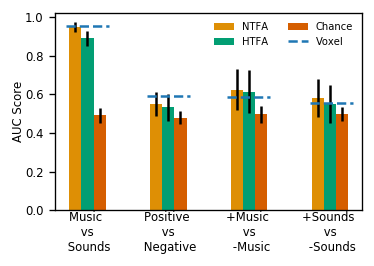

In [44]:
pl.rc('legend', frameon=False)
pl.rc('figure', figsize=( 1 * column_width, 
                          0.66 * column_width),
                dpi=120)
pl.rc('savefig', dpi=300)
pl.rc('font', size=7)

confidence = 0.95
voxel_mus_sounds_accuracies = np.mean(voxel_mus_sounds_summary_means)
voxel_mus_sounds_errs = stats.sem(voxel_mus_sounds_summary_means) * stats.t.ppf((1 + confidence) / 2, 
                                                                     len(voxel_mus_sounds_summary_means) - 1)
htfa_mus_sounds_accuracies = np.mean(htfa_mus_sounds_summary_means)
htfa_mus_sounds_errs = stats.sem(htfa_mus_sounds_summary_means) * stats.t.ppf((1 + confidence) / 2,
                                                                        len(htfa_mus_sounds_summary_means) - 1)
ntfa_mus_sounds_accuracies = np.mean(ntfa_mus_sounds_summary_means)
ntfa_mus_sounds_errs = stats.sem(ntfa_mus_sounds_summary_means) * stats.t.ppf((1 + confidence) / 2,
                                                                        len(ntfa_mus_sounds_summary_means) - 1)
dummy_mus_sounds_accuracies = np.mean(dummy_mus_sounds_summary_means)
dummy_mus_sounds_errs = stats.sem(dummy_mus_sounds_summary_means) * stats.t.ppf((1 + confidence) / 2,
                                                                        len(dummy_mus_sounds_summary_means) - 1)

voxel_pos_neg_accuracies = np.mean(voxel_pos_neg_summary_means)
voxel_pos_neg_errs = stats.sem(voxel_pos_neg_summary_means) * stats.t.ppf((1 + confidence) / 2, 
                                                                     len(voxel_pos_neg_summary_means) - 1)
htfa_pos_neg_accuracies = np.mean(htfa_pos_neg_summary_means)
htfa_pos_neg_errs = stats.sem(htfa_pos_neg_summary_means) * stats.t.ppf((1 + confidence) / 2,
                                                                        len(htfa_pos_neg_summary_means) - 1)
ntfa_pos_neg_accuracies = np.mean(ntfa_pos_neg_summary_means)
ntfa_pos_neg_errs = stats.sem(ntfa_pos_neg_summary_means) * stats.t.ppf((1 + confidence) / 2,
                                                                        len(ntfa_pos_neg_summary_means) - 1)
dummy_pos_neg_accuracies = np.mean(dummy_pos_neg_summary_means)
dummy_pos_neg_errs = stats.sem(dummy_pos_neg_summary_means) * stats.t.ppf((1 + confidence) / 2, 
                                                                          len(dummy_pos_neg_summary_means) - 1)
voxel_mus_accuracies = np.mean(voxel_mus_summary_means)
voxel_mus_errs = stats.sem(voxel_mus_summary_means) * stats.t.ppf((1 + confidence) / 2, 
                                                                     len(voxel_mus_summary_means) - 1)
htfa_mus_accuracies = np.mean(htfa_mus_summary_means)
htfa_mus_errs = stats.sem(htfa_mus_summary_means) * stats.t.ppf((1 + confidence) / 2,
                                                                        len(htfa_mus_summary_means) - 1)
ntfa_mus_accuracies = np.mean(ntfa_mus_summary_means)
ntfa_mus_errs = stats.sem(ntfa_mus_summary_means) * stats.t.ppf((1 + confidence) / 2,
                                                                        len(ntfa_mus_summary_means) - 1)
dummy_mus_accuracies = np.mean(dummy_mus_summary_means)
dummy_mus_errs = stats.sem(dummy_mus_summary_means) * stats.t.ppf((1 + confidence) / 2,
                                                                        len(dummy_mus_summary_means) - 1)

voxel_sounds_accuracies = np.mean(voxel_sounds_summary_means)
voxel_sounds_errs = stats.sem(voxel_sounds_summary_means) * stats.t.ppf((1 + confidence) / 2, 
                                                                     len(voxel_sounds_summary_means) - 1)
htfa_sounds_accuracies = np.mean(htfa_sounds_summary_means)
htfa_sounds_errs = stats.sem(htfa_sounds_summary_means) * stats.t.ppf((1 + confidence) / 2,
                                                                        len(htfa_sounds_summary_means) - 1)
ntfa_sounds_accuracies = np.mean(ntfa_sounds_summary_means)
ntfa_sounds_errs = stats.sem(ntfa_sounds_summary_means) * stats.t.ppf((1 + confidence) / 2,
                                                                        len(ntfa_sounds_summary_means) - 1)
dummy_sounds_accuracies = np.mean(dummy_sounds_summary_means)
dummy_sounds_errs = stats.sem(dummy_sounds_summary_means) * stats.t.ppf((1 + confidence) / 2,
                                                                        len(dummy_sounds_summary_means) - 1)

datasets = ['Music \n vs \n Sounds','Positive \n vs \n Negative',
            '+Music \n vs \n -Music','+Sounds \n vs \n -Sounds'] 

# datasets = ['Music v Sound','Positive v Negative',
#             '+Music v -Music','+Sounds v -Sounds'] 

voxel_accuracies = [voxel_mus_sounds_accuracies,voxel_pos_neg_accuracies,
                    voxel_mus_accuracies,voxel_sounds_accuracies]
voxel_errs = [voxel_mus_sounds_errs, voxel_pos_neg_errs, 
              voxel_mus_errs, voxel_sounds_errs]
htfa_accuracies = [htfa_mus_sounds_accuracies,htfa_pos_neg_accuracies,
                    htfa_mus_accuracies,htfa_sounds_accuracies]
htfa_errs = [htfa_mus_sounds_errs, htfa_pos_neg_errs, 
              htfa_mus_errs, htfa_sounds_errs]
ntfa_accuracies = [ntfa_mus_sounds_accuracies,ntfa_pos_neg_accuracies,
                    ntfa_mus_accuracies,ntfa_sounds_accuracies]
ntfa_errs = [ntfa_mus_sounds_errs, ntfa_pos_neg_errs, 
             ntfa_mus_errs, ntfa_sounds_errs]
dummy_accuracies = [dummy_mus_sounds_accuracies,dummy_pos_neg_accuracies,
                    dummy_mus_accuracies,dummy_sounds_accuracies] 
dummy_errs = [dummy_mus_sounds_errs, dummy_pos_neg_errs, 
             dummy_mus_errs, dummy_sounds_errs]
xs = np.arange(len(datasets))

colorblind_cycler = cycler(color=color_palette('colorblind'))
colorblind_colors = [c['color'] for c in colorblind_cycler]
muted_cycler = cycler(color=color_palette('bright'))
muted_colors = [c['color'] for c in muted_cycler]

bar_width = 0.15
fig = pl.figure()
ax = fig.add_subplot(111)
# voxel_bar = pl.bar(xs, height=voxel_accuracies, color=colorblind_colors[0], width=bar_width, yerr=voxel_errs)
ntfa_bar = pl.bar(xs + 0*bar_width, height=ntfa_accuracies, color=colorblind_colors[1], 
                  width=bar_width, yerr=ntfa_errs,label='NTFA')
htfa_bar = pl.bar(xs + 1*bar_width, height=htfa_accuracies, color=colorblind_colors[2], 
                  width=bar_width, yerr=htfa_errs,label='HTFA')
dummy_bar = pl.bar(xs + 2*bar_width, height=dummy_accuracies, color=colorblind_colors[3], 
                   width=bar_width, yerr=dummy_errs,label='Chance')
ax.axhline(voxel_accuracies[0],xmin=0.035,xmax=0.175,linestyle='dashed',label='Voxel')
ax.axhline(voxel_accuracies[1],xmin=0.30,xmax=0.44,linestyle='dashed')
ax.axhline(voxel_accuracies[2],xmin=0.56,xmax=0.70,linestyle='dashed')
ax.axhline(voxel_accuracies[3],xmin=0.83,xmax=0.97,linestyle='dashed')
handles, labels = ax.get_legend_handles_labels()
# labels, handles = zip(*sorted(zip(labels, handles), key=lambda t: t[0]))
new_labels = ['NTFA','HTFA','Chance','Voxel']
new_handles = [handles[1],handles[2],handles[3],handles[0]]
# ax.set_xticks(xs+bar_width)
# pl.xticks(xs+0*bar_width, datasets)
# pl.xticks([0,1+bar_width,2+bar_width,3+bar_width], datasets)
ax.set_xticks(xs+1*bar_width)
ax.tick_params(axis='x',bottom=False,pad=-3)
ax.set_xticklabels(datasets)
pl.legend(new_handles, new_labels,ncol=2, prop={'size': 6})

pl.ylabel('AUC Score',labelpad=0)
pl.ylim(bottom=0,)
fig.savefig('lepping_svm_accuracies_ci.pdf')

In [45]:
from scipy.stats import pearsonr
from scipy.special import betainc
def corrcoef(matrix):
    r = np.corrcoef(matrix)
    rf = r[np.triu_indices(r.shape[0], 1)]
    df = matrix.shape[1] - 2
    ts = rf * rf * (df / (1 - rf * rf))
    pf = betainc(0.5 * df, 0.5, df / (df + ts))
    p = np.zeros(shape=r.shape)
    p[np.triu_indices(p.shape[0], 1)] = pf
    p[np.tril_indices(p.shape[0], -1)] = p.T[np.tril_indices(p.shape[0], -1)]
    p[np.diag_indices(p.shape[0])] = np.ones(p.shape[0])
    return r, p


In [46]:
### functional connectivity using NTFA ###

all_factor_centers = dtfa_hyperparams['factor_centers']['mu'].data.numpy()
all_factor_widths = np.exp(dtfa_hyperparams['factor_log_widths']['mu'].data.numpy())

negative_music_matrix = []
positive_music_matrix = []
negative_sounds_matrix = []
positive_sounds_matrix = []

all_matrix = []

negative_music_matrix_p = []
positive_music_matrix_p = []
negative_sounds_matrix_p = []
positive_sounds_matrix_p = []
all_matrix_p = []

for i in range(dtfa.num_blocks):
    r,p = corrcoef(all_weights_dtfa[i,:,:].T)
    p = p < 0.05
    all_matrix.append(r)
    all_matrix_p.append(p)
    if block_task_labeler(dtfa._blocks[i]) == 'negative_music':
        r,p = corrcoef(all_weights_dtfa[i,:,:].T)
        p = p < 0.05
        negative_music_matrix.append(r)
        negative_music_matrix_p.append(p)
    elif  block_task_labeler(dtfa._blocks[i]) == 'positive_music':
        r,p = corrcoef(all_weights_dtfa[i,:,:].T)
        p = p < 0.05
        positive_music_matrix.append(r)
        positive_music_matrix_p.append(p)
    elif  block_task_labeler(dtfa._blocks[i]) == 'negative_sounds':
        r,p = corrcoef(all_weights_dtfa[i,:,:].T)
        p = p < 0.05
        negative_sounds_matrix.append(r)
        negative_sounds_matrix_p.append(p)
    elif  block_task_labeler(dtfa._blocks[i]) == 'positive_sounds':
        r,p = corrcoef(all_weights_dtfa[i,:,:].T)
        p = p < 0.05
        positive_sounds_matrix.append(r)
        positive_sounds_matrix_p.append(p)
    else:
        print ('Something is WRONG!!!')

        
negative_music_matrix = np.array(negative_music_matrix)
positive_music_matrix = np.array(positive_music_matrix)
negative_sounds_matrix = np.array(negative_sounds_matrix)
positive_sounds_matrix = np.array(positive_sounds_matrix)

all_matrix = np.array(all_matrix)
        
negative_music_matrix_p = np.array(negative_music_matrix_p)
positive_music_matrix_p = np.array(positive_music_matrix_p)
negative_sounds_matrix_p = np.array(negative_sounds_matrix_p)
positive_sounds_matrix_p = np.array(positive_sounds_matrix_p)
all_matrix_p = np.array(all_matrix_p)

negative_music_matrix = negative_music_matrix * negative_music_matrix_p
positive_music_matrix = positive_music_matrix * positive_music_matrix_p
negative_sounds_matrix = negative_sounds_matrix * negative_sounds_matrix_p
positive_sounds_matrix = positive_sounds_matrix * positive_sounds_matrix_p

all_matrix = all_matrix  * all_matrix_p


all_vectors = np.zeros(shape=(all_matrix.shape[0],4950))
all_vectors_p = np.zeros(shape=(all_matrix_p.shape[0],4950))

for i in range(all_matrix.shape[0]):
    all_vectors[i,:] = distance.squareform(all_matrix[i,:,:],checks=False)
    all_vectors_p[i,:] = distance.squareform(all_matrix_p[i,:,:],checks=False)

negative_music_vectors = np.zeros(shape=(negative_music_matrix.shape[0],4950))
negative_music_vectors_p = np.zeros(shape=(negative_music_matrix_p.shape[0],4950))

for i in range(negative_music_matrix.shape[0]):
    negative_music_vectors[i,:] = distance.squareform(negative_music_matrix[i,:,:],checks=False)
    negative_music_vectors_p[i,:] = distance.squareform(negative_music_matrix_p[i,:,:],checks=False)

positive_music_vectors = np.zeros(shape=(positive_music_matrix.shape[0],4950))
positive_music_vectors_p = np.zeros(shape=(positive_music_matrix_p.shape[0],4950))

for i in range(positive_music_matrix.shape[0]):
    positive_music_vectors[i,:] = distance.squareform(positive_music_matrix[i,:,:],checks=False)
    positive_music_vectors_p[i,:] = distance.squareform(positive_music_matrix_p[i,:,:],checks=False)

    
negative_sounds_vectors = np.zeros(shape=(negative_sounds_matrix.shape[0],4950))
negative_sounds_vectors_p = np.zeros(shape=(negative_sounds_matrix_p.shape[0],4950))

for i in range(negative_sounds_matrix.shape[0]):
    negative_sounds_vectors[i,:] = distance.squareform(negative_sounds_matrix[i,:,:],checks=False)
    negative_sounds_vectors_p[i,:] = distance.squareform(negative_sounds_matrix_p[i,:,:],checks=False)
    
positive_sounds_vectors = np.zeros(shape=(positive_sounds_matrix.shape[0],4950))
positive_sounds_vectors_p = np.zeros(shape=(positive_sounds_matrix_p.shape[0],4950))

for i in range(negative_sounds_matrix.shape[0]):
    positive_sounds_vectors[i,:] = distance.squareform(positive_sounds_matrix[i,:,:],checks=False)
    positive_sounds_vectors_p[i,:] = distance.squareform(positive_sounds_matrix_p[i,:,:],checks=False)

    
negative_music_vectors_mean = negative_music_vectors.mean(0)
negative_music_vectors_std = negative_music_vectors.std(0)
positive_music_vectors_mean = positive_music_vectors.mean(0)
positive_music_vectors_std = positive_music_vectors.std(0)
negative_sounds_vectors_mean = negative_sounds_vectors.mean(0)
negative_sounds_vectors_std = negative_sounds_vectors.std(0)
positive_sounds_vectors_mean = positive_sounds_vectors.mean(0)
positive_sounds_vectors_std = positive_sounds_vectors.std(0)

In [47]:
### task classification using 3Fold CV on NTFA all tasks with FC###
cv = StratifiedKFold(n_splits=3,shuffle=True,random_state=42)
summary_result = []
summary_result_chance = []
summary_result_category = []
summary_subject_means = []
summary_subject_chance_means = []
for s in dtfa.subjects():
    if s == 'mdd05':
        print ("Skipping Subject, not enough runs")
    else:
        print("Processing Subject %s" % (s))
        session_labels = []
        data = []
        targets = []
        for i in range(dtfa.num_blocks):
#             if i not in validation_blocks:
            block = dtfa._blocks[i]
            if block.subject == s:
                session_labels.append(block.run)
                data.append((all_vectors[i]))
                targets.append(task_labeler(block.task))
        data = np.array(data)
        overall_result,overall_result_chance,category_result = classification_pipeline(data=data,
                                                                       targets=targets,
                                                                       session_labels=None, cv=cv,
                                                                       scoring="roc_auc",
                                                                       print_all=True)
        summary_result_category.append(category_result)
        summary_result.extend(overall_result)
        summary_result_chance.extend(overall_result_chance)
        summary_subject_means.append(np.array(overall_result).mean())
        summary_subject_chance_means.append(np.array(overall_result_chance).mean())

print ('...')
category_result = {key:[] for key in ['negative_music','positive_music','positive_sounds','negative_sounds']}
for c in ['negative_music','positive_music','positive_sounds','negative_sounds']:
    for s in summary_result_category:
        if c in s.keys():
            category_result[c].extend(s[c])
    print("NTFA Summary Score Across Subjects, For Category %s : %1.4f +- %1.4f" % (c,
np.array(category_result[c]).mean(),
np.array(category_result[c]).std()))
    
print ('...')
print("NTFA Summary Score Across Subjects, Across Tasks: %1.4f +- %1.4f" % (
np.array(summary_result).mean(),
np.array(summary_result).std()))

print("Overall Dummy Score: %1.4f +- %1.4f" % (
np.array(summary_result_chance).mean(),
np.array(summary_result_chance).std()))

print ('...')
print("NTFA Summary Mean/SE, Across Tasks: %1.4f +- %1.4f" % (
np.array(summary_subject_means).mean(),
stats.sem(summary_subject_means) 
    * stats.t.ppf((1 + confidence) / 2, len(summary_subject_means) - 1)))

print("Overall Dummy Mean/SE Score: %1.4f +- %1.4f" % (
np.array(summary_subject_chance_means).mean(),
stats.sem(summary_subject_chance_means) 
    * stats.t.ppf((1 + confidence) / 2, len(summary_subject_chance_means) - 1)))

ntfa_summary_result = summary_result
dummy_summary_result = summary_result_chance
ntfa_summary_means = summary_subject_means
dummy_summary_means = summary_subject_chance_means

Processing Subject control01
Processing negative_music
Scores: 0.2917 +- 0.1559
Chance Scores: 0.8333 +- 0.0589
Processing negative_sounds
Scores: 0.5417 +- 0.1559
Chance Scores: 0.5417 +- 0.2357
Processing positive_music
Scores: 0.6250 +- 0.1021
Chance Scores: 0.5833 +- 0.2569
Processing positive_sounds
Scores: 0.5833 +- 0.1179
Chance Scores: 0.5417 +- 0.2125
...
Overall Score: 0.5104 +- 0.1872
Overall Dummy Score: 0.6250 +- 0.2394


Processing Subject control02
Processing negative_music
Scores: 0.7083 +- 0.1559
Chance Scores: 0.5833 +- 0.2125
Processing negative_sounds
Scores: 0.7500 +- 0.2041
Chance Scores: 0.5000 +- 0.1021
Processing positive_music
Scores: 0.5000 +- 0.0000
Chance Scores: 0.4167 +- 0.1179
Processing positive_sounds
Scores: 0.4583 +- 0.1559
Chance Scores: 0.4583 +- 0.2125
...
Overall Score: 0.6042 +- 0.1965
Overall Dummy Score: 0.4896 +- 0.1801


Processing Subject control03
Processing negative_music
Scores: 0.0833 +- 0.1179
Chance Scores: 0.5833 +- 0.2125
Processing

Scores: 0.6667 +- 0.3118
Chance Scores: 0.2917 +- 0.1179
Processing positive_music
Scores: 0.2500 +- 0.2041
Chance Scores: 0.4583 +- 0.1179
Processing positive_sounds
Scores: 0.5833 +- 0.2357
Chance Scores: 0.6667 +- 0.2125
...
Overall Score: 0.6250 +- 0.3461
Overall Dummy Score: 0.4583 +- 0.1932


Processing Subject mdd02
Processing negative_music
Scores: 0.6667 +- 0.3118
Chance Scores: 0.5833 +- 0.1179
Processing negative_sounds
Scores: 0.7500 +- 0.2041
Chance Scores: 0.3333 +- 0.0589
Processing positive_music
Scores: 0.5000 +- 0.3536
Chance Scores: 0.5417 +- 0.0589
Processing positive_sounds
Scores: 0.7917 +- 0.2946
Chance Scores: 0.5417 +- 0.2357
...
Overall Score: 0.6771 +- 0.3165
Overall Dummy Score: 0.5000 +- 0.1693


Processing Subject mdd03
Processing negative_music
Scores: 0.5000 +- 0.4082
Chance Scores: 0.4306 +- 0.3161
Processing negative_sounds
Scores: 0.6111 +- 0.2833
Chance Scores: 0.5278 +- 0.2461
Processing positive_music
Scores: 0.4722 +- 0.3356
Chance Scores: 0.4167 

In [48]:
### task classification using 3Fold CV on NTFA all tasks with FC with feature selection###
cv = StratifiedKFold(n_splits=3,shuffle=True,random_state=42)
summary_result = []
summary_result_chance = []
summary_result_category = []
summary_subject_means = []
summary_subject_chance_means = []
feature_selection = SelectKBest(f_classif, k=500)
for s in dtfa.subjects():
    if s == 'mdd05':
        print ("Skipping Subject, not enough runs")
    else:
        print("Processing Subject %s" % (s))
        session_labels = []
        data = []
        targets = []
        for i in range(dtfa.num_blocks):
#             if i not in validation_blocks:
            block = dtfa._blocks[i]
            if block.subject == s:
                session_labels.append(block.run)
                data.append(np.arctanh(all_vectors[i]))
                targets.append(task_labeler(block.task))
        data = np.array(data)
        overall_result,overall_result_chance,category_result = classification_pipeline(data=data,
                                                                       targets=targets,
                                                                       session_labels=None, cv=cv,
                                                                       scoring="roc_auc",feature_select=True,
                                                                       feature_selection=feature_selection,
                                                                       print_all=True)
        summary_result_category.append(category_result)
        summary_result.extend(overall_result)
        summary_result_chance.extend(overall_result_chance)
        summary_subject_means.append(np.array(overall_result).mean())
        summary_subject_chance_means.append(np.array(overall_result_chance).mean())

print ('...')
category_result = {key:[] for key in ['negative_music','positive_music','positive_sounds','negative_sounds']}
for c in ['negative_music','positive_music','positive_sounds','negative_sounds']:
    for s in summary_result_category:
        if c in s.keys():
            category_result[c].extend(s[c])
    print("NTFA Summary Score Across Subjects, For Category %s : %1.4f +- %1.4f" % (c,
np.array(category_result[c]).mean(),
np.array(category_result[c]).std()))
    
print ('...')
print("NTFA Summary Score Across Subjects, Across Tasks: %1.4f +- %1.4f" % (
np.array(summary_result).mean(),
np.array(summary_result).std()))

print("Overall Dummy Score: %1.4f +- %1.4f" % (
np.array(summary_result_chance).mean(),
np.array(summary_result_chance).std()))

print ('...')
print("NTFA Summary Mean/SE, Across Tasks: %1.4f +- %1.4f" % (
np.array(summary_subject_means).mean(),
stats.sem(summary_subject_means) 
    * stats.t.ppf((1 + confidence) / 2, len(summary_subject_means) - 1)))

print("Overall Dummy Mean/SE Score: %1.4f +- %1.4f" % (
np.array(summary_subject_chance_means).mean(),
stats.sem(summary_subject_chance_means) 
    * stats.t.ppf((1 + confidence) / 2, len(summary_subject_chance_means) - 1)))

ntfa_summary_result = summary_result
dummy_summary_result = summary_result_chance
ntfa_summary_means = summary_subject_means
dummy_summary_means = summary_subject_chance_means

Processing Subject control01
Processing negative_music
Scores: 0.3750 +- 0.1021
Chance Scores: 0.3750 +- 0.1021
Processing negative_sounds
Scores: 0.6250 +- 0.2700
Chance Scores: 0.5833 +- 0.2357
Processing positive_music
Scores: 0.4167 +- 0.1179
Chance Scores: 0.6250 +- 0.2700
Processing positive_sounds


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   0    1    6 ... 4943 4947 4948] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   0    1    3 ... 4937 4938 4939] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   0    1    6 ... 4938 4940 4949] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   0    1    6 ... 4934 4935 4938] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features 

Scores: 0.6667 +- 0.3118
Chance Scores: 0.5417 +- 0.3281
...
Overall Score: 0.5208 +- 0.2543
Overall Dummy Score: 0.5312 +- 0.2658


Processing Subject control02
Processing negative_music
Scores: 0.5000 +- 0.4082
Chance Scores: 0.2917 +- 0.0589
Processing negative_sounds
Scores: 0.7083 +- 0.0589
Chance Scores: 0.3333 +- 0.0589
Processing positive_music


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   0    1    6 ... 4934 4935 4938] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   0    1    6 ... 4938 4939 4949] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   5    6    8 ... 4943 4944 4946] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   4    5    8 ... 4944 4946 4949] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features 

Scores: 0.4583 +- 0.0589
Chance Scores: 0.5000 +- 0.1021
Processing positive_sounds


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   5    7    8 ... 4944 4946 4948] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   5    7    8 ... 4944 4946 4949] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   4    5    8 ... 4943 4944 4946] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   5    6    8 ... 4943 4944 4946] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features 

Scores: 0.4167 +- 0.1179
Chance Scores: 0.5417 +- 0.2569
...
Overall Score: 0.5208 +- 0.2438
Overall Dummy Score: 0.4167 +- 0.1792


Processing Subject control03
Processing negative_music
Scores: 0.5000 +- 0.2041
Chance Scores: 0.5000 +- 0.2041
Processing negative_sounds
Scores: 0.7917 +- 0.1559
Chance Scores: 0.5000 +- 0.1021
Processing positive_music
Scores: 0.5000 +- 0.4082
Chance Scores: 0.2917 +- 0.1179
Processing positive_sounds


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   1    6    7 ... 4938 4940 4943] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   2    5    6 ... 4943 4946 4948] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   6    8   10 ... 4937 4940 4943] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   6    7   10 ... 4940 4942 4943] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features 

Scores: 0.5833 +- 0.1179
Chance Scores: 0.7500 +- 0.1768
...
Overall Score: 0.5938 +- 0.2754
Overall Dummy Score: 0.5104 +- 0.2251


Processing Subject control04
Processing negative_music
Scores: 0.7500 +- 0.2041
Chance Scores: 0.3750 +- 0.1021
Processing negative_sounds
Scores: 0.8333 +- 0.1179
Chance Scores: 0.4583 +- 0.0589
Processing positive_music
Scores: 0.7083 +- 0.2569
Chance Scores: 0.2500 +- 0.1021
Processing positive_sounds


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   0    9   10 ... 4940 4944 4947] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   0    1    2 ... 4940 4944 4947] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   0    3    7 ... 4943 4944 4946] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   0    4    9 ... 4944 4945 4949] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features 

Scores: 0.1667 +- 0.1179
Chance Scores: 0.4583 +- 0.2125
...
Overall Score: 0.6146 +- 0.3206
Overall Dummy Score: 0.3854 +- 0.1569


Processing Subject control05
Processing negative_music
Scores: 0.3333 +- 0.1179
Chance Scores: 0.4167 +- 0.0589
Processing negative_sounds
Scores: 0.5000 +- 0.0000
Chance Scores: 0.4167 +- 0.0589
Processing positive_music
Scores: 0.8750 +- 0.1768
Chance Scores: 0.4167 +- 0.1179
Processing positive_sounds


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   1    3    6 ... 4947 4948 4949] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   1    3    6 ... 4946 4948 4949] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   1    2    3 ... 4946 4948 4949] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   1    2    3 ... 4946 4948 4949] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features 

Scores: 0.2083 +- 0.1559
Chance Scores: 0.4167 +- 0.1179
...
Overall Score: 0.4792 +- 0.2834
Overall Dummy Score: 0.4167 +- 0.0932


Processing Subject control06
Processing negative_music
Scores: 0.4167 +- 0.3118
Chance Scores: 0.3333 +- 0.1179
Processing negative_sounds


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   8   11   18 ... 4943 4945 4949] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   8    9   25 ... 4946 4948 4949] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   7    8   13 ... 4940 4943 4949] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   8   11   13 ... 4938 4943 4949] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features 

Scores: 0.8333 +- 0.2357
Chance Scores: 0.4583 +- 0.1559
Processing positive_music
Scores: 0.6250 +- 0.2700
Chance Scores: 0.3750 +- 0.1021
Processing positive_sounds
Scores: 0.3750 +- 0.2700
Chance Scores: 0.4583 +- 0.0589
...
Overall Score: 0.5625 +- 0.3287
Overall Dummy Score: 0.4062 +- 0.1263


Processing Subject control07
Processing negative_music
Scores: 0.6667 +- 0.1179
Chance Scores: 0.6250 +- 0.2041
Processing negative_sounds


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   5    8    9 ... 4921 4926 4930] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   3    5    7 ... 4921 4929 4939] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   4    5    7 ... 4934 4938 4939] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   1    5    8 ... 4916 4921 4930] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features 

Scores: 0.4583 +- 0.2125
Chance Scores: 0.7083 +- 0.3281
Processing positive_music
Scores: 0.7917 +- 0.1559
Chance Scores: 0.4167 +- 0.0589
Processing positive_sounds
Scores: 0.5000 +- 0.3536
Chance Scores: 0.4583 +- 0.1559
...
Overall Score: 0.6042 +- 0.2643
Overall Dummy Score: 0.5521 +- 0.2418


Processing Subject control08
Processing negative_music
Scores: 0.1667 +- 0.2357
Chance Scores: 0.7361 +- 0.1678
Processing negative_sounds


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   3    5    8 ... 4921 4929 4935] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   1    4    7 ... 4943 4945 4948] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   1    4    6 ... 4943 4945 4949] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   0    1    3 ... 4943 4945 4946] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features 

Scores: 0.6667 +- 0.2357
Chance Scores: 0.5833 +- 0.2125
Processing positive_music
Scores: 0.3611 +- 0.3068
Chance Scores: 0.4167 +- 0.1179
Processing positive_sounds
Scores: 0.5000 +- 0.2041
Chance Scores: 0.5417 +- 0.1559
...
Overall Score: 0.4236 +- 0.3089
Overall Dummy Score: 0.5694 +- 0.2022


Processing Subject control09
Processing negative_music


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   0    1    3 ... 4940 4943 4945] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   1    4    7 ... 4945 4946 4948] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   1    4    7 ... 4943 4945 4949] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   3    5    9 ... 4946 4947 4949] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features 

Scores: 0.0833 +- 0.1179
Chance Scores: 0.5000 +- 0.1768
Processing negative_sounds
Scores: 0.7083 +- 0.4125
Chance Scores: 0.5000 +- 0.1768
Processing positive_music
Scores: 0.5833 +- 0.4249
Chance Scores: 0.5833 +- 0.2125
Processing positive_sounds
Scores: 0.4583 +- 0.1559
Chance Scores: 0.4583 +- 0.1559
...
Overall Score: 0.4583 +- 0.3898
Overall Dummy Score: 0.5104 +- 0.1872


Processing Subject control10
Processing negative_music


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   3    5    8 ... 4946 4947 4949] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   9   14   18 ... 4946 4947 4949] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   9   11   14 ... 4946 4947 4949] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   9   14   18 ... 4946 4947 4949] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features 

Scores: 0.3333 +- 0.1179
Chance Scores: 0.5417 +- 0.2569
Processing negative_sounds
Scores: 0.3333 +- 0.3118
Chance Scores: 0.4583 +- 0.2125
Processing positive_music
Scores: 0.5417 +- 0.3584
Chance Scores: 0.3333 +- 0.1179
Processing positive_sounds
Scores: 0.7083 +- 0.4125
Chance Scores: 0.7500 +- 0.2041
...
Overall Score: 0.4792 +- 0.3566
Overall Dummy Score: 0.5208 +- 0.2543


Processing Subject control11
Processing negative_music


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   2    3    6 ... 4929 4934 4939] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   1    3    7 ... 4945 4948 4949] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   1    2    3 ... 4941 4943 4949] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   1    3    6 ... 4943 4946 4949] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features 

Scores: 0.4583 +- 0.3864
Chance Scores: 0.4167 +- 0.1559
Processing negative_sounds
Scores: 0.7083 +- 0.2569
Chance Scores: 0.5417 +- 0.2569
Processing positive_music
Scores: 0.2500 +- 0.3536
Chance Scores: 0.3333 +- 0.1179
Processing positive_sounds
Scores: 0.5417 +- 0.3864
Chance Scores: 0.4167 +- 0.2357
...
Overall Score: 0.4896 +- 0.3868
Overall Dummy Score: 0.4271 +- 0.2132


Processing Subject control12
Processing negative_music


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   1    3    7 ... 4943 4948 4949] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   1    2    3 ... 4943 4945 4949] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   1    3    6 ... 4938 4943 4949] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   3    5    7 ... 4943 4946 4949] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features 

Scores: 0.5000 +- 0.2041
Chance Scores: 0.6250 +- 0.3062
Processing negative_sounds
Scores: 0.4167 +- 0.3118
Chance Scores: 0.6667 +- 0.1559
Processing positive_music
Scores: 0.5000 +- 0.3536
Chance Scores: 0.3750 +- 0.1021
Processing positive_sounds


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   2    3    5 ... 4943 4946 4949] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   1    3    5 ... 4943 4946 4949] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   2    3    5 ... 4943 4946 4949] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   3    5    7 ... 4944 4946 4949] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features 

Scores: 0.5417 +- 0.2569
Chance Scores: 0.3333 +- 0.1559
...
Overall Score: 0.4896 +- 0.2907
Overall Dummy Score: 0.5000 +- 0.2447


Processing Subject control13
Processing negative_music
Scores: 0.7083 +- 0.2125
Chance Scores: 0.4167 +- 0.1559
Processing negative_sounds
Scores: 0.4583 +- 0.1559
Chance Scores: 0.5000 +- 0.3062
Processing positive_music
Scores: 0.6250 +- 0.1768
Chance Scores: 0.4583 +- 0.0589
Processing positive_sounds


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   0    2    4 ... 4947 4948 4949] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   2    3    4 ... 4943 4948 4949] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   2    4   12 ... 4943 4948 4949] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   2    3    4 ... 4943 4948 4949] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features 

Scores: 0.4583 +- 0.2946
Chance Scores: 0.5833 +- 0.2125
...
Overall Score: 0.5625 +- 0.2421
Overall Dummy Score: 0.4896 +- 0.2132


Processing Subject control14
Processing negative_music
Scores: 0.2917 +- 0.0589
Chance Scores: 0.5833 +- 0.2125
Processing negative_sounds
Scores: 0.5417 +- 0.3584
Chance Scores: 0.6667 +- 0.2125
Processing positive_music
Scores: 0.5000 +- 0.4082
Chance Scores: 0.4167 +- 0.0589
Processing positive_sounds


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   1    6    7 ... 4946 4948 4949] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   0    1    2 ... 4946 4948 4949] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   1    6    7 ... 4946 4948 4949] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   1    7   10 ... 4947 4948 4949] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features 

Scores: 0.4583 +- 0.4125
Chance Scores: 0.5000 +- 0.2700
...
Overall Score: 0.4479 +- 0.3552
Overall Dummy Score: 0.5417 +- 0.2244


Processing Subject control15
Processing negative_music
Scores: 0.5833 +- 0.3118
Chance Scores: 0.4583 +- 0.0589
Processing negative_sounds
Scores: 0.9167 +- 0.1179
Chance Scores: 0.5417 +- 0.2357
Processing positive_music
Scores: 0.6667 +- 0.1179
Chance Scores: 0.5417 +- 0.3281
Processing positive_sounds


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   0    2    3 ... 4940 4944 4949] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   0    1    2 ... 4944 4948 4949] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   0    2    3 ... 4945 4946 4949] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   0    2    3 ... 4945 4946 4949] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features 

Scores: 0.5833 +- 0.2357
Chance Scores: 0.2917 +- 0.1559
...
Overall Score: 0.6875 +- 0.2526
Overall Dummy Score: 0.4583 +- 0.2412


Processing Subject control16
Processing negative_music
Scores: 0.9167 +- 0.1179
Chance Scores: 0.5417 +- 0.1559
Processing negative_sounds
Scores: 0.9167 +- 0.1179
Chance Scores: 0.5833 +- 0.3118
Processing positive_music
Scores: 0.5000 +- 0.2041
Chance Scores: 0.4583 +- 0.2125
Processing positive_sounds


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   8   10   11 ... 4944 4945 4949] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   8   11   15 ... 4946 4948 4949] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   4    7    8 ... 4944 4948 4949] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   8   10   11 ... 4944 4945 4949] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features 

Scores: 0.5417 +- 0.3584
Chance Scores: 0.4583 +- 0.0589
...
Overall Score: 0.7188 +- 0.2981
Overall Dummy Score: 0.5104 +- 0.2132


Processing Subject control17
Processing negative_music
Scores: 0.5833 +- 0.3118
Chance Scores: 0.6250 +- 0.2700
Processing negative_sounds
Scores: 0.3333 +- 0.1179
Chance Scores: 0.5833 +- 0.1179
Processing positive_music


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   1    3    5 ... 4945 4947 4949] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   1    2    3 ... 4945 4946 4949] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   1    3    5 ... 4944 4945 4949] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   1    3    5 ... 4945 4947 4949] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features 

Scores: 0.7917 +- 0.2125
Chance Scores: 0.2917 +- 0.1559
Processing positive_sounds
Scores: 0.8750 +- 0.1768
Chance Scores: 0.4167 +- 0.0589
...
Overall Score: 0.6458 +- 0.3012
Overall Dummy Score: 0.4792 +- 0.2155


Processing Subject control18
Processing negative_music
Scores: 0.7083 +- 0.2569
Chance Scores: 0.3333 +- 0.0589
Processing negative_sounds
Scores: 0.4583 +- 0.0589
Chance Scores: 0.3750 +- 0.1768
Processing positive_music


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   0    2    3 ... 4941 4946 4948] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   0    2    3 ... 4944 4946 4948] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   0    1    2 ... 4938 4946 4948] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   0    2    3 ... 4944 4946 4948] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features 

Scores: 0.6250 +- 0.2700
Chance Scores: 0.2917 +- 0.1179
Processing positive_sounds
Scores: 0.4167 +- 0.3118
Chance Scores: 0.5417 +- 0.2357
...
Overall Score: 0.5521 +- 0.2722
Overall Dummy Score: 0.3854 +- 0.1872


Processing Subject control19
Processing negative_music
Scores: 0.6250 +- 0.1021
Chance Scores: 0.5417 +- 0.2357
Processing negative_sounds
Scores: 0.3333 +- 0.1179
Chance Scores: 0.2917 +- 0.0589
Processing positive_music


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   1    6    7 ... 4943 4944 4945] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   1    5    6 ... 4943 4945 4946] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   1    4    5 ... 4943 4945 4948] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   0    1    6 ... 4939 4943 4945] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features 

Scores: 0.5000 +- 0.2041
Chance Scores: 0.4167 +- 0.0589
Processing positive_sounds
Scores: 0.7917 +- 0.2946
Chance Scores: 0.4167 +- 0.0589
...
Overall Score: 0.5625 +- 0.2577
Overall Dummy Score: 0.4167 +- 0.1559


Processing Subject control20
Processing negative_music
Scores: 0.6250 +- 0.3680
Chance Scores: 0.3750 +- 0.1021
Processing negative_sounds
Scores: 0.7083 +- 0.2569
Chance Scores: 0.4583 +- 0.1179
Processing positive_music


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   1    3    4 ... 4943 4946 4949] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   1    2    3 ... 4943 4946 4949] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   0    3    5 ... 4946 4947 4949] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   3    5    9 ... 4946 4948 4949] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features 

Scores: 0.7500 +- 0.2041
Chance Scores: 0.5833 +- 0.1559
Processing positive_sounds
Scores: 0.7083 +- 0.4125
Chance Scores: 0.2917 +- 0.1179
...
Overall Score: 0.6979 +- 0.3246
Overall Dummy Score: 0.4271 +- 0.1650


Processing Subject mdd01
Processing negative_music
Scores: 1.0000 +- 0.0000
Chance Scores: 0.4167 +- 0.1179
Processing negative_sounds
Scores: 0.5000 +- 0.3536
Chance Scores: 0.6250 +- 0.1021
Processing positive_music


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   7    9   11 ... 4944 4946 4949] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   3    5    7 ... 4939 4942 4944] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   0    7    9 ... 4943 4944 4945] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   0    5    7 ... 4939 4942 4944] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features 

Scores: 0.7500 +- 0.2041
Chance Scores: 0.4167 +- 0.0589
Processing positive_sounds
Scores: 0.6667 +- 0.1179
Chance Scores: 0.4583 +- 0.0589
...
Overall Score: 0.7292 +- 0.2787
Overall Dummy Score: 0.4792 +- 0.1233


Processing Subject mdd02
Processing negative_music
Scores: 0.4167 +- 0.4249
Chance Scores: 0.4583 +- 0.1179
Processing negative_sounds
Scores: 0.7083 +- 0.2569
Chance Scores: 0.2500 +- 0.0000
Processing positive_music


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   3    5    7 ... 4939 4942 4944] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   7    9   10 ... 4946 4948 4949] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   0    1    2 ... 4946 4948 4949] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   1    2    4 ... 4943 4948 4949] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features 

Scores: 0.3750 +- 0.3062
Chance Scores: 0.6250 +- 0.1768
Processing positive_sounds
Scores: 0.7083 +- 0.2569
Chance Scores: 0.5833 +- 0.2125
...
Overall Score: 0.5521 +- 0.3552
Overall Dummy Score: 0.4792 +- 0.2094


Processing Subject mdd03
Processing negative_music
Scores: 0.3889 +- 0.4374
Chance Scores: 0.5833 +- 0.1179
Processing negative_sounds
Scores: 0.5556 +- 0.2187
Chance Scores: 0.5417 +- 0.2569
Processing positive_music


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   1    3    5 ... 4936 4945 4947] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   0    1    6 ... 4945 4946 4947] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   1    4    6 ... 4936 4945 4947] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   0    1    5 ... 4942 4945 4947] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features 

Scores: 0.3333 +- 0.1179
Chance Scores: 0.4167 +- 0.2357
Processing positive_sounds
Scores: 0.6667 +- 0.3118
Chance Scores: 0.6250 +- 0.1768
...
Overall Score: 0.4861 +- 0.3242
Overall Dummy Score: 0.5417 +- 0.2185


Processing Subject mdd04
Processing negative_music
Scores: 0.6667 +- 0.3118
Chance Scores: 0.2917 +- 0.1559
Processing negative_sounds
Scores: 0.2500 +- 0.0000
Chance Scores: 0.6667 +- 0.2357
Processing positive_music


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   0    3    5 ... 4947 4948 4949] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   1    5    7 ... 4946 4948 4949] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   3    5    8 ... 4942 4946 4949] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   0    5    8 ... 4946 4947 4949] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features 

Scores: 0.8333 +- 0.2357
Chance Scores: 0.3750 +- 0.1021
Processing positive_sounds
Scores: 0.9167 +- 0.1179
Chance Scores: 0.5417 +- 0.0589
...
Overall Score: 0.6667 +- 0.3281
Overall Dummy Score: 0.4688 +- 0.2112


Skipping Subject, not enough runs
Processing Subject mdd06
Processing negative_music
Scores: 0.5000 +- 0.3536
Chance Scores: 0.2917 +- 0.0589
Processing negative_sounds
Scores: 0.6250 +- 0.1021
Chance Scores: 0.4583 +- 0.0589
Processing positive_music


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   0    1    2 ... 4943 4947 4948] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   1    2    3 ... 4943 4947 4948] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   1    2    3 ... 4947 4948 4949] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   0    1    2 ... 4943 4947 4948] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features 

Scores: 0.7500 +- 0.2041
Chance Scores: 0.5833 +- 0.2946
Processing positive_sounds
Scores: 0.4167 +- 0.2357
Chance Scores: 0.5417 +- 0.1559
...
Overall Score: 0.5729 +- 0.2722
Overall Dummy Score: 0.4688 +- 0.2049


Processing Subject mdd07
Processing negative_music
Scores: 0.5417 +- 0.3281
Chance Scores: 0.7083 +- 0.1559
Processing negative_sounds
Scores: 0.6250 +- 0.3680
Chance Scores: 0.5833 +- 0.2125
Processing positive_music


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   0    8    9 ... 4944 4948 4949] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   0    8    9 ... 4944 4948 4949] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   0    5    8 ... 4944 4948 4949] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   0    1    8 ... 4946 4948 4949] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features 

Scores: 0.6250 +- 0.2700
Chance Scores: 0.4167 +- 0.0589
Processing positive_sounds
Scores: 0.7917 +- 0.1559
Chance Scores: 0.4167 +- 0.0589
...
Overall Score: 0.6458 +- 0.3055
Overall Dummy Score: 0.5312 +- 0.1849


Processing Subject mdd08
Processing negative_music
Scores: 0.5000 +- 0.2041
Chance Scores: 0.3750 +- 0.0000
Processing negative_sounds
Scores: 0.4583 +- 0.1559
Chance Scores: 0.6250 +- 0.2700
Processing positive_music


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   0    8    9 ... 4944 4948 4949] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   4    5    9 ... 4941 4944 4946] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   4    7    9 ... 4941 4944 4949] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   0    4    9 ... 4941 4944 4948] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features 

Scores: 0.3333 +- 0.1179
Chance Scores: 0.6667 +- 0.3118
Processing positive_sounds
Scores: 0.5000 +- 0.3536
Chance Scores: 0.3750 +- 0.1021
...
Overall Score: 0.4479 +- 0.2364
Overall Dummy Score: 0.5104 +- 0.2524


Processing Subject mdd09
Processing negative_music
Scores: 0.1667 +- 0.1179
Chance Scores: 0.5000 +- 0.1021
Processing negative_sounds
Scores: 0.6250 +- 0.1768
Chance Scores: 0.5000 +- 0.1768
Processing positive_music


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   4    5    6 ... 4939 4941 4944] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   4    7    9 ... 4941 4944 4949] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   0    4    9 ... 4944 4946 4948] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   1    2    3 ... 4947 4948 4949] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features 

Scores: 0.8750 +- 0.1768
Chance Scores: 0.3333 +- 0.0589
Processing positive_sounds
Scores: 0.4583 +- 0.3281
Chance Scores: 0.5000 +- 0.2700
...
Overall Score: 0.5312 +- 0.3351
Overall Dummy Score: 0.4583 +- 0.1863


Processing Subject mdd10
Processing negative_music
Scores: 0.6667 +- 0.4714
Chance Scores: 0.5833 +- 0.2569
Processing negative_sounds
Scores: 0.6250 +- 0.3062
Chance Scores: 0.5000 +- 0.0000
Processing positive_music


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   2    5    6 ... 4946 4947 4949] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   2    3    5 ... 4947 4948 4949] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   2    5    8 ... 4944 4947 4949] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   2    5    6 ... 4946 4947 4949] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features 

Scores: 0.4167 +- 0.2357
Chance Scores: 0.6667 +- 0.2125
Processing positive_sounds
Scores: 0.5417 +- 0.3864
Chance Scores: 0.5000 +- 0.1768
...
Overall Score: 0.5625 +- 0.3733
Overall Dummy Score: 0.5625 +- 0.2009


Processing Subject mdd11
Processing negative_music
Scores: 0.2917 +- 0.2569
Chance Scores: 0.7500 +- 0.2041
Processing negative_sounds
Scores: 0.2500 +- 0.3536
Chance Scores: 0.3750 +- 0.1021
Processing positive_music


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   3    4    7 ... 4937 4942 4948] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   0    4    6 ... 4942 4948 4949] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   4    7   10 ... 4944 4947 4948] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   0    1    2 ... 4937 4942 4948] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features 

Scores: 0.6250 +- 0.3680
Chance Scores: 0.6250 +- 0.1768
Processing positive_sounds


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   4    7   10 ... 4944 4947 4948] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   0    5    6 ... 4934 4936 4942] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   0    3    5 ... 4938 4942 4947] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   0    1    4 ... 4942 4943 4945] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features 

Scores: 0.3333 +- 0.3118
Chance Scores: 0.3333 +- 0.1179
...
Overall Score: 0.3750 +- 0.3572
Overall Dummy Score: 0.5208 +- 0.2329


Processing Subject mdd12
Processing negative_music
Scores: 0.7500 +- 0.0000
Chance Scores: 0.3333 +- 0.0589
Processing negative_sounds
Scores: 0.7083 +- 0.4125
Chance Scores: 0.3750 +- 0.1021
Processing positive_music
Scores: 0.2917 +- 0.2569
Chance Scores: 0.4583 +- 0.3118
Processing positive_sounds


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   0    1    4 ... 4936 4938 4942] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   0    3    5 ... 4936 4942 4947] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   0    5    6 ... 4937 4942 4943] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   3    5    7 ... 4942 4943 4946] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features 

Scores: 0.5417 +- 0.2125
Chance Scores: 0.4583 +- 0.2125
...
Overall Score: 0.5729 +- 0.3206
Overall Dummy Score: 0.4062 +- 0.2049


Processing Subject mdd13
Processing negative_music
Scores: 0.7083 +- 0.0589
Chance Scores: 0.7083 +- 0.1559
Processing negative_sounds
Scores: 0.5000 +- 0.3536
Chance Scores: 0.5417 +- 0.2569
Processing positive_music
Scores: 0.2917 +- 0.0589
Chance Scores: 0.5417 +- 0.2357
Processing positive_sounds


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   3    5    7 ... 4943 4946 4947] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   3    4    7 ... 4942 4943 4946] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   3    7    8 ... 4943 4944 4946] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   3    7    8 ... 4946 4947 4949] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features 

Scores: 0.4167 +- 0.4249
Chance Scores: 0.6250 +- 0.2041
...
Overall Score: 0.4792 +- 0.3180
Overall Dummy Score: 0.6042 +- 0.2273


Processing Subject mdd14
Processing negative_music
Scores: 0.5417 +- 0.2946
Chance Scores: 0.6250 +- 0.1768
Processing negative_sounds
Scores: 0.6250 +- 0.3680
Chance Scores: 0.5000 +- 0.2041
Processing positive_music
Scores: 0.5833 +- 0.2357
Chance Scores: 0.4167 +- 0.0589
Processing positive_sounds


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   0    1    4 ... 4946 4948 4949] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   0    1    4 ... 4944 4946 4949] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   0    1    2 ... 4944 4946 4949] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   0    1    3 ... 4946 4948 4949] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features 

Scores: 0.5000 +- 0.4082
Chance Scores: 0.5833 +- 0.2125
...
Overall Score: 0.5625 +- 0.3366
Overall Dummy Score: 0.5312 +- 0.1918


Processing Subject mdd15
Processing negative_music
Scores: 0.5833 +- 0.4249
Chance Scores: 0.4583 +- 0.1559
Processing negative_sounds
Scores: 0.2500 +- 0.0000
Chance Scores: 0.5833 +- 0.2946
Processing positive_music
Scores: 0.5833 +- 0.3118
Chance Scores: 0.3333 +- 0.1179
Processing positive_sounds


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   5    9   11 ... 4941 4946 4947] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   2    4    5 ... 4944 4946 4947] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   5    7    9 ... 4943 4946 4947] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   5    7    9 ... 4941 4946 4947] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features 

Scores: 0.0833 +- 0.1179
Chance Scores: 0.4167 +- 0.1179
...
Overall Score: 0.3750 +- 0.3461
Overall Dummy Score: 0.4479 +- 0.2070


Processing Subject mdd16
Processing negative_music
Scores: 0.7917 +- 0.2125
Chance Scores: 0.6667 +- 0.1559
Processing negative_sounds
Scores: 0.4583 +- 0.3584
Chance Scores: 0.6250 +- 0.1768
Processing positive_music
Scores: 0.4167 +- 0.2357
Chance Scores: 0.3750 +- 0.0000
Processing positive_sounds


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   1    9   10 ... 4941 4946 4949] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   1    4    7 ... 4946 4948 4949] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   1    4    5 ... 4947 4948 4949] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   1   10   11 ... 4941 4946 4949] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features 

Scores: 0.5000 +- 0.4082
Chance Scores: 0.4583 +- 0.0589
...
Overall Score: 0.5417 +- 0.3474
Overall Dummy Score: 0.5312 +- 0.1702


Processing Subject mdd17
Processing negative_music
Scores: 0.3750 +- 0.2700
Chance Scores: 0.3750 +- 0.1021
Processing negative_sounds
Scores: 0.7083 +- 0.2569
Chance Scores: 0.5000 +- 0.1021
Processing positive_music
Scores: 0.7500 +- 0.3536
Chance Scores: 0.7083 +- 0.3281
Processing positive_sounds


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   0    3    7 ... 4943 4944 4948] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   0    9   10 ... 4943 4944 4948] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   0   15   16 ... 4944 4946 4948] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   6    8   10 ... 4946 4948 4949] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features 

Scores: 0.7500 +- 0.3536
Chance Scores: 0.6250 +- 0.3680
...
Overall Score: 0.6458 +- 0.3492
Overall Dummy Score: 0.5521 +- 0.2862


Processing Subject mdd18
Processing negative_music
Scores: 0.6250 +- 0.3062
Chance Scores: 0.5833 +- 0.3118
Processing negative_sounds
Scores: 0.7500 +- 0.3536
Chance Scores: 0.6250 +- 0.2700
Processing positive_music
Scores: 0.5833 +- 0.4249
Chance Scores: 0.5833 +- 0.1559
Processing positive_sounds


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   1    6    8 ... 4946 4948 4949] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   6    7    8 ... 4946 4947 4948] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   5    6    8 ... 4945 4946 4948] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   0    1    6 ... 4946 4948 4949] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features 

Scores: 0.3750 +- 0.3062
Chance Scores: 0.2917 +- 0.1559
...
Overall Score: 0.5833 +- 0.3762
Overall Dummy Score: 0.5208 +- 0.2692


Processing Subject mdd19
Processing negative_music
Scores: 0.5000 +- 0.4082
Chance Scores: 0.3333 +- 0.1559
Processing negative_sounds
Scores: 0.6250 +- 0.1768
Chance Scores: 0.5833 +- 0.1179
Processing positive_music
Scores: 0.2917 +- 0.0589
Chance Scores: 0.5417 +- 0.2569
Processing positive_sounds
Scores: 0.5000 +- 0.4082
Chance Scores: 0.3333 +- 0.0589
...
Overall Score: 0.4792 +- 0.3261
Overall Dummy Score: 0.4479 +- 0.2006


...
NTFA Summary Score Across Subjects, For Category negative_music : 0.5300 +- 0.3366
NTFA Summary Score Across Subjects, For Category positive_music : 0.5599 +- 0.3158
NTFA Summary Score Across Subjects, For Category positive_sounds : 0.5307 +- 0.3463
NTFA Summary Score Across Subjects, For Category negative_sounds : 0.5815 +- 0.3085
...
NTFA Summary Score Across Subjects, Across Tasks: 0.5505 +- 0.3279
Overall Dummy Score: 0.

/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   2    5   12 ... 4944 4946 4949] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   2    5   13 ... 4936 4939 4946] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   2    5   12 ... 4936 4942 4946] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   2    5   13 ... 4934 4936 4946] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features 

In [49]:
### functional connectivity using HTFA ###
negative_music_matrix = []
positive_music_matrix = []
negative_sounds_matrix = []
positive_sounds_matrix = []

all_matrix = []

negative_music_matrix_p = []
positive_music_matrix_p = []
negative_sounds_matrix_p = []
positive_sounds_matrix_p = []
all_matrix_p = []

for i in range(htfa.num_blocks):
    r,p = corrcoef(all_weights_htfa[i,:,:].T)
    p = p < 0.05
    all_matrix.append(r)
    all_matrix_p.append(p)
    if block_task_labeler(htfa._blocks[i]) == 'negative_music':
        r,p = corrcoef(all_weights_htfa[i,:,:].T)
        p = p < 0.05
        negative_music_matrix.append(r)
        negative_music_matrix_p.append(p)
    elif  block_task_labeler(htfa._blocks[i]) == 'positive_music':
        r,p = corrcoef(all_weights_htfa[i,:,:].T)
        p = p < 0.05
        positive_music_matrix.append(r)
        positive_music_matrix_p.append(p)
    elif  block_task_labeler(htfa._blocks[i]) == 'negative_sounds':
        r,p = corrcoef(all_weights_htfa[i,:,:].T)
        p = p < 0.05
        negative_sounds_matrix.append(r)
        negative_sounds_matrix_p.append(p)
    elif  block_task_labeler(htfa._blocks[i]) == 'positive_sounds':
        r,p = corrcoef(all_weights_htfa[i,:,:].T)
        p = p < 0.05
        positive_sounds_matrix.append(r)
        positive_sounds_matrix_p.append(p)
    else:
        print ('Something is WRONG!!!')

        
negative_music_matrix = np.array(negative_music_matrix)
positive_music_matrix = np.array(positive_music_matrix)
negative_sounds_matrix = np.array(negative_sounds_matrix)
positive_sounds_matrix = np.array(positive_sounds_matrix)

all_matrix = np.array(all_matrix)
        
negative_music_matrix_p = np.array(negative_music_matrix_p)
positive_music_matrix_p = np.array(positive_music_matrix_p)
negative_sounds_matrix_p = np.array(negative_sounds_matrix_p)
positive_sounds_matrix_p = np.array(positive_sounds_matrix_p)
all_matrix_p = np.array(all_matrix_p)

negative_music_matrix = negative_music_matrix * negative_music_matrix_p
positive_music_matrix = positive_music_matrix * positive_music_matrix_p
negative_sounds_matrix = negative_sounds_matrix * negative_sounds_matrix_p
positive_sounds_matrix = positive_sounds_matrix * positive_sounds_matrix_p

all_matrix = all_matrix * all_matrix_p


all_vectors = np.zeros(shape=(all_matrix.shape[0],4950))
all_vectors_p = np.zeros(shape=(all_matrix_p.shape[0],4950))

for i in range(all_matrix.shape[0]):
    all_vectors[i,:] = distance.squareform(all_matrix[i,:,:],checks=False)
    all_vectors_p[i,:] = distance.squareform(all_matrix_p[i,:,:],checks=False)

negative_music_vectors = np.zeros(shape=(negative_music_matrix.shape[0],4950))
negative_music_vectors_p = np.zeros(shape=(negative_music_matrix_p.shape[0],4950))

for i in range(negative_music_matrix.shape[0]):
    negative_music_vectors[i,:] = distance.squareform(negative_music_matrix[i,:,:],checks=False)
    negative_music_vectors_p[i,:] = distance.squareform(negative_music_matrix_p[i,:,:],checks=False)

positive_music_vectors = np.zeros(shape=(positive_music_matrix.shape[0],4950))
positive_music_vectors_p = np.zeros(shape=(positive_music_matrix_p.shape[0],4950))

for i in range(positive_music_matrix.shape[0]):
    positive_music_vectors[i,:] = distance.squareform(positive_music_matrix[i,:,:],checks=False)
    positive_music_vectors_p[i,:] = distance.squareform(positive_music_matrix_p[i,:,:],checks=False)

    
negative_sounds_vectors = np.zeros(shape=(negative_sounds_matrix.shape[0],4950))
negative_sounds_vectors_p = np.zeros(shape=(negative_sounds_matrix_p.shape[0],4950))

for i in range(negative_sounds_matrix.shape[0]):
    negative_sounds_vectors[i,:] = distance.squareform(negative_sounds_matrix[i,:,:],checks=False)
    negative_sounds_vectors_p[i,:] = distance.squareform(negative_sounds_matrix_p[i,:,:],checks=False)
    
positive_sounds_vectors = np.zeros(shape=(positive_sounds_matrix.shape[0],4950))
positive_sounds_vectors_p = np.zeros(shape=(positive_sounds_matrix_p.shape[0],4950))

for i in range(negative_sounds_matrix.shape[0]):
    positive_sounds_vectors[i,:] = distance.squareform(positive_sounds_matrix[i,:,:],checks=False)
    positive_sounds_vectors_p[i,:] = distance.squareform(positive_sounds_matrix_p[i,:,:],checks=False)

    
negative_music_vectors_mean = negative_music_vectors.mean(0)
negative_music_vectors_std = negative_music_vectors.std(0)
positive_music_vectors_mean = positive_music_vectors.mean(0)
positive_music_vectors_std = positive_music_vectors.std(0)
negative_sounds_vectors_mean = negative_sounds_vectors.mean(0)
negative_sounds_vectors_std = negative_sounds_vectors.std(0)
positive_sounds_vectors_mean = positive_sounds_vectors.mean(0)
positive_sounds_vectors_std = positive_sounds_vectors.std(0)

In [50]:
### task classification using 3Fold CV on HTFA all tasks###
cv = StratifiedKFold(n_splits=3,shuffle=True,random_state=42)
summary_result = []
summary_result_chance = []
summary_result_category = []
summary_subject_means = []
summary_subject_chance_means = []
subjects = OrderedSet([b.subject for b in htfa._blocks])
for s in dtfa.subjects():
    if s == 'mdd05':
        print ("Skipping Subject, not enough runs")
    else:
        print("Processing Subject %s" % (s))
        session_labels = []
        data = []
        targets = []
        for i in range(htfa.num_blocks):
#             if i not in validation_blocks:
            block = htfa._blocks[i]
            if block.subject == s:
                session_labels.append(block.run)
                data.append(all_vectors[i])
                targets.append(block_task_labeler(block))
        data = np.array(data)
        overall_result,overall_result_chance,category_result = classification_pipeline(data=data,
                                                                       targets=targets,
                                                                       session_labels=None, cv=cv,
                                                                       scoring="roc_auc",
                                                                       print_all=True)
        summary_result_category.append(category_result)
        summary_result.extend(overall_result)
        summary_result_chance.extend(overall_result_chance)
        summary_subject_means.append(np.array(overall_result).mean())

print ('...')
category_result = {key:[] for key in ['negative_music','positive_music','positive_sounds','negative_sounds']}
for c in ['negative_music','positive_music','positive_sounds','negative_sounds']:
    for s in summary_result_category:
        if c in s.keys():
            category_result[c].extend(s[c])
    print("HTFA Summary Score Across Subjects, For Category %s : %1.4f +- %1.4f" % (c,
np.array(category_result[c]).mean(),
np.array(category_result[c]).std()))
    
print ('...')
print("HTFA Summary Score Across Subjects, Across Tasks: %1.4f +- %1.4f" % (
np.array(summary_result).mean(),
np.array(summary_result).std()))

print("Overall Dummy Score: %1.2f +- %1.2f" % (
np.array(summary_result_chance).mean(),
np.array(summary_result_chance).std()))

print ('...')
print("HTFA Summary Mean/SE, Across Tasks: %1.4f +- %1.4f" % (
np.array(summary_subject_means).mean(),
stats.sem(summary_subject_means) 
    * stats.t.ppf((1 + confidence) / 2, len(summary_subject_means) - 1)))

htfa_summary_result = summary_result
htfa_summary_means = summary_subject_means

Processing Subject control01
Processing negative_music
Scores: 0.1667 +- 0.1179
Chance Scores: 0.5833 +- 0.1179
Processing negative_sounds
Scores: 0.3333 +- 0.1179
Chance Scores: 0.4167 +- 0.0589
Processing positive_music
Scores: 0.3333 +- 0.1179
Chance Scores: 0.4167 +- 0.0589
Processing positive_sounds
Scores: 0.7500 +- 0.2041
Chance Scores: 0.4167 +- 0.1179
...
Overall Score: 0.3958 +- 0.2594
Overall Dummy Score: 0.4583 +- 0.1179


Processing Subject control02
Processing negative_music
Scores: 1.0000 +- 0.0000
Chance Scores: 0.6250 +- 0.2041
Processing negative_sounds
Scores: 0.9167 +- 0.1179
Chance Scores: 0.8333 +- 0.0589
Processing positive_music
Scores: 0.7083 +- 0.0589
Chance Scores: 0.5417 +- 0.3584
Processing positive_sounds
Scores: 0.3750 +- 0.3062
Chance Scores: 0.5833 +- 0.1559
...
Overall Score: 0.7500 +- 0.2932
Overall Dummy Score: 0.6458 +- 0.2491


Processing Subject control03
Processing negative_music
Scores: 0.9583 +- 0.0589
Chance Scores: 0.6667 +- 0.2569
Processing

Scores: 0.8333 +- 0.1179
Chance Scores: 0.6667 +- 0.2569
Processing positive_music
Scores: 0.2917 +- 0.2125
Chance Scores: 0.3333 +- 0.1179
Processing positive_sounds
Scores: 0.6667 +- 0.1179
Chance Scores: 0.7083 +- 0.1559
...
Overall Score: 0.6979 +- 0.2952
Overall Dummy Score: 0.5417 +- 0.2244


Processing Subject mdd02
Processing negative_music
Scores: 0.8333 +- 0.2357
Chance Scores: 0.5417 +- 0.3281
Processing negative_sounds
Scores: 1.0000 +- 0.0000
Chance Scores: 0.3750 +- 0.1021
Processing positive_music
Scores: 0.9167 +- 0.1179
Chance Scores: 0.3750 +- 0.1021
Processing positive_sounds
Scores: 0.8750 +- 0.1021
Chance Scores: 0.5833 +- 0.2569
...
Overall Score: 0.9062 +- 0.1542
Overall Dummy Score: 0.4688 +- 0.2400


Processing Subject mdd03
Processing negative_music
Scores: 0.6667 +- 0.4714
Chance Scores: 0.6944 +- 0.2187
Processing negative_sounds
Scores: 0.9167 +- 0.1179
Chance Scores: 0.5694 +- 0.3049
Processing positive_music
Scores: 0.3611 +- 0.3492
Chance Scores: 0.5417 

In [51]:
### task classification using 3Fold CV on HTFA all tasks with feature selection###
cv = StratifiedKFold(n_splits=3,shuffle=True,random_state=42)
summary_result = []
summary_result_chance = []
summary_result_category = []
summary_subject_means = []
summary_subject_chance_means = []
subjects = OrderedSet([b.subject for b in htfa._blocks])
feature_selection = SelectKBest(f_classif, k=500)

for s in dtfa.subjects():
    if s == 'mdd05':
        print ("Skipping Subject, not enough runs")
    else:
        print("Processing Subject %s" % (s))
        session_labels = []
        data = []
        targets = []
        for i in range(htfa.num_blocks):
#             if i not in validation_blocks:
            block = htfa._blocks[i]
            if block.subject == s:
                session_labels.append(block.run)
                data.append(np.arctanh(all_vectors[i]))
                targets.append(block_task_labeler(block))
        data = np.array(data)
        overall_result,overall_result_chance,category_result = classification_pipeline(data=data,
                                                                       targets=targets,
                                                                       session_labels=None, cv=cv,
                                                                       scoring="roc_auc",feature_select=True,
                                                                       feature_selection=feature_selection,
                                                                       print_all=True)
        summary_result_category.append(category_result)
        summary_result.extend(overall_result)
        summary_result_chance.extend(overall_result_chance)
        summary_subject_means.append(np.array(overall_result).mean())

print ('...')
category_result = {key:[] for key in ['negative_music','positive_music','positive_sounds','negative_sounds']}
for c in ['negative_music','positive_music','positive_sounds','negative_sounds']:
    for s in summary_result_category:
        if c in s.keys():
            category_result[c].extend(s[c])
    print("HTFA Summary Score Across Subjects, For Category %s : %1.4f +- %1.4f" % (c,
np.array(category_result[c]).mean(),
np.array(category_result[c]).std()))
    
print ('...')
print("HTFA Summary Score Across Subjects, Across Tasks: %1.4f +- %1.4f" % (
np.array(summary_result).mean(),
np.array(summary_result).std()))

print("Overall Dummy Score: %1.2f +- %1.2f" % (
np.array(summary_result_chance).mean(),
np.array(summary_result_chance).std()))

print ('...')
print("HTFA Summary Mean/SE, Across Tasks: %1.4f +- %1.4f" % (
np.array(summary_subject_means).mean(),
stats.sem(summary_subject_means) 
    * stats.t.ppf((1 + confidence) / 2, len(summary_subject_means) - 1)))

htfa_summary_result = summary_result
htfa_summary_means = summary_subject_means

Processing Subject control01
Processing negative_music
Scores: 0.6250 +- 0.1768
Chance Scores: 0.3750 +- 0.0000
Processing negative_sounds
Scores: 0.3333 +- 0.1179
Chance Scores: 0.5833 +- 0.3118
Processing positive_music
Scores: 0.6250 +- 0.1021
Chance Scores: 0.4167 +- 0.1179
Processing positive_sounds


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   0    5    9 ... 4938 4941 4943] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   2    5    7 ... 4939 4941 4943] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   5   14   22 ... 4943 4944 4947] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   0    5   14 ... 4938 4941 4943] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features 

Scores: 0.5833 +- 0.4249
Chance Scores: 0.6250 +- 0.2700
...
Overall Score: 0.5417 +- 0.2716
Overall Dummy Score: 0.5000 +- 0.2394


Processing Subject control02
Processing negative_music
Scores: 0.7083 +- 0.2125
Chance Scores: 0.3750 +- 0.0000
Processing negative_sounds
Scores: 0.5833 +- 0.3118
Chance Scores: 0.4583 +- 0.0589
Processing positive_music
Scores: 0.4167 +- 0.1179
Chance Scores: 0.5833 +- 0.1179
Processing positive_sounds


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   5    8    9 ... 4945 4947 4949] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   2    8   12 ... 4940 4945 4949] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   8   12   13 ... 4945 4948 4949] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   8   12   13 ... 4945 4947 4949] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features 

Scores: 0.6667 +- 0.1179
Chance Scores: 0.3750 +- 0.1021
...
Overall Score: 0.5938 +- 0.2345
Overall Dummy Score: 0.4479 +- 0.1192


Processing Subject control03
Processing negative_music
Scores: 0.6667 +- 0.4714
Chance Scores: 0.3750 +- 0.1021
Processing negative_sounds
Scores: 0.5417 +- 0.1559
Chance Scores: 0.4583 +- 0.0589
Processing positive_music
Scores: 0.5417 +- 0.1559
Chance Scores: 0.6250 +- 0.2700
Processing positive_sounds


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   8   10   25 ... 4943 4945 4946] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   0    2    3 ... 4944 4945 4946] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   9   10   13 ... 4943 4945 4946] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [  10   25   28 ... 4943 4945 4946] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features 

Scores: 0.7500 +- 0.0000
Chance Scores: 0.3333 +- 0.0589
...
Overall Score: 0.6250 +- 0.2748
Overall Dummy Score: 0.4479 +- 0.1872


Processing Subject control04
Processing negative_music
Scores: 0.7500 +- 0.3536
Chance Scores: 0.6667 +- 0.2569
Processing negative_sounds
Scores: 0.4167 +- 0.2357
Chance Scores: 0.3750 +- 0.2041
Processing positive_music
Scores: 0.4167 +- 0.4249
Chance Scores: 0.7500 +- 0.2041
Processing positive_sounds


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   5    6   17 ... 4940 4943 4948] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   7   20   26 ... 4933 4936 4937] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   8   11   21 ... 4932 4936 4949] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   5    6    7 ... 4939 4943 4948] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features 

Scores: 0.4167 +- 0.1179
Chance Scores: 0.4583 +- 0.0589
...
Overall Score: 0.5000 +- 0.3385
Overall Dummy Score: 0.5625 +- 0.2474


Processing Subject control05
Processing negative_music
Scores: 0.6667 +- 0.4714
Chance Scores: 0.5417 +- 0.2569
Processing negative_sounds
Scores: 0.2917 +- 0.1559
Chance Scores: 0.5417 +- 0.3281
Processing positive_music
Scores: 0.2917 +- 0.0589
Chance Scores: 0.8750 +- 0.1021
Processing positive_sounds


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   0    3    5 ... 4936 4937 4945] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   2    5    6 ... 4937 4940 4944] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   2    5    9 ... 4937 4941 4948] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   0    3    5 ... 4936 4937 4945] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features 

Scores: 0.4583 +- 0.3864
Chance Scores: 0.5000 +- 0.1021
...
Overall Score: 0.4271 +- 0.3516
Overall Dummy Score: 0.6146 +- 0.2674


Processing Subject control06
Processing negative_music
Scores: 0.2500 +- 0.2041
Chance Scores: 0.4583 +- 0.0589
Processing negative_sounds


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   4    8    9 ... 4937 4948 4949] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   1    4   14 ... 4938 4948 4949] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   0    4   12 ... 4944 4948 4949] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   4    5    7 ... 4941 4948 4949] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features 

Scores: 1.0000 +- 0.0000
Chance Scores: 0.4583 +- 0.0589
Processing positive_music
Scores: 0.5833 +- 0.4249
Chance Scores: 0.2917 +- 0.0589
Processing positive_sounds
Scores: 0.2917 +- 0.1559
Chance Scores: 0.6667 +- 0.2357
...
Overall Score: 0.5312 +- 0.3891
Overall Dummy Score: 0.4688 +- 0.1849


Processing Subject control07
Processing negative_music
Scores: 0.6667 +- 0.3118
Chance Scores: 0.4583 +- 0.0589
Processing negative_sounds


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   0   12   15 ... 4945 4946 4947] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   0   13   15   22   31   44   51   59   61   66   80   83   84   97
  106  114  121  130  136  137  139  146  149  152  154  195  200  208
  209  210  211  212  216  221  224  225  236  239  242  246  248  250
  262  282  284  286  294  296  297  306  311  319  324  332  334  335
  336  339  341  349  350  351  357  370  378  379  386  387  388  398
  418  424  428  430  433  441  445  455  459  467  480  484  505  511
  512  531  539  559  584  585  601  602  605  610  614  622  624  632
  634  646  649  657  659  670  673  675  694  696  700  701  710  712
  715  716  720  726  727  734  735  738  739  745  749  750  756  771


Scores: 0.4583 +- 0.1559
Chance Scores: 0.6667 +- 0.2569
Processing positive_music
Scores: 0.3333 +- 0.2357
Chance Scores: 0.5000 +- 0.1021
Processing positive_sounds
Scores: 0.5417 +- 0.2125
Chance Scores: 0.3750 +- 0.1021
...
Overall Score: 0.5000 +- 0.2652
Overall Dummy Score: 0.5000 +- 0.1840


Processing Subject control08
Processing negative_music
Scores: 0.5833 +- 0.4249
Chance Scores: 0.3194 +- 0.0520
Processing negative_sounds


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   8   10   12 ... 4936 4945 4948] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [  11   12   21 ... 4947 4948 4949] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   4   12   28 ... 4945 4948 4949] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   1    8   10 ... 4936 4945 4948] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features 

Scores: 0.6667 +- 0.2357
Chance Scores: 0.4167 +- 0.0589
Processing positive_music
Scores: 0.5000 +- 0.4082
Chance Scores: 0.5417 +- 0.1559
Processing positive_sounds
Scores: 0.7222 +- 0.2079
Chance Scores: 0.5417 +- 0.2569
...
Overall Score: 0.6181 +- 0.3444
Overall Dummy Score: 0.4549 +- 0.1812


Processing Subject control09
Processing negative_music
Scores: 0.8333 +- 0.2357
Chance Scores: 0.4167 +- 0.0589
Processing negative_sounds


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   4    7   15 ... 4928 4942 4945] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [  12   35   36 ... 4927 4934 4945] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [  11   35   42 ... 4923 4925 4945] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   4   10   11 ... 4928 4939 4945] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features 

Scores: 0.0833 +- 0.1179
Chance Scores: 0.2917 +- 0.0589
Processing positive_music
Scores: 0.5833 +- 0.2357
Chance Scores: 0.4167 +- 0.1179
Processing positive_sounds
Scores: 0.4583 +- 0.2125
Chance Scores: 0.6667 +- 0.2569
...
Overall Score: 0.4896 +- 0.3403
Overall Dummy Score: 0.4479 +- 0.2006


Processing Subject control10
Processing negative_music
Scores: 0.2917 +- 0.3281
Chance Scores: 0.6667 +- 0.3118
Processing negative_sounds


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   6    8   13 ... 4941 4942 4943] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   0    3    4 ... 4942 4943 4949] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   9   11   14 ... 4942 4943 4945] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   0    3    6 ... 4941 4942 4943] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features 

Scores: 0.4167 +- 0.3118
Chance Scores: 0.4167 +- 0.0589
Processing positive_music
Scores: 0.5833 +- 0.4249
Chance Scores: 0.2500 +- 0.1768
Processing positive_sounds
Scores: 0.9583 +- 0.0589
Chance Scores: 0.6250 +- 0.1768
...
Overall Score: 0.5625 +- 0.4002
Overall Dummy Score: 0.4896 +- 0.2625


Processing Subject control11
Processing negative_music
Scores: 0.8333 +- 0.2357
Chance Scores: 0.5417 +- 0.1559
Processing negative_sounds


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   3    4   11 ... 4936 4938 4941] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   3    5    8 ... 4935 4938 4941] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   3    4    5 ... 4940 4941 4942] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   3    7   10 ... 4938 4941 4943] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features 

Scores: 0.6250 +- 0.3062
Chance Scores: 0.7083 +- 0.2125
Processing positive_music
Scores: 0.1667 +- 0.1179
Chance Scores: 0.5000 +- 0.1768
Processing positive_sounds
Scores: 0.7083 +- 0.4125
Chance Scores: 0.7500 +- 0.2041
...
Overall Score: 0.5833 +- 0.3830
Overall Dummy Score: 0.6250 +- 0.2165


Processing Subject control12
Processing negative_music
Scores: 0.0417 +- 0.0589
Chance Scores: 0.7083 +- 0.2569
Processing negative_sounds


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   3   10   11 ... 4941 4946 4947] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   8   12   14 ... 4940 4943 4948] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [  29   46   52   59   65   80   87   96   97  105  110  112  115  116
  117  126  127  131  134  136  144  150  153  154  166  169  172  175
  177  190  231  234  246  248  291  296  299  301  303  315  317  320
  342  362  403  404  412  418  422  425  432  438  439  440  441  442
  444  451  456  462  475  488  502  524  531  539  540  542  543  545
  563  567  571  587  592  595  596  602  609  612  614  623  631  632


Scores: 0.7500 +- 0.3536
Chance Scores: 0.5417 +- 0.2569
Processing positive_music
Scores: 0.7500 +- 0.2041
Chance Scores: 0.5417 +- 0.1559
Processing positive_sounds
Scores: 0.4167 +- 0.3118
Chance Scores: 0.6667 +- 0.1559
...
Overall Score: 0.4896 +- 0.3902
Overall Dummy Score: 0.6146 +- 0.2251


Processing Subject control13
Processing negative_music


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   8   12   28 ... 4939 4940 4943] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [  22   26   46   52   59   65   79   80   87   96   97  102  103  108
  112  115  117  127  129  131  134  140  144  153  154  166  169  170
  173  175  177  182  190  192  218  231  234  241  242  246  248  282
  283  291  296  320  332  342  353  404  412  418  422  423  425  432
  439  440  441  442  456  462  465  473  474  487  492  494  513  515
  524  531  540  541  542  543  545  563  567  571  579  596  600  602
  608  609  612  613  619  623  631  632  635  638  655  656  657  669
  672  677  684  694  703  707  719  721  726  735  745  746  758  764
  768  769  780  787  795  806  807  808  809  815  827  831  832  835


Scores: 0.5833 +- 0.3118
Chance Scores: 0.2917 +- 0.2125
Processing negative_sounds
Scores: 0.5000 +- 0.4082
Chance Scores: 0.5000 +- 0.2700
Processing positive_music
Scores: 0.7500 +- 0.3536
Chance Scores: 0.5417 +- 0.3281
Processing positive_sounds
Scores: 0.2083 +- 0.2946
Chance Scores: 0.4583 +- 0.2125
...
Overall Score: 0.5104 +- 0.3968
Overall Dummy Score: 0.4479 +- 0.2770


Processing Subject control14
Processing negative_music


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   0    1    2 ... 4928 4938 4945] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [  14   15   19   27   29   31   34   39   43   49   53   62   72   89
   92   94  106  108  112  117  123  127  129  139  141  154  159  168
  169  173  174  194  197  198  217  219  225  228  236  257  267  270
  273  295  300  304  305  306  312  325  326  329  334  335  337  341
  343  345  348  351  353  361  363  365  368  369  371  372  374  375
  382  383  384  385  386  387  390  396  398  399  401  404  409  410
  414  417  418  422  423  425  438  439  445  447  449  464  465  468
  469  481  483  485  486  502  504  505  508  518  530  533  534  535
  539  541  542  548  555  559  560  566  574  577  578  580  583  603


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   0    3    4 ... 4940 4946 4948] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   4    7    8 ... 4940 4941 4948] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   4    5    6 ... 4941 4943 4948] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   0    1    2 ... 4940 4946 4948] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features 

Scores: 0.5417 +- 0.2125
Chance Scores: 0.4167 +- 0.0589
Processing negative_sounds
Scores: 0.3333 +- 0.2357
Chance Scores: 0.3333 +- 0.0589
Processing positive_music
Scores: 0.4167 +- 0.3118
Chance Scores: 0.5000 +- 0.1021
Processing positive_sounds
Scores: 0.4583 +- 0.3864
Chance Scores: 0.4167 +- 0.1179
...
Overall Score: 0.4375 +- 0.3041
Overall Dummy Score: 0.4167 +- 0.1062


Processing Subject control15
Processing negative_music


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   4    7   10 ... 4940 4941 4948] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   4    6   10 ... 4945 4947 4948] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   2   11   17 ... 4943 4944 4947] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   9   11   13 ... 4944 4946 4947] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features 

Scores: 0.5833 +- 0.4249
Chance Scores: 0.2917 +- 0.0589
Processing negative_sounds
Scores: 0.6667 +- 0.2357
Chance Scores: 0.5000 +- 0.0000
Processing positive_music
Scores: 0.6250 +- 0.3680
Chance Scores: 0.4583 +- 0.0589
Processing positive_sounds
Scores: 0.5417 +- 0.2125
Chance Scores: 0.5417 +- 0.1559
...
Overall Score: 0.6042 +- 0.3261
Overall Dummy Score: 0.4479 +- 0.1297


Processing Subject control16
Processing negative_music


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [  11   14   17 ... 4943 4944 4947] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   2    4    6 ... 4944 4947 4948] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   9   11   13 ... 4943 4944 4947] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   5   20   24   33   37   41   47   49   50   51   52   60   68   69
   71   81   85   87  109  122  130  147  148  187  196  200  202  211
  219  226  229  232  240  242  247  255  264  272  275  279  296  298


Scores: 0.5833 +- 0.4249
Chance Scores: 0.7083 +- 0.1559
Processing negative_sounds
Scores: 0.8750 +- 0.1768
Chance Scores: 0.5417 +- 0.1559
Processing positive_music
Scores: 0.3333 +- 0.3118
Chance Scores: 0.3750 +- 0.1021
Processing positive_sounds
Scores: 0.6667 +- 0.3118
Chance Scores: 0.5000 +- 0.1768
...
Overall Score: 0.6146 +- 0.3731
Overall Dummy Score: 0.5312 +- 0.1918


Processing Subject control17
Processing negative_music


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   0    3   21   24   33   37   41   47   50   51   52   60   69   71
   76   81   85   87   88   98  114  122  132  145  148  150  162  188
  195  196  202  211  216  219  226  229  232  240  242  247  255  264
  272  273  275  279  296  298  311  323  334  353  358  362  372  384
  391  418  419  450  462  464  473  475  476  479  481  485  488  491
  497  517  519  531  536  539  542  547  553  561  567  573  580  581
  582  584  586  587  592  594  595  598  600  602  604  606  608  609
  610  615  616  618  621  625  626  628  630  633  639  641  643  647
  648  650  651  652  653  654  656  657  658  659  660  662  663  664
  667  668  669  670  671  672  695  699  717  727  734  745  748  755
  756  773  780  781  783  784  785  789  795  798  801  807  810  820
  822  823  832  837  842  843  856  864  871  873  880  890  893  896


Scores: 0.5000 +- 0.4082
Chance Scores: 0.4583 +- 0.0589
Processing negative_sounds
Scores: 0.5833 +- 0.2357
Chance Scores: 0.5000 +- 0.2700
Processing positive_music
Scores: 0.7083 +- 0.3281
Chance Scores: 0.7917 +- 0.2946
Processing positive_sounds


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   0    9   12 ... 4936 4940 4943] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   0    9   12 ... 4926 4930 4932] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   0    9   12 ... 4930 4942 4947] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   0    1    4 ... 4940 4941 4944] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features 

Scores: 0.5833 +- 0.3118
Chance Scores: 0.6250 +- 0.1021
...
Overall Score: 0.5938 +- 0.3351
Overall Dummy Score: 0.5938 +- 0.2454


Processing Subject control18
Processing negative_music
Scores: 0.7500 +- 0.2041
Chance Scores: 0.3750 +- 0.1021
Processing negative_sounds
Scores: 0.5833 +- 0.1179
Chance Scores: 0.6667 +- 0.1559
Processing positive_music
Scores: 0.6667 +- 0.3118
Chance Scores: 0.4167 +- 0.0589
Processing positive_sounds


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   0    3    7 ... 4943 4944 4949] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   0    7   12 ... 4932 4943 4944] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   0    2    4 ... 4943 4944 4945] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   0    5    7 ... 4943 4944 4946] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features 

Scores: 0.6250 +- 0.1768
Chance Scores: 0.4583 +- 0.3864
...
Overall Score: 0.6562 +- 0.2232
Overall Dummy Score: 0.4792 +- 0.2438


Processing Subject control19
Processing negative_music
Scores: 0.4167 +- 0.3118
Chance Scores: 0.3750 +- 0.1021
Processing negative_sounds
Scores: 0.3333 +- 0.3118
Chance Scores: 0.5000 +- 0.2700
Processing positive_music
Scores: 0.5833 +- 0.1179
Chance Scores: 0.5833 +- 0.2569
Processing positive_sounds


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   5    7    9 ... 4944 4945 4948] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   0    5    7 ... 4945 4946 4948] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   3    4    5 ... 4944 4945 4948] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   5    7    9 ... 4944 4945 4948] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features 

Scores: 0.7500 +- 0.3536
Chance Scores: 0.3333 +- 0.0589
...
Overall Score: 0.5208 +- 0.3301
Overall Dummy Score: 0.4479 +- 0.2192


Processing Subject control20
Processing negative_music
Scores: 0.8750 +- 0.1021
Chance Scores: 0.4167 +- 0.2569
Processing negative_sounds
Scores: 0.2917 +- 0.4125
Chance Scores: 0.7917 +- 0.1559
Processing positive_music
Scores: 0.5417 +- 0.3584
Chance Scores: 0.3333 +- 0.0589
Processing positive_sounds


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   1    6   17 ... 4944 4946 4949] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   1    2    3 ... 4946 4947 4948] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   1    6   10 ... 4940 4944 4946] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   1    3    6 ... 4946 4947 4948] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features 

Scores: 0.4167 +- 0.1179
Chance Scores: 0.6667 +- 0.2125
...
Overall Score: 0.5312 +- 0.3577
Overall Dummy Score: 0.5521 +- 0.2625


Processing Subject mdd01
Processing negative_music
Scores: 1.0000 +- 0.0000
Chance Scores: 0.4583 +- 0.3118
Processing negative_sounds
Scores: 0.6667 +- 0.2357
Chance Scores: 0.5000 +- 0.1768
Processing positive_music
Scores: 0.5417 +- 0.2569
Chance Scores: 0.4167 +- 0.0589
Processing positive_sounds


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   3    7   12 ... 4944 4947 4948] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   3    6    7 ... 4942 4944 4948] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   3    5    7 ... 4946 4947 4948] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   3    7   14 ... 4944 4948 4949] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features 

Scores: 0.7083 +- 0.2125
Chance Scores: 0.5000 +- 0.1021
...
Overall Score: 0.7292 +- 0.2643
Overall Dummy Score: 0.4688 +- 0.1918


Processing Subject mdd02
Processing negative_music
Scores: 0.5417 +- 0.3584
Chance Scores: 0.2917 +- 0.1559
Processing negative_sounds
Scores: 0.8333 +- 0.2357
Chance Scores: 0.3750 +- 0.1021
Processing positive_music
Scores: 0.4167 +- 0.3118
Chance Scores: 0.4167 +- 0.0589
Processing positive_sounds


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   0    4    8 ... 4941 4947 4949] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   0    3    4 ... 4945 4946 4949] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   0    4    6 ... 4938 4941 4949] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   0    4    9 ... 4941 4947 4949] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features 

Scores: 0.6250 +- 0.1768
Chance Scores: 0.6667 +- 0.1179
...
Overall Score: 0.6042 +- 0.3180
Overall Dummy Score: 0.4375 +- 0.1804


Processing Subject mdd03
Processing negative_music
Scores: 0.7500 +- 0.3536
Chance Scores: 0.6111 +- 0.2051
Processing negative_sounds
Scores: 0.3889 +- 0.2576
Chance Scores: 0.4167 +- 0.0589
Processing positive_music
Scores: 0.2222 +- 0.3143
Chance Scores: 0.4861 +- 0.1874
Processing positive_sounds


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   2    6   15 ... 4943 4944 4948] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   2    6   13 ... 4940 4943 4948] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   2    6    8 ... 4947 4948 4949] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   2    6   10 ... 4931 4943 4948] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features 

Scores: 0.5000 +- 0.2041
Chance Scores: 0.3333 +- 0.1559
...
Overall Score: 0.4653 +- 0.3460
Overall Dummy Score: 0.4618 +- 0.1913


Processing Subject mdd04
Processing negative_music
Scores: 0.6667 +- 0.2357
Chance Scores: 0.8333 +- 0.2357
Processing negative_sounds
Scores: 0.5000 +- 0.2041
Chance Scores: 0.4583 +- 0.0589
Processing positive_music
Scores: 0.8333 +- 0.2357
Chance Scores: 0.5000 +- 0.2700
Processing positive_sounds


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   0    2    4 ... 4945 4946 4947] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   0    2    4 ... 4935 4946 4947] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   0    2    4    7   12   15   32   33   45   48   61   86   87   98
  107  113  118  120  125  129  130  131  137  139  140  152  153  155
  156  161  162  165  168  170  180  186  188  189  190  202  207  210
  216  224  226  229  243  248  249  266  273  296  300  301  304  307
  312  313  317  320  331  337  338  339  343  348  355  357  360  361
  369  370  371  378  379  381  382  383  384  398  405  411  418  424


Scores: 0.6667 +- 0.3118
Chance Scores: 0.6667 +- 0.2125
...
Overall Score: 0.6667 +- 0.2764
Overall Dummy Score: 0.6146 +- 0.2575


Skipping Subject, not enough runs
Processing Subject mdd06
Processing negative_music
Scores: 0.2083 +- 0.2125
Chance Scores: 0.7083 +- 0.1559
Processing negative_sounds
Scores: 0.5000 +- 0.0000
Chance Scores: 0.3750 +- 0.1021
Processing positive_music
Scores: 0.6250 +- 0.3680
Chance Scores: 0.4167 +- 0.1179
Processing positive_sounds


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   0    2    8 ... 4945 4946 4949] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   0    4    6 ... 4937 4946 4949] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   0    8   10 ... 4937 4946 4949] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   0    2    4 ... 4936 4946 4949] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features 

Scores: 0.5000 +- 0.2041
Chance Scores: 0.3750 +- 0.0000
...
Overall Score: 0.4583 +- 0.2811
Overall Dummy Score: 0.4688 +- 0.1777


Processing Subject mdd07
Processing negative_music
Scores: 0.4167 +- 0.3118
Chance Scores: 0.3750 +- 0.1021
Processing negative_sounds
Scores: 0.4583 +- 0.2569
Chance Scores: 0.4583 +- 0.2946
Processing positive_music
Scores: 0.4583 +- 0.0589
Chance Scores: 0.5833 +- 0.2946
Processing positive_sounds


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   0    2    4 ... 4938 4940 4941] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   0    2    4 ... 4938 4940 4941] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   0    4    5 ... 4937 4945 4949] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   0    4    6 ... 4930 4932 4937] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features 

Scores: 0.7500 +- 0.2041
Chance Scores: 0.3333 +- 0.0589
...
Overall Score: 0.5208 +- 0.2643
Overall Dummy Score: 0.4375 +- 0.2366


Processing Subject mdd08
Processing negative_music
Scores: 0.4167 +- 0.3118
Chance Scores: 0.7083 +- 0.2357
Processing negative_sounds
Scores: 0.2917 +- 0.3281
Chance Scores: 0.3750 +- 0.1021
Processing positive_music
Scores: 0.4167 +- 0.3118
Chance Scores: 0.4583 +- 0.0589
Processing positive_sounds


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   0    1    5 ... 4937 4939 4949] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   2    9   12 ... 4946 4947 4949] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [  19   39   47 ... 4903 4937 4949] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   0    1    9 ... 4937 4939 4949] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features 

Scores: 0.4167 +- 0.4249
Chance Scores: 0.2917 +- 0.1559
...
Overall Score: 0.3854 +- 0.3516
Overall Dummy Score: 0.4583 +- 0.2185


Processing Subject mdd09
Processing negative_music
Scores: 0.3750 +- 0.1021
Chance Scores: 0.5833 +- 0.2125
Processing negative_sounds
Scores: 0.7083 +- 0.0589
Chance Scores: 0.4167 +- 0.2357
Processing positive_music
Scores: 0.7500 +- 0.2041
Chance Scores: 0.7083 +- 0.2125
Processing positive_sounds


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   0    1    3 ... 4942 4943 4948] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   1    4    5 ... 4941 4944 4946] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   1    4    5 ... 4940 4941 4942] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   0    1    4 ... 4928 4941 4943] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features 

Scores: 0.5833 +- 0.4249
Chance Scores: 0.4583 +- 0.0589
...
Overall Score: 0.6042 +- 0.2834
Overall Dummy Score: 0.5417 +- 0.2244


Processing Subject mdd10
Processing negative_music
Scores: 0.8750 +- 0.1768
Chance Scores: 0.5833 +- 0.2946
Processing negative_sounds
Scores: 0.8333 +- 0.2357
Chance Scores: 0.4583 +- 0.2125
Processing positive_music
Scores: 0.3750 +- 0.1768
Chance Scores: 0.4167 +- 0.2357
Processing positive_sounds


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   1    2    4 ... 4941 4942 4948] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   4    5   10 ... 4935 4940 4942] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   4    5    9 ... 4937 4942 4945] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   0    9   19   20   24   29   51   55   64   65   75   78   79   83
   87   88   91   95   96  102  105  112  115  121  129  140  148  149
  150  155  162  163  169  172  182  183  185  187  193  200  201  208


Scores: 0.6250 +- 0.2700
Chance Scores: 0.4167 +- 0.1179
...
Overall Score: 0.6771 +- 0.2952
Overall Dummy Score: 0.4688 +- 0.2345


Processing Subject mdd11
Processing negative_music
Scores: 0.2917 +- 0.2569
Chance Scores: 0.6250 +- 0.1768
Processing negative_sounds
Scores: 0.6667 +- 0.3118
Chance Scores: 0.3333 +- 0.1179
Processing positive_music
Scores: 0.5000 +- 0.3536
Chance Scores: 0.4583 +- 0.1559
Processing positive_sounds


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   6   15   18   28   51   52   75   77   79   83   86   88   91   92
   95  105  108  114  118  143  149  150  153  165  167  169  179  182
  196  218  235  251  262  265  267  271  272  274  281  298  299  303
  313  319  320  323  327  335  343  350  353  358  361  368  370  373
  375  376  377  378  381  388  397  427  453  461  462  465  468  470
  475  478  484  492  502  503  512  513  514  542  550  557  559  566
  567  577  581  612  614  617  628  637  643  654  660  672  673  676
  677  678  679  700  708  710  711  723  728  730  744  746  748  749
  769  784  789  793  796  800  811  823  824  825  837  838  842  843
  857  864  874  876  877  878  879  883  889  896  906  915  922  933
  943  948  953  955  960  966  967  986 1002 1004 1027 1030 1045 1056
 1066 1067 1078 1079 1089 1091 1100 1105 1117 1127 1132 1138 1142 1143


Scores: 0.3333 +- 0.4714
Chance Scores: 0.5417 +- 0.2357
...
Overall Score: 0.4479 +- 0.3868
Overall Dummy Score: 0.4896 +- 0.2070


Processing Subject mdd12
Processing negative_music
Scores: 0.4167 +- 0.3118
Chance Scores: 0.6250 +- 0.2700
Processing negative_sounds


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [  13   33   34 ... 4944 4946 4947] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [  13   17   33 ... 4935 4937 4944] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   0    4    7 ... 4941 4944 4946] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [  13   17   18 ... 4936 4944 4947] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features 

Scores: 0.5417 +- 0.3281
Chance Scores: 0.6667 +- 0.2569
Processing positive_music
Scores: 0.5000 +- 0.0000
Chance Scores: 0.6667 +- 0.1559
Processing positive_sounds
Scores: 0.3750 +- 0.1768
Chance Scores: 0.6250 +- 0.2700
...
Overall Score: 0.4583 +- 0.2517
Overall Dummy Score: 0.6458 +- 0.2438


Processing Subject mdd13
Processing negative_music
Scores: 0.5833 +- 0.4249
Chance Scores: 0.7917 +- 0.2125
Processing negative_sounds


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   2    5    7 ... 4937 4940 4946] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   1    2    5 ... 4937 4940 4946] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   2    5    8 ... 4945 4946 4948] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   2    4    5 ... 4937 4940 4946] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features 

Scores: 0.6667 +- 0.3118
Chance Scores: 0.7083 +- 0.2125
Processing positive_music
Scores: 0.4167 +- 0.2357
Chance Scores: 0.3750 +- 0.1021
Processing positive_sounds
Scores: 0.1667 +- 0.2357
Chance Scores: 0.5417 +- 0.2569
...
Overall Score: 0.4583 +- 0.3656
Overall Dummy Score: 0.6042 +- 0.2594


Processing Subject mdd14
Processing negative_music
Scores: 0.4583 +- 0.3864
Chance Scores: 0.4583 +- 0.2569
Processing negative_sounds


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   7   11   12 ... 4945 4946 4948] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [  11   12   13 ... 4946 4947 4949] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [  11   12   14 ... 4943 4945 4946] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   7    9   11 ... 4946 4947 4949] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features 

Scores: 0.6667 +- 0.4714
Chance Scores: 0.4583 +- 0.2946
Processing positive_music
Scores: 0.4167 +- 0.4249
Chance Scores: 0.3333 +- 0.0589
Processing positive_sounds
Scores: 0.3750 +- 0.2700
Chance Scores: 0.7083 +- 0.2125
...
Overall Score: 0.4792 +- 0.4109
Overall Dummy Score: 0.4896 +- 0.2625


Processing Subject mdd15
Processing negative_music
Scores: 0.5833 +- 0.2357
Chance Scores: 0.3750 +- 0.1021
Processing negative_sounds


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [  11   12   14 ... 4945 4946 4947] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   9   11   12 ... 4945 4946 4949] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   0    4    5 ... 4945 4946 4948] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   4    5    8 ... 4946 4947 4948] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features 

Scores: 0.4583 +- 0.0589
Chance Scores: 0.5833 +- 0.2125
Processing positive_music
Scores: 0.7500 +- 0.2041
Chance Scores: 0.3333 +- 0.0589
Processing positive_sounds
Scores: 0.4167 +- 0.2357
Chance Scores: 0.2500 +- 0.1021
...
Overall Score: 0.5521 +- 0.2364
Overall Dummy Score: 0.3854 +- 0.1801


Processing Subject mdd16
Processing negative_music
Scores: 0.5833 +- 0.2357
Chance Scores: 0.5833 +- 0.2125
Processing negative_sounds


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   0    4    5 ... 4946 4947 4948] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   0    4    5 ... 4945 4946 4948] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   4    5    8 ... 4945 4946 4948] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   3    4    5 ... 4946 4947 4948] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features 

Scores: 0.7500 +- 0.3536
Chance Scores: 0.5000 +- 0.1021
Processing positive_music
Scores: 0.0833 +- 0.1179
Chance Scores: 0.5000 +- 0.1768
Processing positive_sounds
Scores: 0.5417 +- 0.3864
Chance Scores: 0.6667 +- 0.2125
...
Overall Score: 0.4896 +- 0.3834
Overall Dummy Score: 0.5625 +- 0.1943


Processing Subject mdd17
Processing negative_music
Scores: 0.6667 +- 0.3118
Chance Scores: 0.7083 +- 0.1559
Processing negative_sounds


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   3    4    5 ... 4946 4947 4948] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   3    5   14 ... 4943 4946 4947] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   2    3    5 ... 4946 4947 4949] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   3    5   11 ... 4946 4947 4948] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features 

Scores: 0.3333 +- 0.4714
Chance Scores: 0.7083 +- 0.1559
Processing positive_music
Scores: 0.6250 +- 0.3680
Chance Scores: 0.6250 +- 0.4449
Processing positive_sounds
Scores: 0.5417 +- 0.2569
Chance Scores: 0.2917 +- 0.1179
...
Overall Score: 0.5417 +- 0.3830
Overall Dummy Score: 0.5833 +- 0.3076


Processing Subject mdd18
Processing negative_music
Scores: 0.5417 +- 0.4125
Chance Scores: 0.4167 +- 0.2569
Processing negative_sounds


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   9   29   58 ... 4945 4948 4949] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   9   12   19 ... 4944 4945 4946] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   5    9   15 ... 4942 4945 4949] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   4    9   18 ... 4945 4947 4948] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features 

Scores: 0.8333 +- 0.1179
Chance Scores: 0.4167 +- 0.1559
Processing positive_music
Scores: 0.5833 +- 0.3118
Chance Scores: 0.5833 +- 0.2946
Processing positive_sounds
Scores: 0.5833 +- 0.3118
Chance Scores: 0.3750 +- 0.1021
...
Overall Score: 0.6354 +- 0.3286
Overall Dummy Score: 0.4479 +- 0.2308


Processing Subject mdd19
Processing negative_music
Scores: 0.5833 +- 0.4249
Chance Scores: 0.6667 +- 0.1179
Processing negative_sounds


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   0    2    3 ... 4944 4947 4948] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   1    2    3 ... 4945 4947 4948] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   2    3    5 ... 4947 4948 4949] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   0    1    2 ... 4944 4947 4948] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features 

Scores: 0.4583 +- 0.2946
Chance Scores: 0.4167 +- 0.0589
Processing positive_music
Scores: 0.2500 +- 0.2041
Chance Scores: 0.5417 +- 0.1559
Processing positive_sounds
Scores: 0.3333 +- 0.4714
Chance Scores: 0.5833 +- 0.1559
...
Overall Score: 0.4062 +- 0.3857
Overall Dummy Score: 0.5521 +- 0.1569


...
HTFA Summary Score Across Subjects, For Category negative_music : 0.5713 +- 0.3680
HTFA Summary Score Across Subjects, For Category positive_music : 0.5048 +- 0.3313
HTFA Summary Score Across Subjects, For Category positive_sounds : 0.5333 +- 0.3309
HTFA Summary Score Across Subjects, For Category negative_sounds : 0.5497 +- 0.3305
...
HTFA Summary Score Across Subjects, Across Tasks: 0.5397 +- 0.3414
Overall Dummy Score: 0.51 +- 0.23
...
HTFA Summary Mean/SE, Across Tasks: 0.5397 +- 0.0269


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   1    2    3 ... 4944 4947 4948] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   2    3    4 ... 4944 4947 4948] are constant.
  UserWarning)


In [52]:
parcellation_file = '/home/zulqarnain/fmri_data/parcellation_masks/lepping_parcellation_180.nii.gz'

In [53]:
from nilearn.input_data import NiftiLabelsMasker
from nilearn.connectome import ConnectivityMeasure

all_matrix = []
all_matrix_p = []
for i in range(dtfa.num_blocks):
    activations = dtfa.voxel_activations[i].data.numpy()
    locations = dtfa.voxel_locations.data.numpy()
    block_img = utils.cmu2nii(activations,locations,dtfa._templates[i])
    masker = NiftiLabelsMasker(labels_img=parcellation_file)
    time_series = masker.fit_transform(block_img)
    r,p = corrcoef(time_series.T)
    p = p < 0.05
    all_matrix.append(r)
    all_matrix_p.append(p)
all_matrix = np.array(all_matrix)
all_matrix_p = np.array(all_matrix_p)
all_matrix = all_matrix  * all_matrix_p
all_vectors = np.zeros(shape=(all_matrix.shape[0],16110))
all_vectors_p = np.zeros(shape=(all_matrix_p.shape[0],16110))

for i in range(all_matrix.shape[0]):
    all_vectors[i,:] = distance.squareform(all_matrix[i,:,:],checks=False)
    all_vectors_p[i,:] = distance.squareform(all_matrix_p[i,:,:],checks=False)

In [54]:
### task classification using 3Fold CV on input data all tasks###
cv = StratifiedKFold(n_splits=3,shuffle=True,random_state=42)
summary_result = []
summary_result_chance = []
summary_result_category = []
summary_subject_means = []
summary_subject_chance_means = []

for s in dtfa.subjects():
    if s == 'mdd05':
        print ("Skipping Subject, not enough runs")
    else:
        print("Processing Subject %s" % (s))
        session_labels = []
        data = []
        targets = []
        for i in range(dtfa.num_blocks):
            block = dtfa._blocks[i]
#             if i not in validation_blocks:
            if block.subject == s:
                session_labels.append(block.run)
                data.append(all_vectors[i])
                targets.append(task_labeler(block.task))
        data = np.array(data)
        overall_result,overall_result_chance,category_result = classification_pipeline(data=data,
                                                                       targets=targets,
                                                                     session_labels=None,
                                                                        cv=cv,
                                                                       scoring="roc_auc",
                                                                       feature_select=False,
                                                                       print_all=True)

        summary_result_category.append(category_result)
        summary_result.extend(overall_result)
        summary_result_chance.extend(overall_result_chance)
        summary_subject_means.append(np.array(overall_result).mean())

print ('...')
category_result = {key:[] for key in ['negative_music','positive_music','positive_sounds','negative_sounds']}
for c in ['negative_music','positive_music','positive_sounds','negative_sounds']:
    for s in summary_result_category:
        if c in s.keys():
            category_result[c].extend(s[c])
    print("Voxel Summary Score Across Subjects, For Category %s : %1.4f +- %1.4f" % (c,
np.array(category_result[c]).mean(),
np.array(category_result[c]).std()))
    
print ('...')
print("Voxel Summary Score Across Subjects, Across Tasks: %1.4f +- %1.4f" % (
np.array(summary_result).mean(),
np.array(summary_result).std()))

print("Overall Dummy Score: %1.2f +- %1.2f" % (
np.array(summary_result_chance).mean(),
np.array(summary_result_chance).std()))

print ('...')
print("Voxel Summary Mean/SE, Across Tasks: %1.4f +- %1.4f" % (
np.array(summary_subject_means).mean(),
stats.sem(summary_subject_means) 
    * stats.t.ppf((1 + confidence) / 2, len(summary_subject_means) - 1)))

voxel_summary_result = summary_result
voxel_summary_means = summary_subject_means

Processing Subject control01
Processing negative_music
Scores: 0.0833 +- 0.1179
Chance Scores: 0.4583 +- 0.0589
Processing negative_sounds
Scores: 0.2500 +- 0.2041
Chance Scores: 0.5417 +- 0.2357
Processing positive_music
Scores: 0.9583 +- 0.0589
Chance Scores: 0.4583 +- 0.1179
Processing positive_sounds
Scores: 0.3750 +- 0.3062
Chance Scores: 0.5417 +- 0.2357
...
Overall Score: 0.4167 +- 0.3830
Overall Dummy Score: 0.5000 +- 0.1840


Processing Subject control02
Processing negative_music
Scores: 0.5833 +- 0.4249
Chance Scores: 0.6250 +- 0.1021
Processing negative_sounds
Scores: 0.5833 +- 0.3118
Chance Scores: 0.4167 +- 0.0589
Processing positive_music
Scores: 0.5833 +- 0.1179
Chance Scores: 0.5417 +- 0.2569
Processing positive_sounds
Scores: 0.7083 +- 0.2569
Chance Scores: 0.5000 +- 0.1021
...
Overall Score: 0.6146 +- 0.3039
Overall Dummy Score: 0.5208 +- 0.1680


Processing Subject control03
Processing negative_music
Scores: 0.2500 +- 0.2041
Chance Scores: 0.7500 +- 0.1768
Processing

Scores: 1.0000 +- 0.0000
Chance Scores: 0.5833 +- 0.2125
...
Overall Score: 0.6875 +- 0.2577
Overall Dummy Score: 0.5625 +- 0.1943


Processing Subject control20
Processing negative_music
Scores: 0.6667 +- 0.1179
Chance Scores: 0.5417 +- 0.1559
Processing negative_sounds
Scores: 0.5000 +- 0.2041
Chance Scores: 0.7083 +- 0.1559
Processing positive_music
Scores: 0.6667 +- 0.1179
Chance Scores: 0.5833 +- 0.1179
Processing positive_sounds
Scores: 0.7083 +- 0.2569
Chance Scores: 0.5000 +- 0.3536
...
Overall Score: 0.6354 +- 0.2006
Overall Dummy Score: 0.5833 +- 0.2301


Processing Subject mdd01
Processing negative_music
Scores: 0.7917 +- 0.2125
Chance Scores: 0.5833 +- 0.1179
Processing negative_sounds
Scores: 0.3750 +- 0.1021
Chance Scores: 0.3333 +- 0.0589
Processing positive_music
Scores: 0.5417 +- 0.3584
Chance Scores: 0.7917 +- 0.2946
Processing positive_sounds
Scores: 0.6667 +- 0.3118
Chance Scores: 0.3333 +- 0.1559
...
Overall Score: 0.5938 +- 0.3067
Overall Dummy Score: 0.5104 +- 0.

Scores: 0.6667 +- 0.1179
Chance Scores: 0.5000 +- 0.2041
...
Overall Score: 0.8542 +- 0.1898
Overall Dummy Score: 0.4792 +- 0.2094


...
Voxel Summary Score Across Subjects, For Category negative_music : 0.5848 +- 0.3200
Voxel Summary Score Across Subjects, For Category positive_music : 0.5936 +- 0.3132
Voxel Summary Score Across Subjects, For Category positive_sounds : 0.5523 +- 0.3174
Voxel Summary Score Across Subjects, For Category negative_sounds : 0.6330 +- 0.3063
...
Voxel Summary Score Across Subjects, Across Tasks: 0.5909 +- 0.3156
Overall Dummy Score: 0.49 +- 0.21
...
Voxel Summary Mean/SE, Across Tasks: 0.5909 +- 0.0407


In [55]:
### task classification using 3Fold CV on input data all tasks with feature selection###
cv = StratifiedKFold(n_splits=3,shuffle=True,random_state=42)
summary_result = []
summary_result_chance = []
summary_result_category = []
summary_subject_means = []
summary_subject_chance_means = []
feature_selection = SelectKBest(f_classif, k=500)

for s in dtfa.subjects():
    if s == 'mdd05':
        print ("Skipping Subject, not enough runs")
    else:
        print("Processing Subject %s" % (s))
        session_labels = []
        data = []
        targets = []
        for i in range(dtfa.num_blocks):
            block = dtfa._blocks[i]
#             if i not in validation_blocks:
            if block.subject == s:
                session_labels.append(block.run)
                data.append(np.arctanh(all_vectors[i]))
                targets.append(task_labeler(block.task))
        data = np.array(data)
        overall_result,overall_result_chance,category_result = classification_pipeline(data=data,
                                                                       targets=targets,
                                                                     session_labels=None,
                                                                        cv=cv,
                                                                       scoring="roc_auc",
                                                                       feature_select=True,
                                                                       feature_selection=feature_selection,
                                                                       print_all=True)

        summary_result_category.append(category_result)
        summary_result.extend(overall_result)
        summary_result_chance.extend(overall_result_chance)
        summary_subject_means.append(np.array(overall_result).mean())

print ('...')
category_result = {key:[] for key in ['negative_music','positive_music','positive_sounds','negative_sounds']}
for c in ['negative_music','positive_music','positive_sounds','negative_sounds']:
    for s in summary_result_category:
        if c in s.keys():
            category_result[c].extend(s[c])
    print("Voxel Summary Score Across Subjects, For Category %s : %1.4f +- %1.4f" % (c,
np.array(category_result[c]).mean(),
np.array(category_result[c]).std()))
    
print ('...')
print("Voxel Summary Score Across Subjects, Across Tasks: %1.4f +- %1.4f" % (
np.array(summary_result).mean(),
np.array(summary_result).std()))

print("Overall Dummy Score: %1.2f +- %1.2f" % (
np.array(summary_result_chance).mean(),
np.array(summary_result_chance).std()))

print ('...')
print("Voxel Summary Mean/SE, Across Tasks: %1.4f +- %1.4f" % (
np.array(summary_subject_means).mean(),
stats.sem(summary_subject_means) 
    * stats.t.ppf((1 + confidence) / 2, len(summary_subject_means) - 1)))

voxel_summary_result = summary_result
voxel_summary_means = summary_subject_means

Processing Subject control01
Processing negative_music
Scores: 0.2083 +- 0.0589
Chance Scores: 0.3750 +- 0.1021
Processing negative_sounds
Scores: 0.5417 +- 0.4125
Chance Scores: 0.4583 +- 0.3864
Processing positive_music


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   45    47    54 ... 16078 16098 16105] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [    6     7    45 ... 16056 16059 16096] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   13    29    32 ... 16017 16059 16091] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   13    29    31 ... 16093 16098 16105] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114

Scores: 0.7500 +- 0.2041
Chance Scores: 0.3333 +- 0.0589
Processing positive_sounds
Scores: 0.5833 +- 0.2357
Chance Scores: 0.5417 +- 0.1559
...
Overall Score: 0.5208 +- 0.3261
Overall Dummy Score: 0.4271 +- 0.2308


Processing Subject control02
Processing negative_music
Scores: 0.4167 +- 0.2357
Chance Scores: 0.4167 +- 0.0589
Processing negative_sounds


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [  618   619   621   645   777   793   794   795   796   809   810   811
   819   820   882  1402  1573  1743  1821  1989  1991  2076  2096  2100
  2129  2141  2144  2147  2157  2160  2162  2165  2166  2170  2177  2180
  2185  2198  2205  2217  2218  2219  2230  2246  2247  2489  2515  2639
  2644  2652  2653  2669  2742  2803  2807  2816  2978  3126  3132  3299
  3449  3616  4389  4968  4980  4993  5036  5710  5714  5853  5955  5995
  5999  6135  6140  6142  6238  6276  6280  6282  6378  6419  6421  6552
  6556  6557  6559  6655  6674  6953  6954  6957  6965  6967  6995  7017
  7053  7095  7099  7220  7228  7360  7495  7593  7607  7614  7621  7627
  7634  7723  7742  7750  7754  7784  7806  7842  7852  7853  7870  7878
  7882  7884  7891  7934  7970  7979  7980  7981  8005  8131  8143  8256
  8358  8364  8372  8380  8391  8393  8734  8746 

Scores: 0.5833 +- 0.3118
Chance Scores: 0.5833 +- 0.2125
Processing positive_music
Scores: 0.5833 +- 0.3118
Chance Scores: 0.5833 +- 0.3118
Processing positive_sounds


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   88   266   443   618   619   621   645   677   777   778   782   783
   793   794   795   796   804   807   809   810   811   820   852   877
   957   967  1140  1141  1236  1313  1402  1471  1475  1484  1573  1652
  1653  1743  1821  1823  1908  1989  1991  2096  2097  2124  2129  2146
  2147  2157  2158  2159  2162  2168  2170  2171  2174  2180  2184  2216
  2218  2219  2324  2489  2515  2639  2641  2644  2652  2653  2669  2675
  2711  2803  2807  2815  2816  2978  3126  3128  3132  3138  3139  3299
  3449  3457  3616  3760  3771  4238  4366  4389  4980  4984  4993  5579
  5706  5710  5712  5714  5845  5846  5849  5853  5866  5955  5995  5999
  6132  6135  6140  6142  6149  6238  6276  6280  6282  6289  6378  6419
  6421  6428  6549  6552  6553  6556  6557  6559  6566  6655  6839  6946
  6953  6954  6957  6961  6965  6967  6995  7053 

Scores: 0.6667 +- 0.3118
Chance Scores: 0.5000 +- 0.2700
...
Overall Score: 0.5625 +- 0.3083
Overall Dummy Score: 0.5208 +- 0.2438


Processing Subject control03
Processing negative_music
Scores: 0.3333 +- 0.3118
Chance Scores: 0.6250 +- 0.1768
Processing negative_sounds
Scores: 0.3333 +- 0.3118
Chance Scores: 0.3750 +- 0.1021
Processing positive_music


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   98   530   937   984  1057  1241  1254  1256  1317  1344  1348  1378
  1393  1399  1519  1564  1570  1910  2034  2078  2127  2132  2334  2335
  2336  2400  2501  2504  2512  2514  2523  2535  2576  2903  2988  3067
  3226  3309  3375  3860  4016  4239  4273  4426  4434  4471  4478  4619
  4704  4781  4783  4854  4862  4869  4876  4890  4920  4931  5003  5036
  5184  5228  5298  5331  5332  5346  5375  5444  5452  5521  5655  5666
  5705  5723  5803  5810  5848  5852  5952  5953  5955  6131  6236  6275
  6291  6320  6324  6331  6353  6375  6376  6414  6428  6430  6463  6470
  6514  6515  6601  6609  6652  6653  6703  6705  6738  6746  6789  6825
  6874  6882  6919  6926  6956  7017  7050  7054  7061  7080  7087  7090
  7105  7110  7112  7143  7184  7213  7317  7328  7330  7449  7460  7462
  7476  7483  7539  7580  7591  7593  7605  7608 

Scores: 0.8333 +- 0.1179
Chance Scores: 0.4167 +- 0.1179
Processing positive_sounds
Scores: 0.7500 +- 0.3536
Chance Scores: 0.6250 +- 0.2700
...
Overall Score: 0.5625 +- 0.3698
Overall Dummy Score: 0.5104 +- 0.2132


Processing Subject control04
Processing negative_music
Scores: 0.3750 +- 0.3062
Chance Scores: 0.4167 +- 0.0589
Processing negative_sounds


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   66    79    89 ... 16091 16096 16102] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [    9    26    33 ... 16091 16096 16102] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   50    56    57 ... 16096 16102 16108] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   66    79    90 ... 16080 16096 16102] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114

Scores: 0.6250 +- 0.1021
Chance Scores: 0.5000 +- 0.1021
Processing positive_music
Scores: 0.4583 +- 0.1559
Chance Scores: 0.7917 +- 0.1559
Processing positive_sounds


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   22    33    50 ... 16081 16096 16102] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   66    74    75 ... 16080 16096 16102] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   27    49    61 ... 16091 16096 16102] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   30    32    38 ... 16061 16091 16096] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114

Scores: 0.6250 +- 0.1768
Chance Scores: 0.4583 +- 0.2125
...
Overall Score: 0.5208 +- 0.2273
Overall Dummy Score: 0.5417 +- 0.2062


Processing Subject control05
Processing negative_music
Scores: 0.7500 +- 0.2041
Chance Scores: 0.5833 +- 0.3118
Processing negative_sounds
Scores: 0.6667 +- 0.1179
Chance Scores: 0.8750 +- 0.1768
Processing positive_music


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   38    57    58    59   111   114   175   414   622   642   644   664
   694   695   708   709   797   819   826   827   870   883   971   979
   985  1044  1051  1057  1083  1238  1253  1282  1312  1328  1336  1339
  1370  1371  1372  1399  1400  1466  1483  1567  1570  1571  1574  1636
  1654  1655  1671  1846  1910  1916  1933  1941  1958  2024  2100  2101
  2168  2175  2191  2241  2288  2289  2367  2400  2454  2455  2474  2476
  2491  2492  2509  2521  2528  2538  2556  2564  2577  2663  2677  2678
  2697  2729  2787  2826  2849  2860  2953  2954  2955  2976  3022  3065
  3067  3081  3183  3242  3243  3295  3299  3302  3306  3307  3309  3314
  3316  3319  3324  3332  3375  3376  3429  3432  3442  3453  3468  3475
  3491  3502  3538  3547  3548  3554  3555  3600  3601  3605  3606  3611
  3616  3619  3626  3633  3637  3649  3651  3673 

Scores: 0.7083 +- 0.0589
Chance Scores: 0.3750 +- 0.1021
Processing positive_sounds
Scores: 0.4583 +- 0.4125
Chance Scores: 0.7500 +- 0.2041
...
Overall Score: 0.6458 +- 0.2643
Overall Dummy Score: 0.6458 +- 0.2834


Processing Subject control06
Processing negative_music
Scores: 0.5417 +- 0.0589
Chance Scores: 0.5833 +- 0.2125
Processing negative_sounds


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   30    32    38    58    59   175   230   414   586   588   592   605
   618   620   622   623   637   642   652   664   694   695   708   738
   761   797   826   827   870   883   912   935   971   979   983   991
  1001  1042  1044  1051  1057  1085  1253  1282  1328  1336  1339  1370
  1372  1399  1400  1425  1483  1567  1654  1655  1665  1765  1846  1910
  1916  1941  1958  2100  2101  2102  2168  2175  2191  2241  2244  2288
  2289  2300  2316  2323  2325  2367  2400  2439  2455  2469  2474  2476
  2492  2509  2521  2556  2564  2577  2596  2663  2664  2697  2729  2759
  2760  2787  2789  2791  2814  2826  2859  2860  2922  2951  2953  2954
  2955  2959  2976  2977  3001  3020  3022  3065  3067  3080  3083  3139
  3183  3242  3295  3302  3306  3307  3309  3314  3316  3319  3332  3375
  3376  3399  3402  3429  3431  3432  3442  3446 

Scores: 0.7083 +- 0.4125
Chance Scores: 0.3750 +- 0.1768
Processing positive_music
Scores: 0.4583 +- 0.2569
Chance Scores: 0.5000 +- 0.1768
Processing positive_sounds
Scores: 0.8750 +- 0.1021
Chance Scores: 0.5833 +- 0.2125
...
Overall Score: 0.6458 +- 0.2968
Overall Dummy Score: 0.5104 +- 0.2132


Processing Subject control07
Processing negative_music


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   62    63    67    70    85    90   132   590   593   594   598   600
   601   616   620   621   622   699   768   769   771   773   776   780
   789   790   791   794   795   797   874   881   942   943   947   949
   950   951   964   965   968   969   970   971  1013  1115  1116  1120
  1123  1138  1140  1141  1142  1143  1144  1186  1288  1292  1307  1309
  1313  1360  1362  1381  1388  1389  1463  1531  1551  1552  1559  1560
  1653  1654  1743  1821  1822  1965  1989  1990  1991  1993  1994  2066
  2080  2132  2133  2137  2139  2140  2144  2155  2156  2157  2158  2159
  2161  2234  2460  2463  2464  2471  2475  2476  2480  2486  2487  2488
  2490  2492  2508  2565  2628  2639  2644  2650  2652  2653  2655  2656
  2932  2949  2961  2969  2975  2976  2977  2981  3110  3139  3299  3300
  3440  3455  3457  3458  3459  3460  3461  3571 

Scores: 0.7917 +- 0.1559
Chance Scores: 0.4167 +- 0.0589
Processing negative_sounds
Scores: 0.5833 +- 0.1179
Chance Scores: 0.5833 +- 0.2946
Processing positive_music


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [    6     8    36    38    39    49    50    51    52    53    54    59
    62    63    65    66    67    68    70    88    89    90    97   100
   106   111   112   114   118   164   168   173   414   554   591   605
   606   614   615   616   618   620   621   622   633   634   636   637
   691   695   699   700   704   706   766   774   781   787   790   791
   793   795   796   797   798   853   870   874   875   879   880   881
   882   884   940   941   954   955   963   964   967   969   970   972
   975   988   989  1008  1011  1012  1027  1047  1048  1049  1053  1056
  1057  1141  1144  1312  1313  1347  1348  1396  1397  1403  1484  1485
  1519  1527  1567  1574  1654  1823  1826  1991  2129  2130  2131  2157
  2158  2175  2238  2243  2302  2324  2482  2488  2489  2506  2527  2572
  2573  2574  2576  2624  2626  2740  2787  2816 

/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [    6     8    36    38    49    50    51    52    53    54    59    62
    63    65    66    67    68    70    89   104   108   111   114   168
   591   606   616   620   621   691   766   773   774   775   781   787
   790   791   795   796   853   881   940   941   954   955   963   964
   965   969   970   972   988   989  1011  1012  1047  1048  1049  1056
  1057  1396  1403  1485  1554  1567  1574  1654  1823  1826  1991  2130
  2131  2175  2238  2245  2482  2506  2573  2576  2626  2787  2928  2976
  2992  2993  2995  3295  3300  3301  3302  3320  3379  3386  3388  3460
  3461  3585  3610  3612  3617  3618  3619  3638  3699  3703  4391  4543
  4673  4694  4695  4696  4811  4840  4845  4846  4871  4899  4903  4916
  4920  4927  4928  4931  4933  4934  4965  4993  4994  5069  5082  5083
  5141  5452  5521  5579  5666  5722  5723  5866 

Scores: 0.5417 +- 0.3584
Chance Scores: 0.6250 +- 0.1021
Processing positive_sounds
Scores: 0.5000 +- 0.3536
Chance Scores: 0.4583 +- 0.0589
...
Overall Score: 0.6042 +- 0.2924
Overall Dummy Score: 0.5208 +- 0.1828


Processing Subject control08
Processing negative_music
Scores: 0.8333 +- 0.2357
Chance Scores: 0.5833 +- 0.2125
Processing negative_sounds


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   50    51    52    53    88   132   175   342   441   570   581   583
   592   596   599   608   615   617   618   619   620   622   623   626
   634   636   637   638   639   643   646   647   651   654   658   663
   695   697   698   699   706   707   709   792   794   795   797   803
   811   814   826   838   881   882   968   969   971   972   985   988
  1000  1001  1055  1056  1058  1141  1142  1144  1173  1254  1311  1313
  1314  1316  1345  1389  1425  1482  1483  1484  1485  1487  1516  1560
  1652  1654  1655  1657  1686  1821  1855  1899  1989  2067  2071  2093
  2096  2125  2129  2156  2157  2158  2161  2175  2176  2177  2178  2190
  2191  2193  2197  2202  2236  2238  2246  2248  2322  2323  2324  2400
  2453  2454  2476  2488  2489  2490  2491  2498  2501  2505  2507  2510
  2513  2517  2521  2534  2535  2565  2566  2624 

Scores: 0.5833 +- 0.2357
Chance Scores: 0.7917 +- 0.2946
Processing positive_music
Scores: 0.1944 +- 0.1416
Chance Scores: 0.5833 +- 0.2357
Processing positive_sounds
Scores: 0.7222 +- 0.2079
Chance Scores: 0.5000 +- 0.0000
...
Overall Score: 0.5833 +- 0.3191
Overall Dummy Score: 0.6146 +- 0.2418


Processing Subject control09
Processing negative_music


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   75    89    90   443   446   620   621   663   780   781   788   795
   796   820   821   838   874   954   969   970   972  1012  1141  1142
  1311  1315  1316  1484  1485  1487  1652  1655  1657  1826  1992  1994
  2119  2145  2160  2183  2238  2247  2323  2325  2368  2489  2814  2819
  2976  2978  2979  3142  3297  3298  3301  3456  3459  3614  3615  3617
  3774  3776  3932  4087  4241  4391  4394  4544  4546  4697  4963  4966
  4995  5005  5032  5035  5141  5142  5144  5288  5437  5721  5724  5726
  5848  5864  5865  5867  5868  5869  6008  6009  6011  6150  6152  6289
  6292  6428  6429  6431  6566  6703  6704  6706  6839  6840  6842  6974
  6975  6977  7109  7111  7241  7373  7504  7634  7637  7763  7765  7766
  7891  7892  7894  8018  8021  8142  8144  8147  8269  8270  8272  8396
  8519  8641  8762  8882  8955  9001  9119  9349 

Scores: 0.2083 +- 0.2125
Chance Scores: 0.3333 +- 0.2125
Processing negative_sounds
Scores: 0.6667 +- 0.2357
Chance Scores: 0.3333 +- 0.0589
Processing positive_music
Scores: 0.3750 +- 0.3062
Chance Scores: 0.5833 +- 0.3584
Processing positive_sounds


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   89   266   443   620   765   776   795   874   950   969  1141  1142
  1311  1313  1484  1652  1654  1657  1823  1991  1994  2129  2159  2489
  2816  2978  2979  3139  3456  3459  3614  3615  3617  3773  3929  4084
  4238  4391  4394  4543  4544  4546  4694  4697  5141  5144  5288  5434
  5437  5579  5721  5726  5848  5864  5865  5867  5869  6008  6009  6011
  6289  6292  6428  6431  6566  6703  6706  6839  6842  6974  6975  6977
  7111  7241  7373  7504  7634  7637  7763  7766  7892  7894  8018  8021
  8142  8144  8147  8269  8272  8396  8519  8762  8877  8879  8882  8998
  9116  9233  9349  9464  9578  9803 10348 10454 10559 10663 10868 10871
 10969 10970 10972 11069 11072 11363 11459 11554 11646 11741 11849 11856
 11857 11864 11881 11885 11887 11892 11895 11899 11901 12018 12019 12020
 12022 12023 12024 12025 12026 12027 12028 12029 

Scores: 0.5000 +- 0.0000
Chance Scores: 0.7917 +- 0.2125
...
Overall Score: 0.4375 +- 0.2772
Overall Dummy Score: 0.5104 +- 0.3039


Processing Subject control10
Processing negative_music
Scores: 0.9583 +- 0.0589
Chance Scores: 0.5000 +- 0.1021
Processing negative_sounds
Scores: 0.7500 +- 0.2041
Chance Scores: 0.7500 +- 0.1768
Processing positive_music


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   91   430   443   446   573   581   583   585   606   608   612   620
   628   633   636   637   643   645   703   706   707   744   748   758
   783   787   807   811   818   828   836   838   854   878   880   881
   882   954   957   992  1002  1010  1012  1028  1052  1055  1077  1165
  1179  1183  1185  1229  1301  1310  1315  1316  1330  1331  1392  1398
  1475  1487  1501  1563  1629  1632  1633  1634  1636  1640  1657  1739
  1849  1971  1977  1978  1982  1989  1991  1992  1994  2026  2029  2076
  2077  2078  2096  2139  2142  2154  2155  2159  2166  2168  2175  2176
  2177  2192  2193  2196  2200  2218  2219  2241  2242  2243  2244  2246
  2247  2286  2327  2334  2342  2363  2409  2425  2462  2465  2467  2472
  2474  2475  2476  2479  2482  2487  2488  2489  2497  2505  2506  2523
  2532  2535  2572  2573  2574  2576  2577  2626 

Scores: 0.1667 +- 0.1179
Chance Scores: 0.4583 +- 0.0589
Processing positive_sounds


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   24    30    59 ... 16014 16059 16060] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [    6    32    63 ... 16096 16098 16105] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [    6    28    50 ... 16096 16105 16106] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [    6    31    49 ... 16017 16096 16105] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114

Scores: 0.7917 +- 0.2946
Chance Scores: 0.2917 +- 0.1179
...
Overall Score: 0.6667 +- 0.3548
Overall Dummy Score: 0.5000 +- 0.2041


Processing Subject control11
Processing negative_music
Scores: 0.7917 +- 0.2125
Chance Scores: 0.3333 +- 0.1179
Processing negative_sounds
Scores: 0.9583 +- 0.0589
Chance Scores: 0.4167 +- 0.1559
Processing positive_music


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [    6     7     8 ... 16096 16105 16106] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [    6    28    32 ... 16096 16098 16105] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [    6    63    65 ... 16096 16105 16106] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [    6    63    70 ... 16091 16096 16105] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114

Scores: 0.8333 +- 0.2357
Chance Scores: 0.5833 +- 0.2946
Processing positive_sounds
Scores: 0.7500 +- 0.2041
Chance Scores: 0.4167 +- 0.1179
...
Overall Score: 0.8333 +- 0.2062
Overall Dummy Score: 0.4375 +- 0.2073


Processing Subject control12
Processing negative_music
Scores: 0.6667 +- 0.3118
Chance Scores: 0.4583 +- 0.3118
Processing negative_sounds


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   59    67    86 ... 16028 16061 16096] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   59    62    63    75    87    90    91    92   132   264   268   269
   270   441   445   446   447   590   594   617   622   623   706   776
   792   793   797   798   881   943   970   971   972  1012  1055  1116
  1139  1143  1145  1284  1287  1292  1314  1315  1316  1317  1323  1395
  1455  1458  1485  1486  1487  1625  1633  1655  1656  1657  1736  1741
  1821  1825  1826  1827  1962  1992  1993  1994  2078  2129  2145  2156
  2157  2160  2161  2162  2173  2202  2203  2245  2322  2326  2327  2328
  2488  2489  2490  2491  2492  2493  2506  2565  2576  2651  2652  2654
  2655  2656  2657  2740  2814  2818  2819  2820 

Scores: 0.5833 +- 0.1179
Chance Scores: 0.4583 +- 0.0589
Processing positive_music
Scores: 0.2500 +- 0.2041
Chance Scores: 0.4583 +- 0.0589
Processing positive_sounds
Scores: 0.0833 +- 0.1179
Chance Scores: 0.4167 +- 0.1559
...
Overall Score: 0.3958 +- 0.3139
Overall Dummy Score: 0.4479 +- 0.1801


Processing Subject control13
Processing negative_music


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   59    67    90    91    92   132   268   269   446   447   617   621
   623   691   706   769   792   796   798   942   943   947   970   971
   972  1012  1116  1120  1139  1143  1145  1284  1314  1315  1316  1455
  1482  1484  1485  1486  1487  1633  1652  1655  1656  1657  1741  1821
  1825  1826  1827  1866  1962  1989  1990  1992  1993  2034  2078  2132
  2137  2145  2156  2160  2161  2162  2173  2202  2203  2233  2245  2476
  2491  2493  2506  2576  2628  2651  2654  2655  2656  2740  2791  2795
  2814  2818  2819  2820  2949  2951  2952  2953  2957  2976  2980  2981
  2982  3054  3110  3137  3140  3141  3142  3143  3270  3297  3301  3302
  3437  3456  3460  3461  3587  3590  3595  3618  3619  3620  3692  3771
  3775  3776  3777  3900  3927  3931  3932  4055  4086  4087  4127  4281
  4362  4373  4393  4394  4514  4545  4546  4692 

Scores: 0.4167 +- 0.1179
Chance Scores: 0.5833 +- 0.1179
Processing negative_sounds
Scores: 0.3333 +- 0.1179
Chance Scores: 0.4167 +- 0.0589
Processing positive_music
Scores: 0.8333 +- 0.2357
Chance Scores: 0.7083 +- 0.2125
Processing positive_sounds


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [  968   969  1055  1141  1142  1228  1284  1292  1654  1657  1910  1994
  2324  2462  2565  2951  2978  2979  3065  3226  3299  3300  3386  3445
  3534  3545  3547  3603  3615  3616  3617  3703  3705  3860  3932  4238
  4933  5364  5434  5655  5694  5702  5723  5812  5837  5838  5839  5851
  5852  5853  5866  5867  5869  5942  5946  5953  5981  5984  5995  6006
  6008  6011  6084  6095  6122  6136  6148  6149  6225  6287  6289  6290
  6428  6429  6431  6537  6539  6642  6653  6703  6706  7079  7195  7328
  7591  7634  7761  7763  7850  7978  8019  8105  8142  8231  8356  8516
  8517  8603  8877  8880  9001  9048  9280  9283  9352  9467  9917 10136
 10244 10955 11366 11847 12020 12024 12025 12029 12030 12032 12033 12035
 12037 12041 12045 12048 12050 12067 12069 12070 12071 12083 12084 12113
 12121 12122 12156 12170 12171 12258 12290 12293 

Scores: 0.4167 +- 0.4249
Chance Scores: 0.4583 +- 0.2125
...
Overall Score: 0.5000 +- 0.3227
Overall Dummy Score: 0.5417 +- 0.1998


Processing Subject control14
Processing negative_music
Scores: 0.5417 +- 0.3281
Chance Scores: 0.3750 +- 0.0000
Processing negative_sounds
Scores: 0.5000 +- 0.2041
Chance Scores: 0.3333 +- 0.0589
Processing positive_music


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   54    56    57 ... 16098 16102 16105] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   54    56    73 ... 16039 16040 16102] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   54    56    57 ... 16036 16098 16102] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   42    52    54 ... 16039 16049 16102] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114

Scores: 0.5417 +- 0.3584
Chance Scores: 0.3333 +- 0.0589
Processing positive_sounds
Scores: 0.5417 +- 0.1559
Chance Scores: 0.4583 +- 0.1559
...
Overall Score: 0.5312 +- 0.2754
Overall Dummy Score: 0.3750 +- 0.1021


Processing Subject control15
Processing negative_music


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   13    24    25 ... 16087 16102 16105] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   13    24    25 ... 16080 16087 16105] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   13    16    24 ... 16081 16087 16105] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   13    16    24 ... 16087 16102 16105] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114

Scores: 0.5833 +- 0.3118
Chance Scores: 0.2083 +- 0.0589
Processing negative_sounds
Scores: 0.7083 +- 0.2125
Chance Scores: 0.3333 +- 0.2125
Processing positive_music
Scores: 0.7083 +- 0.2569
Chance Scores: 0.4167 +- 0.1179
Processing positive_sounds


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   13    16    24 ... 16087 16102 16105] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   13    16    24 ... 16092 16105 16106] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   13    24    25 ... 16087 16102 16105] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   13    24    25 ... 16078 16087 16105] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114

Scores: 0.6667 +- 0.3118
Chance Scores: 0.5833 +- 0.3118
...
Overall Score: 0.6667 +- 0.2811
Overall Dummy Score: 0.3854 +- 0.2418


Processing Subject control16
Processing negative_music
Scores: 0.4167 +- 0.2357
Chance Scores: 0.4583 +- 0.0589
Processing negative_sounds
Scores: 0.6667 +- 0.3118
Chance Scores: 0.4167 +- 0.1559
Processing positive_music


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [    6   636   794   811   968   985   989  1158  1316  1348  1354  1401
  1501  2175  2670  2833  2979  2995  3475  3479  3543  3589  3617  3618
  3627  3631  3632  3633  3634  3635  3637  3701  4994  5010  6166  6720
  6991  7125  7390  7521  7651  7780  7848  7908  8161 12082 13437 13439
 13457 13458] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [    6     7    50   537   582   712   713   969  1236  1293  1312  1314
  1316  1331  1401  1407  1485  1824  2490  3589  3617  3618  7109  7197
  7242  7330  7723  7852  8145  8270 12112 12130 12138 12152 12156 12168
 12171 12173 12176] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univ

Scores: 0.4167 +- 0.3118
Chance Scores: 0.4167 +- 0.3281
Processing positive_sounds
Scores: 0.7917 +- 0.0589
Chance Scores: 0.5417 +- 0.2357
...
Overall Score: 0.5729 +- 0.2996
Overall Dummy Score: 0.4583 +- 0.2244


Processing Subject control17
Processing negative_music
Scores: 0.7083 +- 0.2125
Chance Scores: 0.4583 +- 0.0589
Processing negative_sounds


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   13    21    23 ... 16105 16106 16107] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [    6    23    24 ... 16105 16106 16107] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   23    26    27 ... 16105 16106 16107] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   10    23    24 ... 16105 16106 16107] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114

Scores: 0.7500 +- 0.2041
Chance Scores: 0.4583 +- 0.2946
Processing positive_music
Scores: 0.9167 +- 0.1179
Chance Scores: 0.7083 +- 0.2569
Processing positive_sounds
Scores: 0.7917 +- 0.2946
Chance Scores: 0.6250 +- 0.1768
...
Overall Score: 0.7917 +- 0.2301
Overall Dummy Score: 0.5625 +- 0.2421


Processing Subject control18
Processing negative_music


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [    6    23    24 ... 16105 16106 16107] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   23    26    30 ... 16105 16106 16107] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   10    23    26 ... 16105 16106 16107] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   23    24    26 ... 16105 16106 16107] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114

Scores: 0.7083 +- 0.2569
Chance Scores: 0.6250 +- 0.1768
Processing negative_sounds
Scores: 0.2083 +- 0.2125
Chance Scores: 0.5417 +- 0.0589
Processing positive_music
Scores: 0.4167 +- 0.1179
Chance Scores: 0.4167 +- 0.1559
Processing positive_sounds


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [    9    21    25 ... 16098 16102 16106] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [    6     9    17 ... 16102 16105 16107] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [    8     9    21 ... 16087 16098 16102] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [    0     8     9 ... 16098 16102 16106] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114

Scores: 0.8750 +- 0.1768
Chance Scores: 0.4167 +- 0.0589
...
Overall Score: 0.5521 +- 0.3246
Overall Dummy Score: 0.5000 +- 0.1531


Processing Subject control19
Processing negative_music
Scores: 0.6250 +- 0.1021
Chance Scores: 0.5000 +- 0.2700
Processing negative_sounds
Scores: 0.4167 +- 0.3118
Chance Scores: 0.4583 +- 0.0589
Processing positive_music


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [    0    10    21 ... 16096 16102 16107] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [    0     6     8 ... 16091 16096 16107] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [    0    12    21 ... 16091 16096 16107] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [    0     9    21 ... 16098 16102 16107] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114

Scores: 0.5833 +- 0.3118
Chance Scores: 0.4583 +- 0.0589
Processing positive_sounds
Scores: 0.5833 +- 0.3118
Chance Scores: 0.4583 +- 0.0589
...
Overall Score: 0.5521 +- 0.2862
Overall Dummy Score: 0.4688 +- 0.1455


Processing Subject control20
Processing negative_music


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [    6     7     9 ... 16093 16096 16098] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   16    24    25 ... 16068 16075 16098] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   16    24    25 ... 16105 16106 16107] are constant.
  UserWarning)


Scores: 0.5417 +- 0.2125
Chance Scores: 0.4583 +- 0.0589
Processing negative_sounds
Scores: 0.6250 +- 0.1768
Chance Scores: 0.5833 +- 0.2946
Processing positive_music
Scores: 0.6250 +- 0.1768
Chance Scores: 0.5000 +- 0.1021
Processing positive_sounds


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   16    24    25 ... 16100 16102 16107] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [    0     6     7 ... 16078 16079 16098] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   16    24    25 ... 16098 16105 16106] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   16    24    25 ... 16105 16106 16107] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114

Scores: 0.6250 +- 0.2700
Chance Scores: 0.7083 +- 0.2125
...
Overall Score: 0.6042 +- 0.2155
Overall Dummy Score: 0.5625 +- 0.2135


Processing Subject mdd01
Processing negative_music
Scores: 0.5833 +- 0.3118
Chance Scores: 0.3333 +- 0.2569
Processing negative_sounds
Scores: 0.4583 +- 0.0589
Chance Scores: 0.7500 +- 0.2041
Processing positive_music


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   86    88    91   164   267   342   443   519   557   569   596   597
   605   617   618   622   629   637   639   662   665   700   702   706
   707   732   734   741   744   756   771   772   774   792   793   794
   797   802   804   818   837   838   840   853   854   855   870   881
   882   915   945   946   966   967   968   971   976   988   992  1027
  1028  1029  1044  1049  1088  1091  1139  1141  1144  1153  1217  1288
  1314  1389  1398  1459  1487  1560  1652  1657  1697  1826  1933  1966
  1992  1994  2067  2136  2158  2161  2168  2178  2234  2325  2327  2400
  2442  2469  2475  2478  2487  2491  2500  2522  2523  2527  2528  2532
  2534  2538  2563  2564  2572  2573  2577  2654  2656  2729  2892  2978
  3137  3299  3302  3303  3317  3386  3534  3590  3614  3616  3619  3692
  3771  3849  3929  3930  4016  4082  4085  4236 

Scores: 0.2083 +- 0.0589
Chance Scores: 0.5000 +- 0.1021
Processing positive_sounds
Scores: 0.3750 +- 0.3062
Chance Scores: 0.4167 +- 0.0589
...
Overall Score: 0.4062 +- 0.2608
Overall Dummy Score: 0.5000 +- 0.2339


Processing Subject mdd02
Processing negative_music
Scores: 0.4167 +- 0.1179
Chance Scores: 0.6250 +- 0.1021
Processing negative_sounds


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [    6     7     9 ... 16021 16044 16058] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [    6     7     9 ... 16093 16096 16098] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [    6     7     9 ... 16056 16058 16078] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [    6     7     8 ... 16018 16044 16058] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114

Scores: 0.5833 +- 0.1179
Chance Scores: 0.5417 +- 0.2125
Processing positive_music
Scores: 0.6667 +- 0.3118
Chance Scores: 0.6250 +- 0.1021
Processing positive_sounds
Scores: 0.5000 +- 0.2041
Chance Scores: 0.5833 +- 0.1559
...
Overall Score: 0.5417 +- 0.2244
Overall Dummy Score: 0.5938 +- 0.1542


Processing Subject mdd03
Processing negative_music


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [    6     7     9 ... 16056 16058 16078] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [    6     7     9 ... 16044 16058 16098] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   58    84   118 ... 16077 16078 16096] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   91   117   118   132   136   177   178   416   532   566   573   588
   589   615   636   648   649   653   655   656   657   658   659   663
   664   665   708   709   764   797   803   805 

Scores: 0.5278 +- 0.3356
Chance Scores: 0.4167 +- 0.0589
Processing negative_sounds
Scores: 0.5833 +- 0.3118
Chance Scores: 0.3889 +- 0.0196
Processing positive_music
Scores: 0.2778 +- 0.2079
Chance Scores: 0.5694 +- 0.2265
Processing positive_sounds


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [  104   111   118 ... 16076 16078 16096] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   42    91   110   118   126   131   132   133   134   136   175   176
   416   573   574   589   615   634   636   637   649   655   656   657
   658   659   662   663   664   665   678   706   707   749   764   797
   812   823   824   829   830   831   832   833   834   837   838   840
   842   853   882   940  1004  1011  1027  1055  1056  1113  1114  1169
  1177  1185  1285  1286  1292  1315  1316  1330  1334  1335  1341  1346
  1349  1351  1355  1356  1359  1401  1402  1456  1457  1501  1505  1512
  1517  1522  1526  1527  1566  1572  1626  1692  1696  1697  1699  1736
  1751  1769  1778  1822  1843  1854  1859  1866 

Scores: 0.2500 +- 0.2041
Chance Scores: 0.4167 +- 0.0589
...
Overall Score: 0.4097 +- 0.3089
Overall Dummy Score: 0.4479 +- 0.1404


Processing Subject mdd04
Processing negative_music
Scores: 0.1667 +- 0.2357
Chance Scores: 0.5833 +- 0.3118
Processing negative_sounds
Scores: 0.9167 +- 0.1179
Chance Scores: 0.5417 +- 0.3281
Processing positive_music


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   63    68   132   175   441   594   775   800   854   881   971   974
  1055  1144  1238  1252  1253  1255  1256  1257  1284  1292  1293  1313
  1315  1340  1372  1374  1381  1385  1389  1393  1401  1402  1403  1409
  1423  1424  1426  1427  1428  1429  1455  1461  1463  1464  1471  1481
  1484  1543  1556  1560  1574  1625  1654  1762  2409  2442  2450  2454
  2487  2489  2506  2522  2565  2653  2656  2740  2816  2817  2819  2901
  2978  2981  3063  3078  3133  3134  3135  3237  3238  3280  3286  3299
  3386  3396  3397  3439  3445  3461  3554  3603  3605  3614  3618  3619
  3627  3642  3712  3744  4082  4389  4391  4394  4541  4612  4641  4646
  4651  4653  4654  4655  4656  4657  4658  4659  4660  4661  4697  4698
  4705  4706  4708  4709  4718  4719  4720  4724  4727  4767  4768  4779
  4794  4805  4806  4807  4808  4809  4810  4855 

Scores: 0.7083 +- 0.2125
Chance Scores: 0.3750 +- 0.1021
Processing positive_sounds
Scores: 0.5417 +- 0.2946
Chance Scores: 0.3333 +- 0.0589
...
Overall Score: 0.5833 +- 0.3548
Overall Dummy Score: 0.4583 +- 0.2569


Skipping Subject, not enough runs
Processing Subject mdd06
Processing negative_music
Scores: 0.7083 +- 0.2569
Chance Scores: 0.4583 +- 0.1179
Processing negative_sounds


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   63    68    69    91   132   175   441   594   619   622   654   663
   679   775   794   797   800   829   838   854   881   966   968   971
   974  1055  1144  1226  1253  1256  1284  1290  1292  1293  1294  1315
  1316  1317  1319  1329  1336  1340  1343  1352  1387  1389  1393  1401
  1402  1403  1424  1427  1429  1455  1461  1462  1463  1464  1465  1471
  1483  1484  1487  1488  1500  1528  1544  1558  1574  1625  1635  1762
  1823  1824  2522  2565  2634  2653  2656  2667  2696  2740  2816  2817
  2819  2979  2981  3063  3078  3126  3133  3134  3135  3139  3140  3142
  3238  3286  3299  3300  3301  3302  3303  3397  3439  3445  3458  3459
  3603  3605  3614  3616  3617  3618  3619  3627  3642  3712  3760  3773
  3774  3776  4082  4238  4389  4391  4394  4490  4491  4503  4505  4507
  4541  4611  4612  4698  4708  4709  4724  4727 

Scores: 0.2917 +- 0.2569
Chance Scores: 0.6667 +- 0.3118
Processing positive_music
Scores: 0.3750 +- 0.3680
Chance Scores: 0.6250 +- 0.2041
Processing positive_sounds
Scores: 0.5833 +- 0.3118
Chance Scores: 0.5417 +- 0.2357
...
Overall Score: 0.4896 +- 0.3441
Overall Dummy Score: 0.5729 +- 0.2418


Processing Subject mdd07
Processing negative_music


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [    7    49    66 ... 16059 16098 16105] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   74    87    91    97   131   132   149   163   265   266   269   441
   442   446   530   537   576   582   615   616   617   618   619   628
   706   751   792   794   803   804   811   881   925   968   971  1055
  1128  1139  1158  1228  1257  1289  1311  1314  1316  1321  1331  1337
  1347  1352  1355  1374  1388  1389  1392  1397  1398  1401  1402  1403
  1428  1457  1458  1460  1462  1470  1474  1475  1477  1482  1488  1514
  1523  1526  1528  1544  1559  1630  1645  1652  1696  1730  1763  1805
  1963  1965  1972  1977  1988  1993  2033  2035  2066  2077  2080  2115
  2143  2144  2155  2156  2167  2168  2186  2193 

Scores: 0.4167 +- 0.2357
Chance Scores: 0.6667 +- 0.2125
Processing negative_sounds
Scores: 0.5000 +- 0.2041
Chance Scores: 0.6250 +- 0.1768
Processing positive_music
Scores: 0.4167 +- 0.3118
Chance Scores: 0.3333 +- 0.0589
Processing positive_sounds
Scores: 0.5833 +- 0.1179
Chance Scores: 0.5833 +- 0.2125
...
Overall Score: 0.4792 +- 0.2384
Overall Dummy Score: 0.5521 +- 0.2192


Processing Subject mdd08
Processing negative_music
Scores: 0.7500 +- 0.2041
Chance Scores: 0.4583 +- 0.0589
Processing negative_sounds


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   10    33    35 ... 16081 16096 16105] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   33    82    84 ... 15978 15995 16004] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   30    33    50 ... 15978 16003 16007] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [    6    51    52 ... 16040 16091 16096] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114

/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [    6    63    89    92    98   100   105   108   163   170   171   175
   267   268   414   444   445   590   626   636   739   772   775   778
   786   798   801   811   812   816   854   855   939   941   942   944
   949   953   960   969   972   976   990  1012  1040  1044  1055  1086
  1115  1117  1119  1120  1122  1145  1213  1217  1284  1287  1289  1298
  1299  1300  1330  1359  1385  1389  1396  1397  1399  1401  1402  1403
  1455  1460  1469  1470  1501  1572  1573  1574  1628  1630  1656  1671
  1688  1743  1744  1809  1825  1826  1827  1965  1977  1994  1995  2062
  2067  2103  2142  2150  2157  2161  2168  2173  2174  2175  2176  2177
  2180  2191  2192  2235  2346  2460  2477  2498  2499  2501  2503  2504
  2505  2506  2508  2511  2624  2667  2670  2671  2675  2738  2787  2801
  2817  2838  2922  2923  2949  2952  2953  2954 

Scores: 0.5000 +- 0.2041
Chance Scores: 0.2917 +- 0.0589
Processing positive_music
Scores: 0.5833 +- 0.3118
Chance Scores: 0.3750 +- 0.0000
Processing positive_sounds
Scores: 0.2083 +- 0.0589
Chance Scores: 0.3333 +- 0.1179
...
Overall Score: 0.5104 +- 0.2907
Overall Dummy Score: 0.3646 +- 0.0949


Processing Subject mdd09
Processing negative_music


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   27    67    82 ... 16049 16091 16096] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   63    97   103   106   175   606   618   769   781   793   798   804
   826   874   881   943   955   967   968   969   978  1000  1112  1120
  1140  1141  1145  1228  1238  1284  1290  1292  1313  1340  1355  1399
  1409  1423  1461  1463  1486  1652  1821  1865  1910  2133  2138  2145
  2153  2154  2159  2162  2167  2168  2173  2176  2190  2192  2238  2243
  2245  2248  2334  2335  2339  2409  2450  2451  2452  2453  2454  2455
  2458  2468  2492  2498  2499  2500  2501  2503  2504  2507  2513  2521
  2535  2566  2572  2668  2669  2671  2795  2826  2953  2955  2957  2973
  2987  2988  2989  2992  2993  3063  3065  3118 

Scores: 0.3750 +- 0.3062
Chance Scores: 0.6250 +- 0.3062
Processing negative_sounds
Scores: 0.4583 +- 0.3281
Chance Scores: 0.3750 +- 0.1021
Processing positive_music
Scores: 1.0000 +- 0.0000
Chance Scores: 0.3333 +- 0.1179
Processing positive_sounds


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   64    67    82 ... 16051 16091 16096] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   43    88    90 ... 16091 16096 16098] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   63    98   103   106   175   629   769   790   798   804   826   881
   943   967   969   978  1000  1112  1137  1138  1139  1140  1145  1228
  1238  1284  1292  1313  1355  1399  1409  1423  1461  1463  1486  1519
  1652  1821  1910  2153  2154  2159  2162  2176  2190  2192  2334  2335
  2339  2409  2439  2450  2451  2452  2453  2455  2458  2468  2499  2500
  2501  2503  2504  2507  2513  2521  2535  2572 

Scores: 0.5000 +- 0.4082
Chance Scores: 0.2083 +- 0.0589
...
Overall Score: 0.5833 +- 0.3898
Overall Dummy Score: 0.3854 +- 0.2308


Processing Subject mdd10
Processing negative_music
Scores: 0.8750 +- 0.1768
Chance Scores: 0.4167 +- 0.0589
Processing negative_sounds
Scores: 0.2917 +- 0.4125
Chance Scores: 0.4583 +- 0.0589
Processing positive_music


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   67   114   569   581   583   584   585   677   712   713   739   742
   743   744   747   755   756   757   758   759   760   762   763   764
   766   768   773   774   775   776   786   788   790   801   806   816
   817   851   854   866   886   913   916   917   929   930   931   932
   933   934   936   937   938   942   943   945   947   948   950   964
   975   980   994  1025  1091  1103  1105  1106  1107  1120  1123  1147
  1167  1285  1310  1315  1456  1486  1962  2108  2120  2122  2123  2128
  2131  2133  2140  2218  2238  2460  2464  2467  2471  2600  2603  2615
  2624  2628  2631  2632  2635  2679  2733  2766  2778  2787  2795  2798
  2813  2842  2928  2939  2940  2942  2943  3004  3036  3058  3110  3136
  3260  3261  3274  3278  3281  3295  3296  3325  3455  4362  4897  4966
  4972  4990  5406  5694  5695  5720  5776  5837 

Scores: 0.7083 +- 0.3281
Chance Scores: 0.6667 +- 0.1559
Processing positive_sounds
Scores: 0.2500 +- 0.2041
Chance Scores: 0.5417 +- 0.3281
...
Overall Score: 0.5312 +- 0.3990
Overall Dummy Score: 0.5208 +- 0.2094


Processing Subject mdd11
Processing negative_music
Scores: 0.2083 +- 0.1559
Chance Scores: 0.3750 +- 0.1768
Processing negative_sounds


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [    6     7   100   112   228   444   537   572   607   613   622   766
   782   787   788   789   791   793   794   795   797   802   870   881
   939   940   941   956   961   962   964   968   969   970   991  1026
  1044  1047  1085  1113  1115  1128  1229  1238  1255  1282  1292  1297
  1311  1312  1316  1319  1321  1331  1332  1333  1334  1335  1342  1357
  1384  1388  1389  1396  1397  1426  1478  1483  1487  1492  1502  1503
  1505  1528  1560  1567  1641  1662  1729  1730  1741  1960  1991  2158
  2235  2312  2481  2482  2505  2566  2803  2813  2903  2986  3054  3226
  3302  3304  3343  3375  3386  3534  3545  3604  3616  3619  3622  3692
  3705  3773  3774  3776  3860  3902  3930  4046  4055  4190  4516  4537
  4539  4543  4544  4546  4632  4705  4708  4712  4981  4987  4989  4996
  4999  5072  5102  5103  5104  5105  5153  5155 

Scores: 0.2083 +- 0.2125
Chance Scores: 0.6667 +- 0.2125
Processing positive_music
Scores: 0.4583 +- 0.2569
Chance Scores: 0.5833 +- 0.2125
Processing positive_sounds
Scores: 0.5000 +- 0.4082
Chance Scores: 0.6667 +- 0.1559
...
Overall Score: 0.3438 +- 0.3067
Overall Dummy Score: 0.5729 +- 0.2251


Processing Subject mdd12
Processing negative_music


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [    6     7   444   572   766   793   794   795   797   802   870   881
   939   968   969  1047  1057  1113  1198  1238  1255  1282  1292  1297
  1311  1312  1316  1319  1321  1331  1332  1333  1334  1335  1342  1384
  1388  1389  1393  1396  1397  1478  1483  1487  1492  1502  1505  1560
  1960  1991  2158  3057  3616  3622  3705  3773  3774  3930  4543  4544
  4705  4987  4989  4999  5072  5103  5105  5142  5167  5250  5252  5289
  5596  5840  5853  5856  5926  5940  5941  5942  5979  5982  5986  6147
  6270  6271  6331  6406  6410  6488  6489  6545  6547  6548  6564  6565
  6609  6626  6640  6682  6684  6685  6693  6700  6743  6762  6763  6764
  6765  6777  6778  6783  6789  6791  6926  6948  6952  6953  6954  6955
  6957  6958  6962  6964  6965  6966  6994  6995  7009  7013  7014  7034
  7050  7060  7061  7082  7086  7089  7093  7098 

Scores: 0.3750 +- 0.2700
Chance Scores: 0.3333 +- 0.1559
Processing negative_sounds
Scores: 0.3750 +- 0.3062
Chance Scores: 0.8333 +- 0.1559
Processing positive_music
Scores: 0.5417 +- 0.0589
Chance Scores: 0.7500 +- 0.1768
Processing positive_sounds


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   88    90    91 ... 16085 16091 16096] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   75    86    87    88    89    90    91   105   127   131   132   175
   441   443   444   530   559   565   596   598   599   601   605   617
   619   622   636   658   662   663   664   678   706   733   734   742
   743   746   764   771   773   780   781   792   793   794   795   796
   797   798   805   811   814   826   837   838   839   853   881   882
   947   966   967   968   971   972   983   984   985   986   988   990
   991  1000  1011  1012  1013  1055  1139  1140  1141  1144  1180  1184
  1185  1228  1254  1312  1313  1314  1315  1316  1317  1330  1335  1345
  1424  1482  1484  1485  1486  1487  1488  1501 

Scores: 0.2083 +- 0.2946
Chance Scores: 0.6667 +- 0.1559
...
Overall Score: 0.3750 +- 0.2795
Overall Dummy Score: 0.6458 +- 0.2491


Processing Subject mdd13
Processing negative_music
Scores: 0.9167 +- 0.1179
Chance Scores: 0.3333 +- 0.0589
Processing negative_sounds
Scores: 0.5000 +- 0.3536
Chance Scores: 0.2917 +- 0.1179
Processing positive_music


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   59    70    88 ... 16049 16076 16098] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   59    70    88 ... 16077 16096 16098] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   59    62    70 ... 16028 16040 16078] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   59    70    88   163   164   269   443   445   446   488   519   590
   601   605   616   618   619   637   639   664   695   730   765   766
   768   773   775   776   780   781   789   791 

Scores: 0.1667 +- 0.2357
Chance Scores: 0.4583 +- 0.0589
Processing positive_sounds
Scores: 0.7500 +- 0.2041
Chance Scores: 0.1667 +- 0.0589
...
Overall Score: 0.5833 +- 0.3727
Overall Dummy Score: 0.3125 +- 0.1301


Processing Subject mdd14
Processing negative_music
Scores: 0.4167 +- 0.3118
Chance Scores: 0.3750 +- 0.1021
Processing negative_sounds


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   59    64    70 ... 16040 16061 16078] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   59    70    88 ... 16093 16098 16099] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   59    61    63 ... 15997 16003 16014] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   89    91   132 ... 16102 16105 16107] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114

Scores: 0.6667 +- 0.1179
Chance Scores: 0.3750 +- 0.1021
Processing positive_music
Scores: 0.2083 +- 0.2125
Chance Scores: 0.5833 +- 0.2946
Processing positive_sounds
Scores: 0.6250 +- 0.2700
Chance Scores: 0.7500 +- 0.2700
...
Overall Score: 0.4792 +- 0.3012
Overall Dummy Score: 0.5208 +- 0.2643


Processing Subject mdd15
Processing negative_music


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   61    66    69 ... 16102 16105 16107] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   59    62    63    86    88    89    91   105   132   269   443   446
   589   590   619   620   621   622   629   630   636   663   699   765
   794   795   796   797   805   809   838   874   883   941   942   943
   969   971  1012  1040  1116  1141  1142  1144  1221  1288  1299  1300
  1311  1314  1316  1317  1335  1355  1357  1358  1479  1484  1485  1487
  1514  1526  1528  1560  1629  1649  1651  1653  1654  1655  1698  1796
  1822  1824  1826  1867  1910  1970  1973  1992  1994  2008  2018  2035
  2079  2128  2129  2131  2132  2133  2134  2139  2140  2145  2157  2158
  2159  2161  2175  2202  2238  2247  2295  2298 

/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   32    63    87 ... 15984 16044 16051] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   31    63   106 ... 15983 15984 16051] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   32    63   164 ... 15971 15973 16051] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   62    63    87 ... 16050 16051 16059] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114

Scores: 0.6667 +- 0.3118
Chance Scores: 0.5417 +- 0.1559
Processing negative_sounds
Scores: 0.8333 +- 0.2357
Chance Scores: 0.6667 +- 0.2357
Processing positive_music
Scores: 0.2500 +- 0.3536
Chance Scores: 0.2917 +- 0.2125
Processing positive_sounds


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   31    63   163 ... 15971 15993 16051] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   32    63    87 ... 16051 16059 16091] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   63    67    86    87    91   164   594   617   622   769   792   795
   797   870   939   940   952   953   957   958   959   961   962   964
   965   989  1003  1006  1011  1012  1044  1047  1048  1049  1051  1054
  1055  1057  1112  1115  1119  1121  1131  1132  1134  1143  1184  1216
  1217  1224  1228  1229  1250  1251  1288  1289  1291  1294  1295  1297
  1300  1303  1304  1306  1307  1308  1309  1310 

Scores: 0.5000 +- 0.2041
Chance Scores: 0.5000 +- 0.1021
...
Overall Score: 0.5625 +- 0.3554
Overall Dummy Score: 0.5000 +- 0.2282


Processing Subject mdd16
Processing negative_music
Scores: 0.6667 +- 0.3118
Chance Scores: 0.6250 +- 0.2700
Processing negative_sounds
Scores: 0.4583 +- 0.3864
Chance Scores: 0.3333 +- 0.0589
Processing positive_music


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   62    63    86    87    91   175   444   594   616   617   618   622
   768   769   791   792   793   795   797   870   939   940   942   943
   952   953   957   958   959   961   962   964   965   966   989  1044
  1047  1048  1049  1057  1112  1115  1131  1132  1134  1139  1176  1216
  1217  1228  1247  1248  1250  1251  1285  1286  1287  1288  1289  1291
  1292  1294  1295  1296  1297  1298  1300  1303  1304  1305  1306  1309
  1310  1320  1321  1330  1331  1332  1333  1334  1346  1349  1352  1353
  1354  1356  1358  1359  1362  1388  1389  1392  1393  1396  1398  1400
  1401  1402  1403  1418  1419  1422  1455  1456  1458  1459  1460  1461
  1462  1463  1464  1465  1466  1467  1468  1469  1471  1473  1474  1475
  1476  1477  1478  1479  1480  1481  1491  1492  1501  1502  1505  1517
  1518  1527  1528  1529  1559  1560  1563  1564 

Scores: 0.6667 +- 0.3118
Chance Scores: 0.4167 +- 0.2569
Processing positive_sounds
Scores: 0.8750 +- 0.1021
Chance Scores: 0.3333 +- 0.1179
...
Overall Score: 0.6667 +- 0.3320
Overall Dummy Score: 0.4271 +- 0.2308


Processing Subject mdd17
Processing negative_music
Scores: 0.5833 +- 0.1179
Chance Scores: 0.7083 +- 0.1559
Processing negative_sounds


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   45    52    53 ... 15983 15999 16096] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   38    70    75 ... 16068 16096 16097] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   31    42    86 ... 16078 16085 16096] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   41    45    52 ... 16049 16059 16096] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114

Scores: 0.7917 +- 0.2125
Chance Scores: 0.5000 +- 0.2700
Processing positive_music
Scores: 0.4167 +- 0.3118
Chance Scores: 0.2917 +- 0.0589
Processing positive_sounds
Scores: 0.6250 +- 0.3062
Chance Scores: 0.6667 +- 0.2357
...
Overall Score: 0.6042 +- 0.2834
Overall Dummy Score: 0.5417 +- 0.2569


Processing Subject mdd18
Processing negative_music


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   38    73    91 ... 15951 15999 16096] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   59    90   414 ... 15875 15898 16105] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [ 2465  2472  2476  2528  2957  3703  4239  4364  4378  4389  4434  4630
  4677  5521  5696  5699  5710  5766  5810  5839  5842  5847  5853  5864
  5869  6006  6376  6401  6415  6515  6553  6701  6789  6790  6838  6878
  6947  6950  6953  6957  6965  6966  6972  6977  7017  7085  7091  7239
  8304  8364  8605  8735  8746  8802  8846  8852  8966  9010  9072  9085
  9258  9359  9361  9376  9383  9412  9416  9418 

Scores: 0.3333 +- 0.2357
Chance Scores: 0.4167 +- 0.0589
Processing negative_sounds
Scores: 0.7500 +- 0.2041
Chance Scores: 0.6250 +- 0.2700
Processing positive_music
Scores: 0.5833 +- 0.2357
Chance Scores: 0.5833 +- 0.2125
Processing positive_sounds


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [ 1287  1571  2078  2475  2476  2740  2957  3703  4364  4389  4434  4530
  4630  4677  4681  5566  5766  5810  5839  5845  5847  5853  5864  5869
  5987  5989  5995  6006  6095  6268  6270  6376  6401  6415  6515  6553
  6701  6706  6738  6789  6790  6812  6814  6815  6818  6819  6820  6821
  6822  6825  6826  6838  6841  6859  6873  6874  6879  6881  6900  6922
  6924  6947  6950  6957  6965  7017  7061  7084  7085  7091  7095  7224
  7356  7487  7491  7850  7978  8105  8117  8145  8248  8250  8269  8270
  8345  8355  8364  8365  8480  8605  8735  8736  8745  8746  8802  8818
  8846  8938  8966  9007  9008  9010  9072  9085  9203  9258  9359  9361
  9363  9364  9376  9383  9412  9416  9418  9432  9433  9474  9475  9476
  9478  9479  9498  9547  9548  9605  9890  9923  9983 10001 10167 10268
 10349 10375 10395 10398 10772 10773 10955 11659 

Scores: 0.4167 +- 0.2357
Chance Scores: 0.4167 +- 0.1179
...
Overall Score: 0.5208 +- 0.2787
Overall Dummy Score: 0.5104 +- 0.2070


Processing Subject mdd19
Processing negative_music
Scores: 0.5833 +- 0.4249
Chance Scores: 0.7917 +- 0.1559
Processing negative_sounds
Scores: 0.7917 +- 0.1559
Chance Scores: 0.4583 +- 0.2946
Processing positive_music


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   22    61    74 ... 16078 16079 16105] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   22    61    65 ... 16079 16087 16105] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [    7     8    21 ... 16081 16105 16106] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [    9    21    22 ... 16105 16106 16107] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114

Scores: 0.7917 +- 0.2125
Chance Scores: 0.3750 +- 0.1021
Processing positive_sounds
Scores: 0.5000 +- 0.2041
Chance Scores: 0.4167 +- 0.1179
...
Overall Score: 0.6667 +- 0.2990
Overall Dummy Score: 0.5104 +- 0.2472


...
Voxel Summary Score Across Subjects, For Category negative_music : 0.5523 +- 0.3174
Voxel Summary Score Across Subjects, For Category positive_music : 0.5322 +- 0.3320
Voxel Summary Score Across Subjects, For Category positive_sounds : 0.5629 +- 0.3246
Voxel Summary Score Across Subjects, For Category negative_sounds : 0.5724 +- 0.3066
...
Voxel Summary Score Across Subjects, Across Tasks: 0.5549 +- 0.3206
Overall Dummy Score: 0.50 +- 0.23
...
Voxel Summary Mean/SE, Across Tasks: 0.5549 +- 0.0340


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   22    30    31 ... 16078 16079 16105] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [    7     8    21 ... 16081 16105 16106] are constant.
  UserWarning)
